In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [349]:
import seaborn as sns

In [607]:
import inflection
def mysplit(s):
    # https://stackoverflow.com/questions/430079/how-to-split-strings-into-text-and-number
    head = s.rstrip('0123456789')
    tail = s[len(head):]
    return head, tail

# Loading and Pre-processing

In [3]:
with open('orig_index2fake.pkl', 'rb') as f:
    orig_index2truth = pkl.load(f)

In [4]:
raw_df = pd.read_csv('./experiment1_1.csv')

In [5]:
raw_df.columns.tolist()

['HITId',
 'HITTypeId',
 'Title',
 'Description',
 'Keywords',
 'Reward',
 'CreationTime',
 'MaxAssignments',
 'RequesterAnnotation',
 'AssignmentDurationInSeconds',
 'AutoApprovalDelayInSeconds',
 'Expiration',
 'NumberOfSimilarHITs',
 'LifetimeInSeconds',
 'AssignmentId',
 'WorkerId',
 'AssignmentStatus',
 'AcceptTime',
 'SubmitTime',
 'AutoApprovalTime',
 'ApprovalTime',
 'RejectionTime',
 'RequesterFeedback',
 'WorkTimeInSeconds',
 'LifetimeApprovalRate',
 'Last30DaysApprovalRate',
 'Last7DaysApprovalRate',
 'Answer._',
 'Answer.confAnswer0',
 'Answer.confAnswer1',
 'Answer.confAnswer10',
 'Answer.confAnswer2',
 'Answer.confAnswer3',
 'Answer.confAnswer4',
 'Answer.confAnswer5',
 'Answer.confAnswer6',
 'Answer.confAnswer7',
 'Answer.confAnswer8',
 'Answer.confAnswer9',
 'Answer.confidenceTime0',
 'Answer.confidenceTime1',
 'Answer.confidenceTime10',
 'Answer.confidenceTime2',
 'Answer.confidenceTime3',
 'Answer.confidenceTime4',
 'Answer.confidenceTime5',
 'Answer.confidenceTime6',

In [6]:
raw_df[['HITId',
 'HITTypeId',
 'Title',
 'Description',
 'Keywords',
 'Reward',
 'CreationTime',
 'MaxAssignments',
 'RequesterAnnotation',
 'AssignmentDurationInSeconds',
 'AutoApprovalDelayInSeconds',
 'Expiration',
 'NumberOfSimilarHITs',]].head()

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,AutoApprovalDelayInSeconds,Expiration,NumberOfSimilarHITs
0,308KJXFUJRRZOU5VBX617M9NUAXATO,3MID1PD49GFHHGQUCLTH9ZC5OKGKWZ,Is this news real or fake? (<10 minutes; earn ...,Tell us if you think these news pieces are rea...,"experiment, game, fact-checking",$2.00,Tue Jun 19 10:38:13 PDT 2018,50,BatchId:3274304;OriginalHitTemplateId:920937336;,21600,3600,Tue Jun 26 10:38:13 PDT 2018,NaN
1,308KJXFUJRRZOU5VBX617M9NUAXATO,3MID1PD49GFHHGQUCLTH9ZC5OKGKWZ,Is this news real or fake? (<10 minutes; earn ...,Tell us if you think these news pieces are rea...,"experiment, game, fact-checking",$2.00,Tue Jun 19 10:38:13 PDT 2018,50,BatchId:3274304;OriginalHitTemplateId:920937336;,21600,3600,Tue Jun 26 10:38:13 PDT 2018,NaN
2,308KJXFUJRRZOU5VBX617M9NUAXATO,3MID1PD49GFHHGQUCLTH9ZC5OKGKWZ,Is this news real or fake? (<10 minutes; earn ...,Tell us if you think these news pieces are rea...,"experiment, game, fact-checking",$2.00,Tue Jun 19 10:38:13 PDT 2018,50,BatchId:3274304;OriginalHitTemplateId:920937336;,21600,3600,Tue Jun 26 10:38:13 PDT 2018,NaN
3,308KJXFUJRRZOU5VBX617M9NUAXATO,3MID1PD49GFHHGQUCLTH9ZC5OKGKWZ,Is this news real or fake? (<10 minutes; earn ...,Tell us if you think these news pieces are rea...,"experiment, game, fact-checking",$2.00,Tue Jun 19 10:38:13 PDT 2018,50,BatchId:3274304;OriginalHitTemplateId:920937336;,21600,3600,Tue Jun 26 10:38:13 PDT 2018,NaN
4,308KJXFUJRRZOU5VBX617M9NUAXATO,3MID1PD49GFHHGQUCLTH9ZC5OKGKWZ,Is this news real or fake? (<10 minutes; earn ...,Tell us if you think these news pieces are rea...,"experiment, game, fact-checking",$2.00,Tue Jun 19 10:38:13 PDT 2018,50,BatchId:3274304;OriginalHitTemplateId:920937336;,21600,3600,Tue Jun 26 10:38:13 PDT 2018,NaN


In [7]:
raw_df[['LifetimeInSeconds',
 'AssignmentId','AssignmentStatus',
 'AcceptTime',
 'SubmitTime',
 'AutoApprovalTime',
 'ApprovalTime',
 'RejectionTime',
 'RequesterFeedback',
 'WorkTimeInSeconds',
 'LifetimeApprovalRate',
 'Last30DaysApprovalRate',
 'Last7DaysApprovalRate',]].head()

,LifetimeInSeconds,AssignmentId,AssignmentStatus,AcceptTime,SubmitTime,AutoApprovalTime,ApprovalTime,RejectionTime,RequesterFeedback,WorkTimeInSeconds,LifetimeApprovalRate,Last30DaysApprovalRate,Last7DaysApprovalRate
0,NaN,304SM51WA4P6EOU2ID68HCTUTK8SB0,Approved,Tue Jun 19 10:38:26 PDT 2018,Tue Jun 19 11:40:13 PDT 2018,Tue Jun 19 12:40:13 PDT 2018,2018-06-19 19:41:00 UTC,NaN,NaN,3707,100% (1/1),100% (1/1),100% (1/1)
1,NaN,317HQ483I8DJLJG3GRH345N11BKNIS,Approved,Tue Jun 19 10:38:29 PDT 2018,Tue Jun 19 11:12:15 PDT 2018,Tue Jun 19 12:12:15 PDT 2018,2018-06-19 19:13:00 UTC,NaN,NaN,2026,100% (2/2),100% (1/1),100% (1/1)
2,NaN,31LVTDXBL8V6QIG1U1VX55K3JEGLR9,Approved,Tue Jun 19 16:02:35 PDT 2018,Tue Jun 19 17:20:14 PDT 2018,Tue Jun 19 18:20:14 PDT 2018,2018-06-20 01:21:00 UTC,NaN,NaN,4659,100% (1/1),100% (1/1),100% (1/1)
3,NaN,32UTUBMZ7HHM6GB6C8BDSZD1SO2VB8,Approved,Tue Jun 19 11:41:28 PDT 2018,Tue Jun 19 13:07:33 PDT 2018,Tue Jun 19 14:07:33 PDT 2018,2018-06-19 21:08:00 UTC,NaN,NaN,5165,100% (1/1),100% (1/1),100% (1/1)
4,NaN,33NF62TLXKNE8OF61WANOELXKV4KJW,Approved,Tue Jun 19 10:38:22 PDT 2018,Tue Jun 19 11:23:30 PDT 2018,Tue Jun 19 12:23:30 PDT 2018,2018-06-19 19:24:00 UTC,NaN,NaN,2708,100% (2/2),100% (1/1),100% (1/1)


In [8]:
main_df = raw_df[['WorkerId',
 'Answer.confAnswer0',
 'Answer.confAnswer1',
 'Answer.confAnswer10',
 'Answer.confAnswer2',
 'Answer.confAnswer3',
 'Answer.confAnswer4',
 'Answer.confAnswer5',
 'Answer.confAnswer6',
 'Answer.confAnswer7',
 'Answer.confAnswer8',
 'Answer.confAnswer9',
 'Answer.confidenceTime0',
 'Answer.confidenceTime1',
 'Answer.confidenceTime10',
 'Answer.confidenceTime2',
 'Answer.confidenceTime3',
 'Answer.confidenceTime4',
 'Answer.confidenceTime5',
 'Answer.confidenceTime6',
 'Answer.confidenceTime7',
 'Answer.confidenceTime8',
 'Answer.confidenceTime9',
 'Answer.estimAnswer0',
 'Answer.estimAnswer1',
 'Answer.estimAnswer10',
 'Answer.estimAnswer2',
 'Answer.estimAnswer3',
 'Answer.estimAnswer4',
 'Answer.estimAnswer5',
 'Answer.estimAnswer6',
 'Answer.estimAnswer7',
 'Answer.estimAnswer8',
 'Answer.estimAnswer9',
 'Answer.estimationTime0',
 'Answer.estimationTime1',
 'Answer.estimationTime10',
 'Answer.estimationTime2',
 'Answer.estimationTime3',
 'Answer.estimationTime4',
 'Answer.estimationTime5',
 'Answer.estimationTime6',
 'Answer.estimationTime7',
 'Answer.estimationTime8',
 'Answer.estimationTime9',
 'Answer.opinion0',
 'Answer.opinion1',
 'Answer.opinion10',
 'Answer.opinion2',
 'Answer.opinion3',
 'Answer.opinion4',
 'Answer.opinion5',
 'Answer.opinion6',
 'Answer.opinion7',
 'Answer.opinion8',
 'Answer.opinion9',
 'Answer.orig_index0',
 'Answer.orig_index1',
 'Answer.orig_index10',
 'Answer.orig_index2',
 'Answer.orig_index3',
 'Answer.orig_index4',
 'Answer.orig_index5',
 'Answer.orig_index6',
 'Answer.orig_index7',
 'Answer.orig_index8',
 'Answer.orig_index9',
 'Answer.reactionTimeAnswer0',
 'Answer.reactionTimeAnswer1',
 'Answer.reactionTimeAnswer10',
 'Answer.reactionTimeAnswer2',
 'Answer.reactionTimeAnswer3',
 'Answer.reactionTimeAnswer4',
 'Answer.reactionTimeAnswer5',
 'Answer.reactionTimeAnswer6',
 'Answer.reactionTimeAnswer7',
 'Answer.reactionTimeAnswer8',
 'Answer.reactionTimeAnswer9',
 'Answer.realFakeTime0',
 'Answer.realFakeTime1',
 'Answer.realFakeTime10',
 'Answer.realFakeTime2',
 'Answer.realFakeTime3',
 'Answer.realFakeTime4',
 'Answer.realFakeTime5',
 'Answer.realFakeTime6',
 'Answer.realFakeTime7',
 'Answer.realFakeTime8',
 'Answer.realFakeTime9',
 'Answer.startTime0',
 'Answer.startTime1',
 'Answer.startTime10',
 'Answer.startTime2',
 'Answer.startTime3',
 'Answer.startTime4',
 'Answer.startTime5',
 'Answer.startTime6',
 'Answer.startTime7',
 'Answer.startTime8',
 'Answer.startTime9',
 'Answer.validAnswer0',
 'Answer.validAnswer1',
 'Answer.validAnswer10',
 'Answer.validAnswer2',
 'Answer.validAnswer3',
 'Answer.validAnswer4',
 'Answer.validAnswer5',
 'Answer.validAnswer6',
 'Answer.validAnswer7',
 'Answer.validAnswer8',
 'Answer.validAnswer9',
 'Answer.validationTime0',
 'Answer.validationTime1',
 'Answer.validationTime10',
 'Answer.validationTime2',
 'Answer.validationTime3',
 'Answer.validationTime4',
 'Answer.validationTime5',
 'Answer.validationTime6',
 'Answer.validationTime7',
 'Answer.validationTime8',
 'Answer.validationTime9',]]

In [19]:
trial_num2orig_index = {trial_num: main_df['Answer.orig_index' + str(trial_num)][0] for trial_num in range(0, 11)}

In [20]:
trial_num2truth = {trial_num: orig_index2truth[orig_index] for trial_num, orig_index in trial_num2orig_index.items()}

# Accuracy of respondents

In [10]:
opinion_df = main_df.filter(like='opinion', axis=1)

In [11]:
opinion_df.columns=['Q00', 'Q01', 'Q10',
       'Q02', 'Q03', 'Q04',
       'Q05', 'Q06', 'Q07',
       'Q08', 'Q09']
opinion_df = opinion_df.sort_index(axis=1).astype('float')

In [12]:
main_df[['WorkerId']].join(opinion_df)

,WorkerId,Q00,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10
0,A39GADIK8RLMVC,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
1,A1RSDFFZIVE5BO,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
2,A1H72Y9Z5NJXDS,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
3,A1U6A617Q95MTZ,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
4,A1AKX1C8GCVCTP,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
5,AVJUIF9QHQRY8,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
6,A2FLOH4DM8A4ZS,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
7,A2FL477TMKC91L,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
8,AKZ8SFOAI4RZN,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
9,A36SM7QM8OK3H6,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0


In [13]:
opinion_df = main_df[['WorkerId']].join(opinion_df).dropna()
opinion_df.head()

,WorkerId,Q00,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10
0,A39GADIK8RLMVC,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
1,A1RSDFFZIVE5BO,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
2,A1H72Y9Z5NJXDS,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
3,A1U6A617Q95MTZ,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
4,A1AKX1C8GCVCTP,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0


In [14]:
opinion_df.filter(like='Q').iloc[0]

Q00   -1.0
Q01    1.0
Q02    1.0
Q03    1.0
Q04   -1.0
Q05   -1.0
Q06   -1.0
Q07   -1.0
Q08    1.0
Q09    1.0
Q10   -1.0
Name: 0, dtype: float64

In [15]:
opinion_df.filter(like='Q')

,Q00,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10
0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
2,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
3,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
4,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
5,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
6,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
7,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
8,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
9,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0


In [16]:
def calculate_worker_accuracy(row, total_numof_questions = 11):
    correct_answer = 0
    for idx, value in row.items():
        try:
            if trial_num2truth[int(idx[1:])] == value:
                correct_answer += 1
        except KeyError:
            print(row)
            raise IOError
    return correct_answer/float(total_numof_questions)

In [22]:
opinion_df['accuracy'] = opinion_df.filter(like='Q').apply(calculate_worker_accuracy, axis=1)

In [23]:
opinion_df['accuracy'].head()

0    0.545455
1    0.272727
2    0.727273
3    0.818182
4    0.272727
Name: accuracy, dtype: float64

/Users/mohammad/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


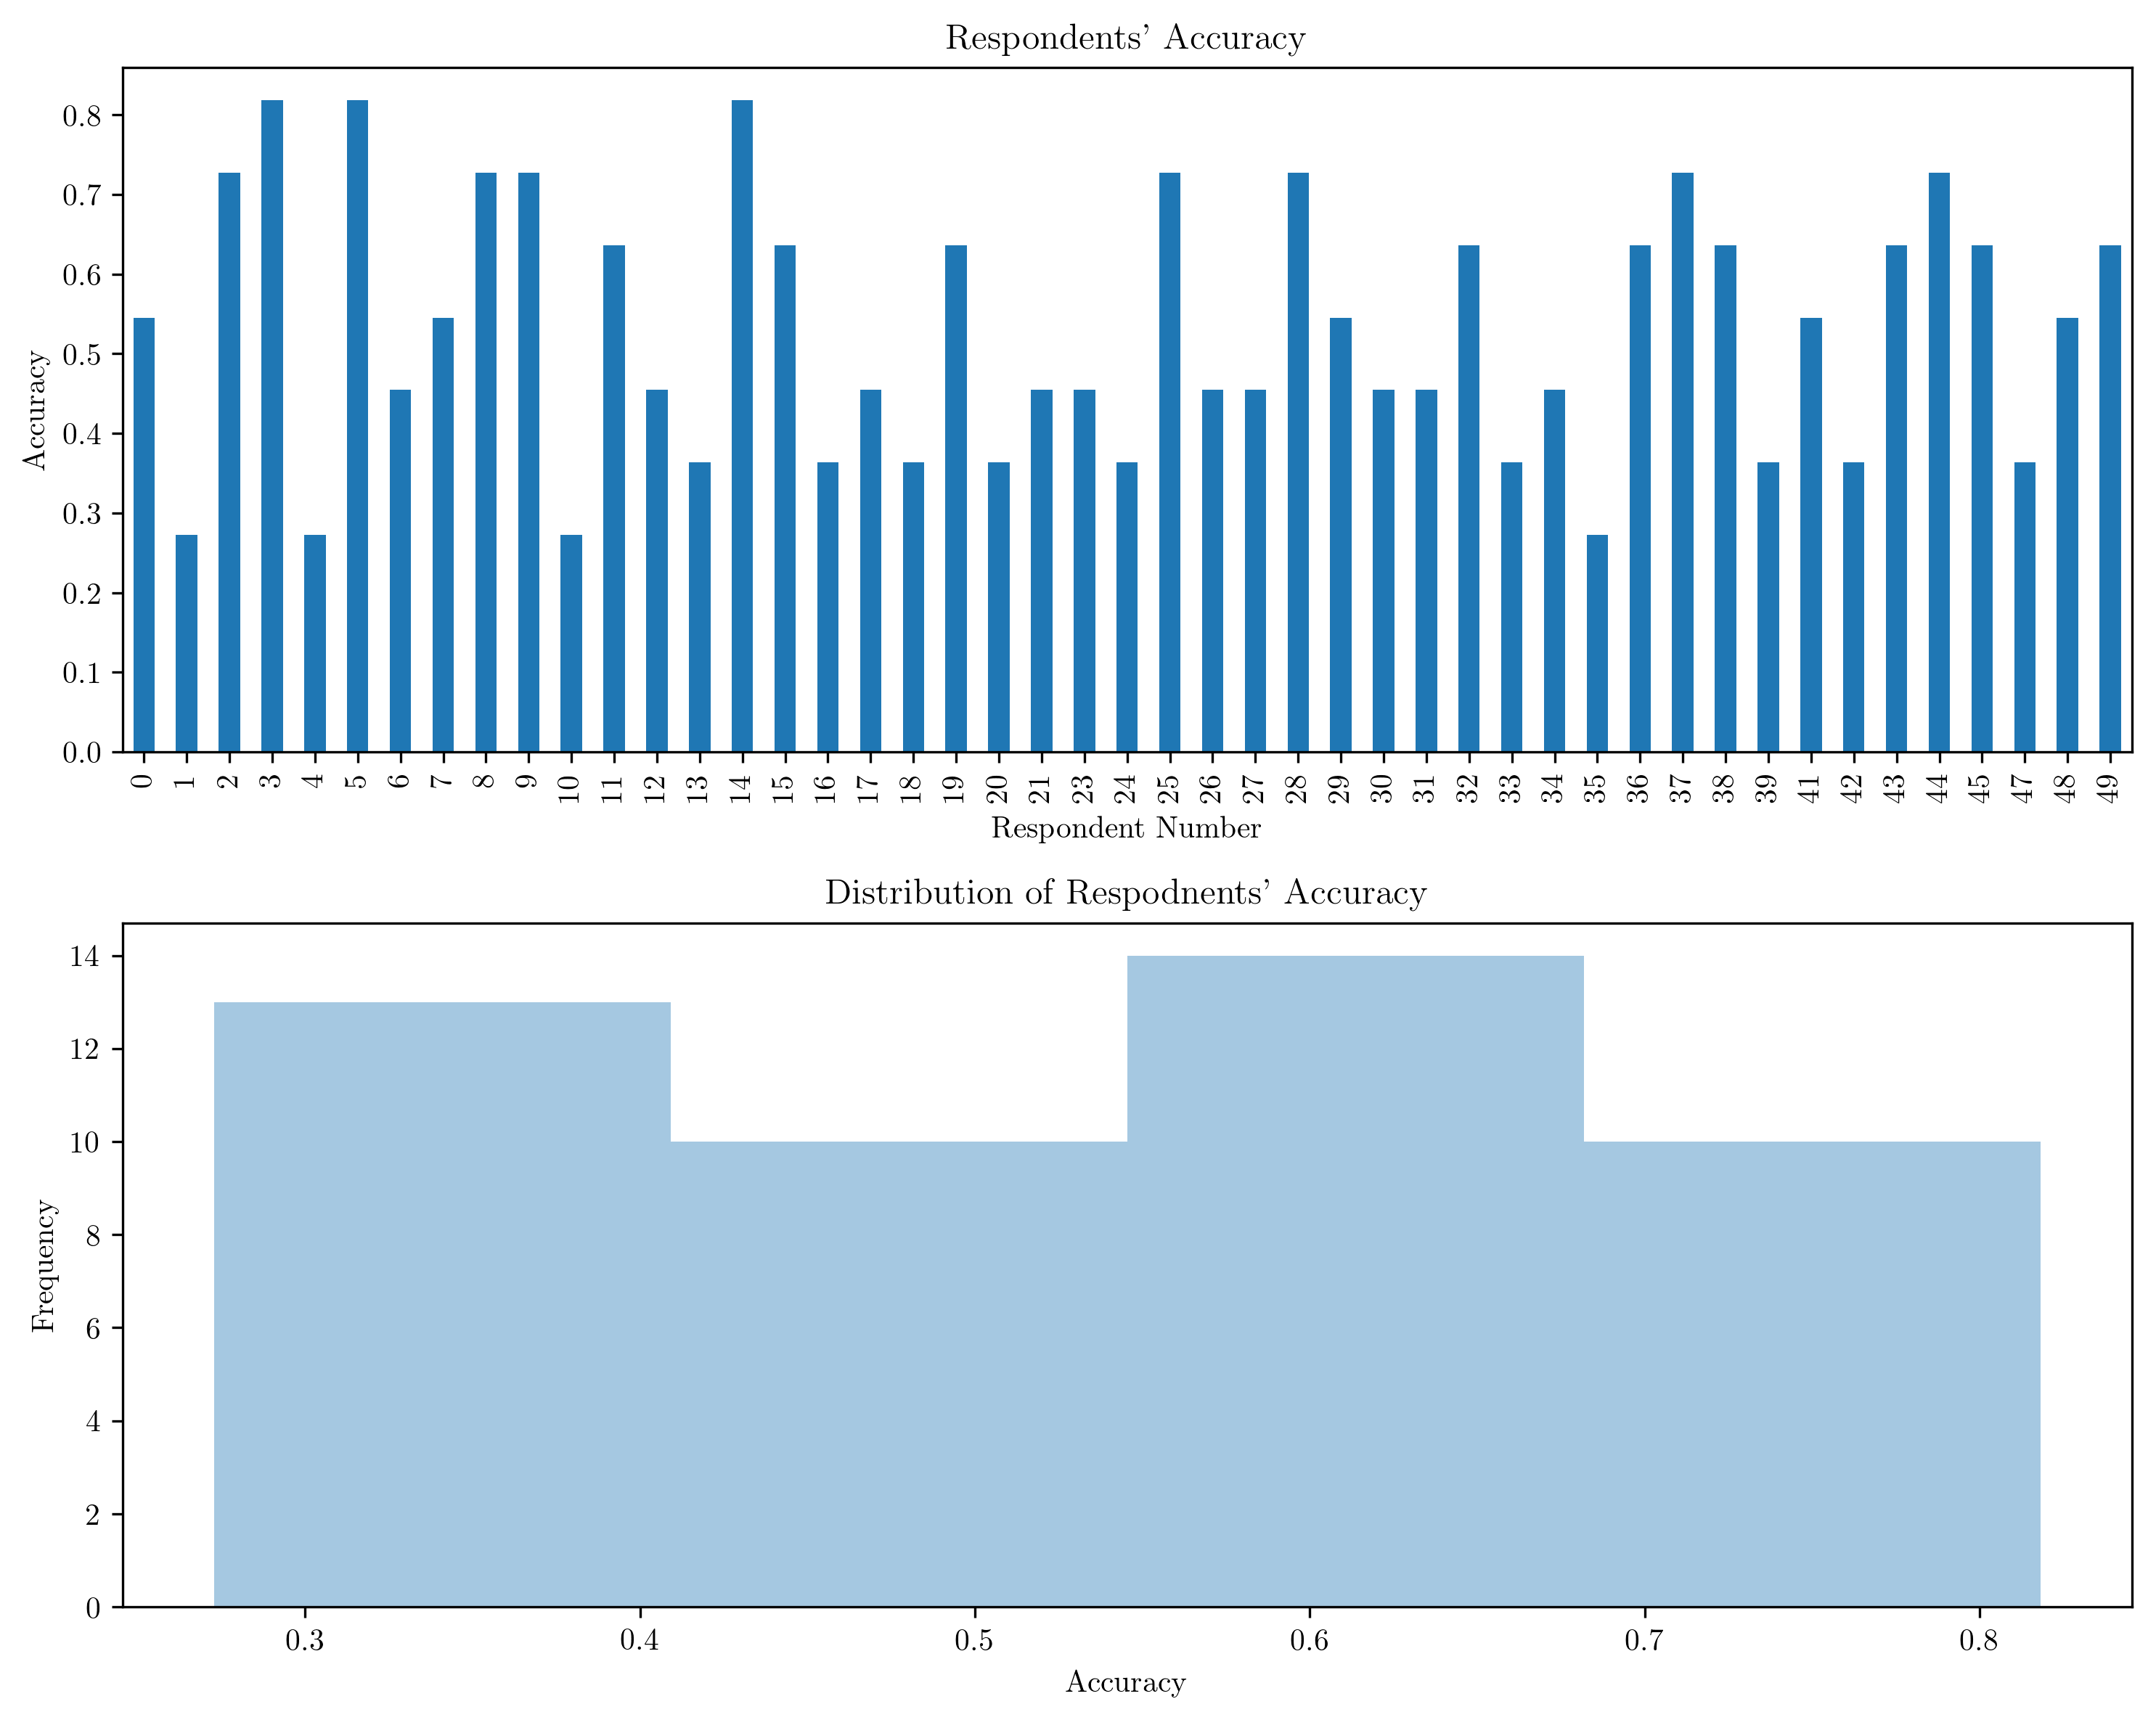

In [779]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

_, ax = plt.subplots(2,1, figsize=(10,8), dpi=300)
opinion_df['accuracy'].plot.bar(title="Respondents' Accuracy", ax=ax[0])
ax[0].set_xlabel('Respondent Number')
ax[0].set_ylabel('Accuracy')

sns.distplot(opinion_df['accuracy'].values, ax=ax[1], kde=False)
ax[1].set_title("Distribution of Respodnents' Accuracy")
ax[1].set_xlabel("Accuracy")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.savefig('exp1_accuracy.pdf', format='pdf')

In [412]:
opinion_df['accuracy'].mean()

0.5299806576402322

In [413]:
main_df = main_df.join(opinion_df['accuracy'])

# Confidence in own-response

In [577]:
conf_df = main_df.filter(like='confAnswer').drop([22, 46, 40]).astype(float)

In [592]:
conf_df.columns = ['conf_{:02d}'.format(int(mysplit(col)[1])) for col in conf_df.columns]

In [597]:
conf_df = main_df[['WorkerId']].join(conf_df.sort_index(axis=1))

In [599]:
conf_df.head()

,WorkerId,conf_00,conf_01,conf_02,conf_03,conf_04,conf_05,conf_06,conf_07,conf_08,conf_09,conf_10
0,A39GADIK8RLMVC,90.0,85.0,80.0,90.0,80.0,70.0,80.0,70.0,90.0,80.0,90.0
1,A1RSDFFZIVE5BO,50.0,65.0,50.0,50.0,50.0,90.0,50.0,90.0,50.0,50.0,50.0
2,A1H72Y9Z5NJXDS,90.0,100.0,90.0,100.0,65.0,80.0,90.0,90.0,60.0,100.0,90.0
3,A1U6A617Q95MTZ,70.0,50.0,80.0,50.0,70.0,99.0,95.0,70.0,60.0,50.0,75.0
4,A1AKX1C8GCVCTP,60.0,75.0,60.0,50.0,50.0,50.0,50.0,50.0,60.0,60.0,50.0


/Users/mohammad/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


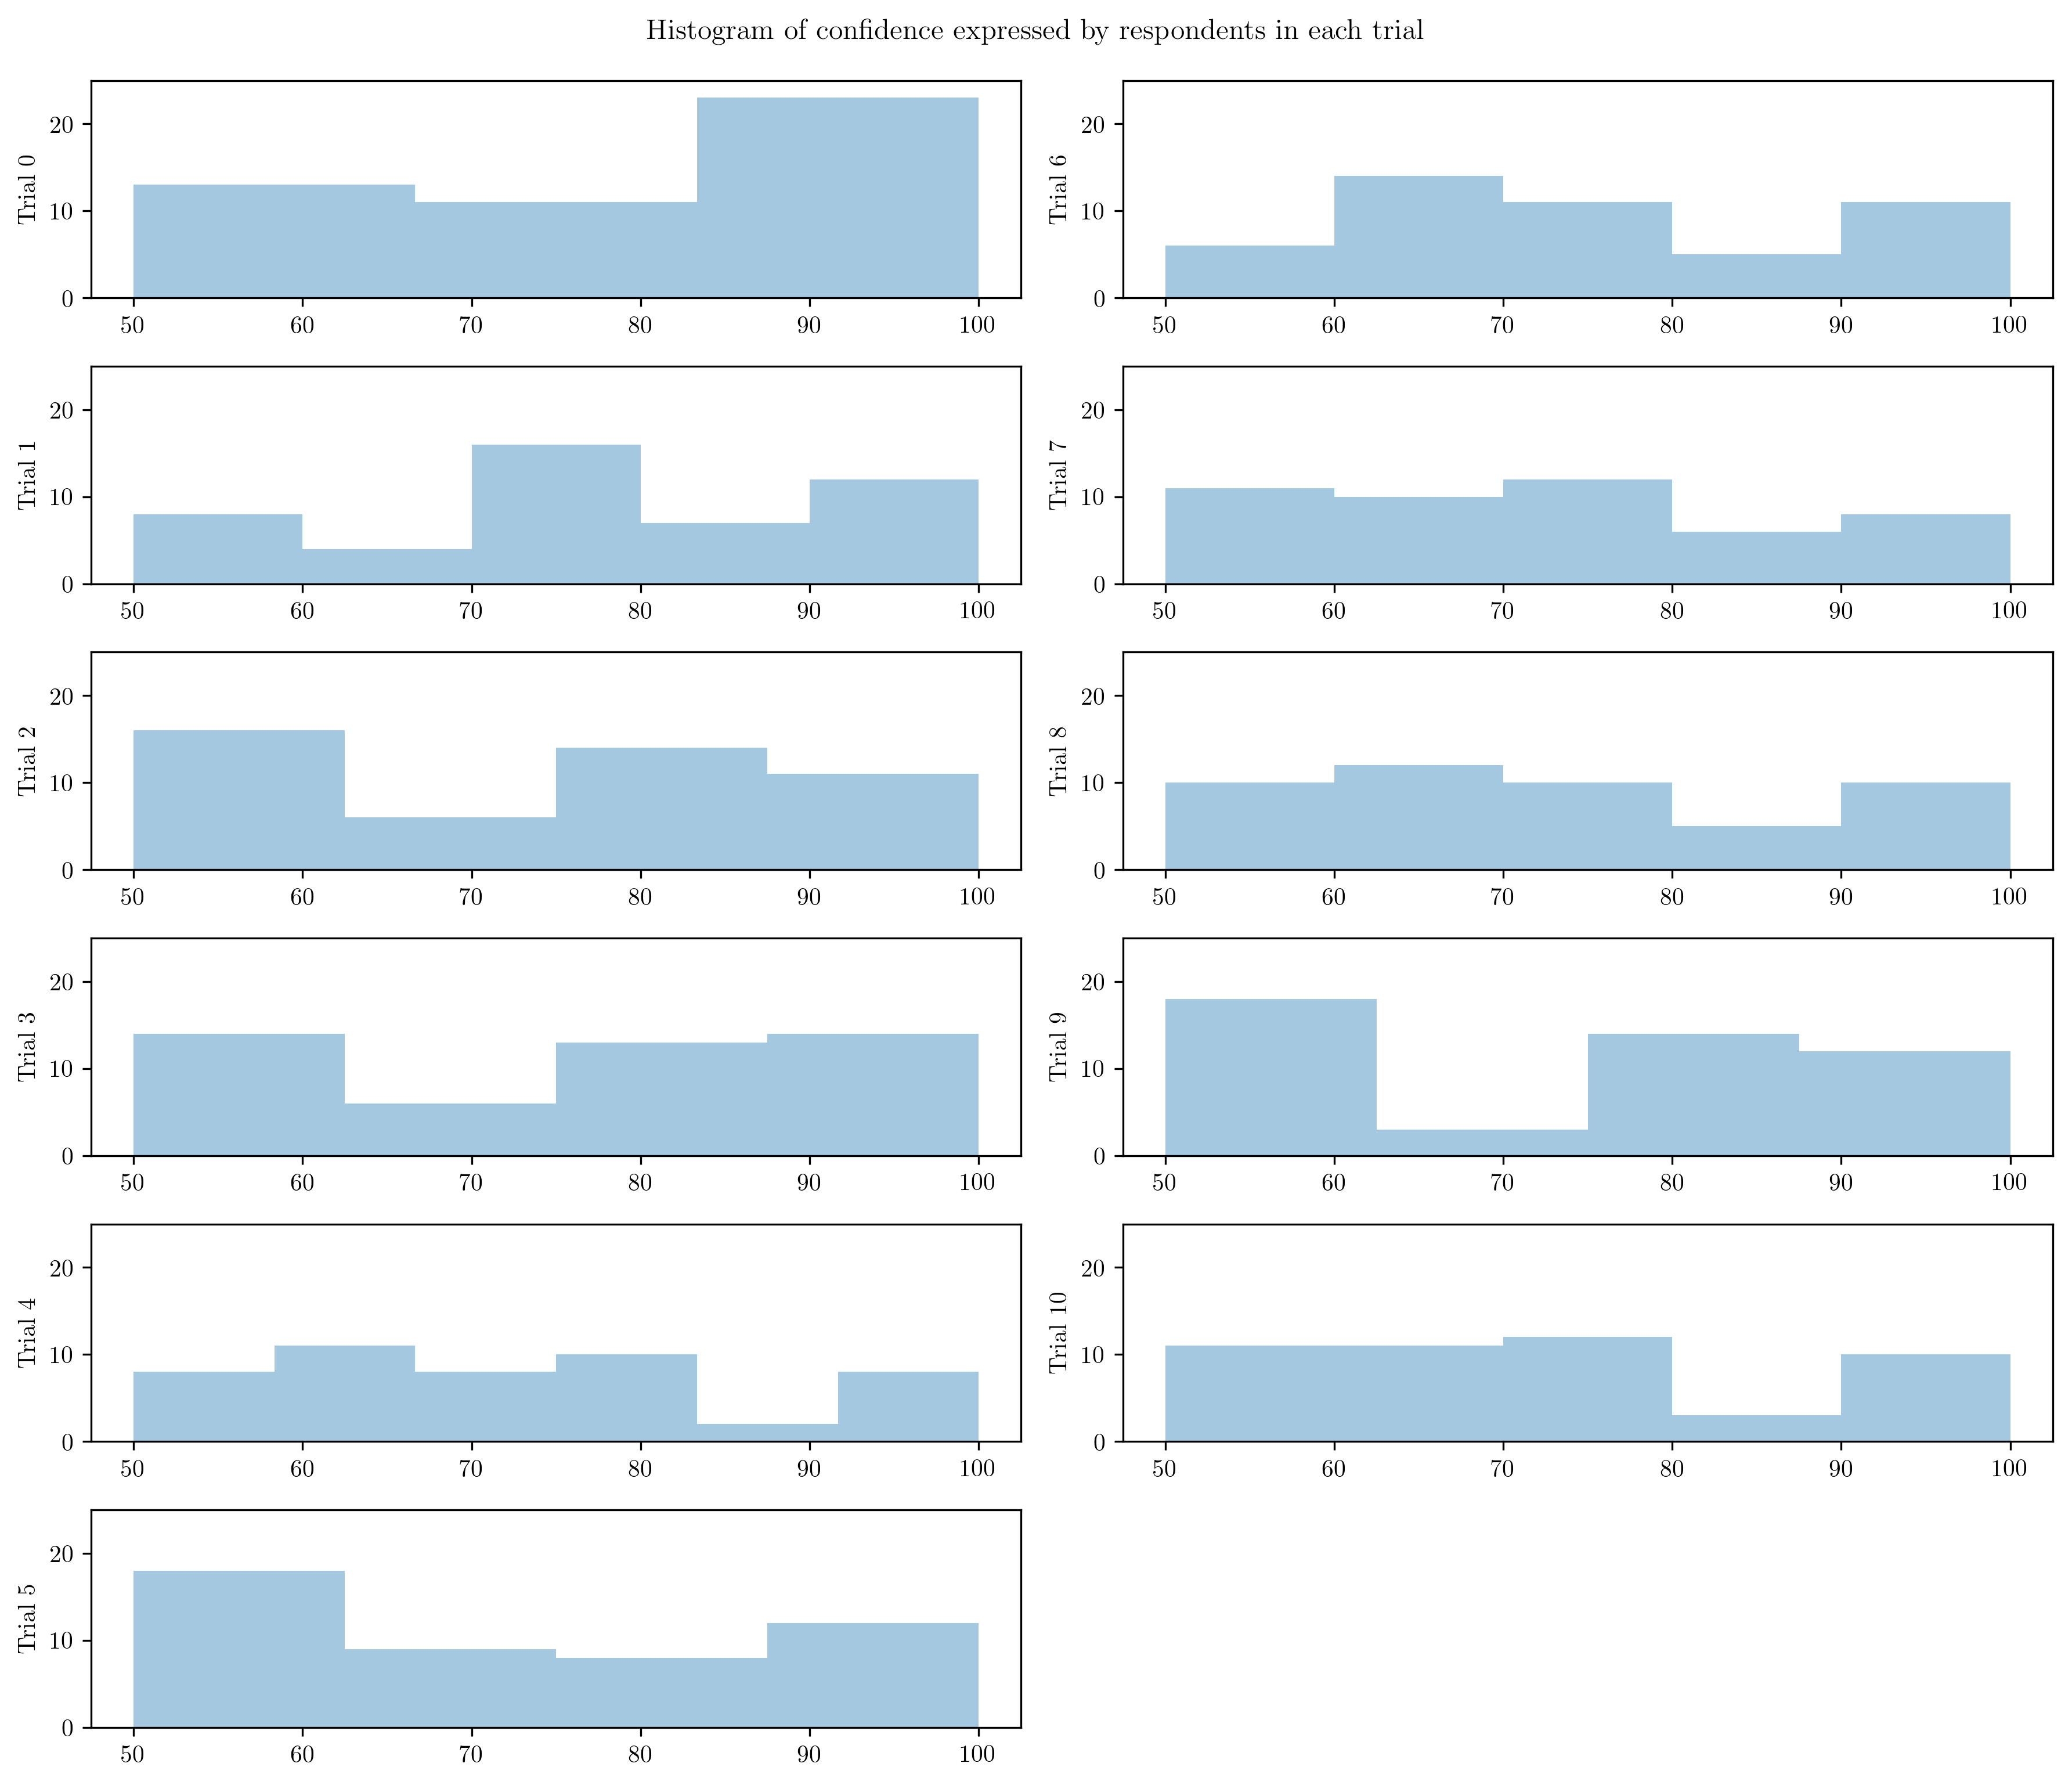

In [780]:
fig, ax = plt.subplots(6,2, figsize=(12,10), dpi=300)
ax = ax.reshape(-1, order='F')
fig.delaxes(ax[-1])

plot_df = conf_df.filter(like='conf').sort_index(axis=1)

for col_idx, col in enumerate(plot_df.columns):
    sns.distplot(plot_df[col].dropna(), kde=False, ax=ax[col_idx])
    ax[col_idx].set_ylabel('Trial '+ str(int(col[-2:])))
    ax[col_idx].set_xlabel('')
    ax[col_idx].set_ylim([0, 25])

my_suptitle = fig.suptitle("Histogram of confidence expressed by respondents in each trial", y=1.02)
plt.tight_layout()
plt.savefig('exp1_conf.pdf', format='pdf', bbox_inches='tight',bbox_extra_artists=[my_suptitle])

# Estimation of others

## Histograms

In [670]:
ax_dict = {'0_0': [0, 0], '0_1':[1, 0], '1_0':[1, 0], '1_1':[1, 1], '2_0':[0, 2], '2_1':[1, 2], '3_0':[0, 3], '3_1':[1, 3], '4_0': [0, 4], '4_1': [1, 4], 
           '5_0': [2, 0], '5_1':[3, 0], '6_0':[2, 1], '6_1':[3, 1], '7_0':[2, 2] , '7_1':[3, 2], '8_0':[2, 3], '8_1':[3, 3], '9_0': [2, 4], '9_1': [3, 4], '10_0': [2, 5] , '10_1':[3, 5]} 
           

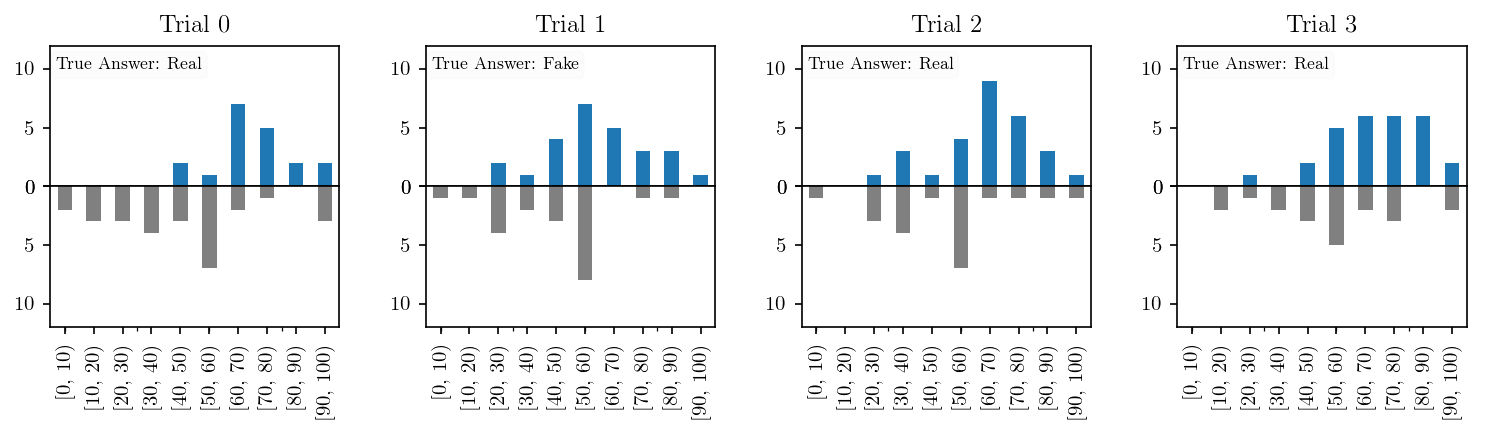

In [728]:
fig, ax = plt.subplots(2,4, figsize=(10, 3), dpi=150, sharex=True)
dataframe = main_df
props = dict(boxstyle='round', color='black', alpha=0.01)

for idx, trial_number in enumerate([str(num) for num in range(0, 4, 1)]):
    series = dataframe[lambda x: x['Answer.opinion' + trial_number] == 1]['Answer.estimAnswer' + trial_number].astype('float')
    step = 10
    bin_range = np.arange(0, 100+step, step)
    out, bins  = pd.cut(series, bins=bin_range, include_lowest=True, right=False, retbins=True)
    out.value_counts(sort=False).plot.bar(ax=ax[0, idx])

    series = dataframe[lambda x: x['Answer.opinion' + trial_number] == -1]['Answer.estimAnswer' + trial_number].astype('float')
    step = 10
    bin_range = np.arange(0, 100+step, step)
    out, bins  = pd.cut(series, bins=bin_range, include_lowest=True, right=False, retbins=True)
    out.value_counts(sort=False).plot.bar(color='grey', ax=ax[1, idx])
    
    ax[0, idx].set_ylim([0, 12])
    ax[1, idx].set_ylim([0, 12])
    ax[1, idx].invert_yaxis()
    ax[0, idx].set_title('Trial {}'.format(trial_number))
    
    textstr = "True Answer: {}".format('Real' if trial_num2truth[int(trial_number)] == 1 else 'Fake')
    ax[0, idx].text(0.02, 0.92, textstr, transform=ax[0, idx].transAxes, 
                        horizontalalignment='left',
                        verticalalignment='top', bbox=props, color='black', fontsize=8)
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0)
plt.savefig('exp1_estim_0-3.pdf', format='pdf')

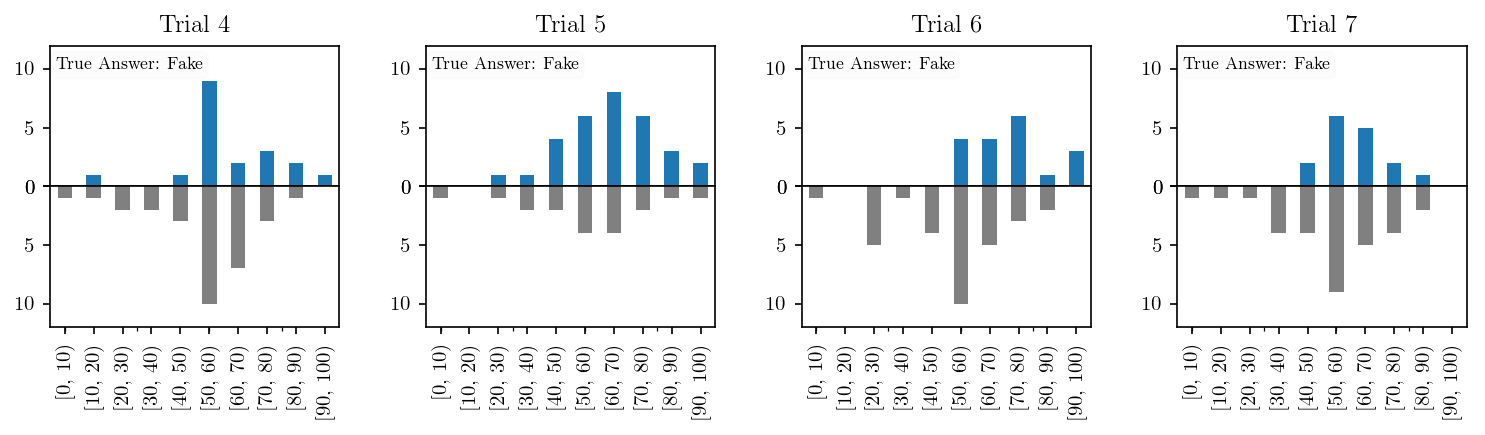

In [727]:
fig, ax = plt.subplots(2,4, figsize=(10, 3), dpi=150, sharex=True)
dataframe = main_df
props = dict(boxstyle='round', color='black', alpha=0.01)

for idx, trial_number in enumerate([str(num) for num in range(4, 8, 1)]):
    series = dataframe[lambda x: x['Answer.opinion' + trial_number] == 1]['Answer.estimAnswer' + trial_number].astype('float')
    step = 10
    bin_range = np.arange(0, 100+step, step)
    out, bins  = pd.cut(series, bins=bin_range, include_lowest=True, right=False, retbins=True)
    out.value_counts(sort=False).plot.bar(ax=ax[0, idx])

    series = dataframe[lambda x: x['Answer.opinion' + trial_number] == -1]['Answer.estimAnswer' + trial_number].astype('float')
    step = 10
    bin_range = np.arange(0, 100+step, step)
    out, bins  = pd.cut(series, bins=bin_range, include_lowest=True, right=False, retbins=True)
    out.value_counts(sort=False).plot.bar(color='grey', ax=ax[1, idx])
    
    ax[0, idx].set_ylim([0, 12])
    ax[1, idx].set_ylim([0, 12])
    ax[1, idx].invert_yaxis()
    ax[0, idx].set_title('Trial {}'.format(trial_number))
    
    textstr = "True Answer: {}".format('Real' if trial_num2truth[int(trial_number)] == 1 else 'Fake')
    ax[0, idx].text(0.02, 0.92, textstr, transform=ax[0, idx].transAxes, 
                        horizontalalignment='left',
                        verticalalignment='top', bbox=props, color='black', fontsize=8)
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0)
plt.savefig('exp1_estim_4-7.pdf', format='pdf')

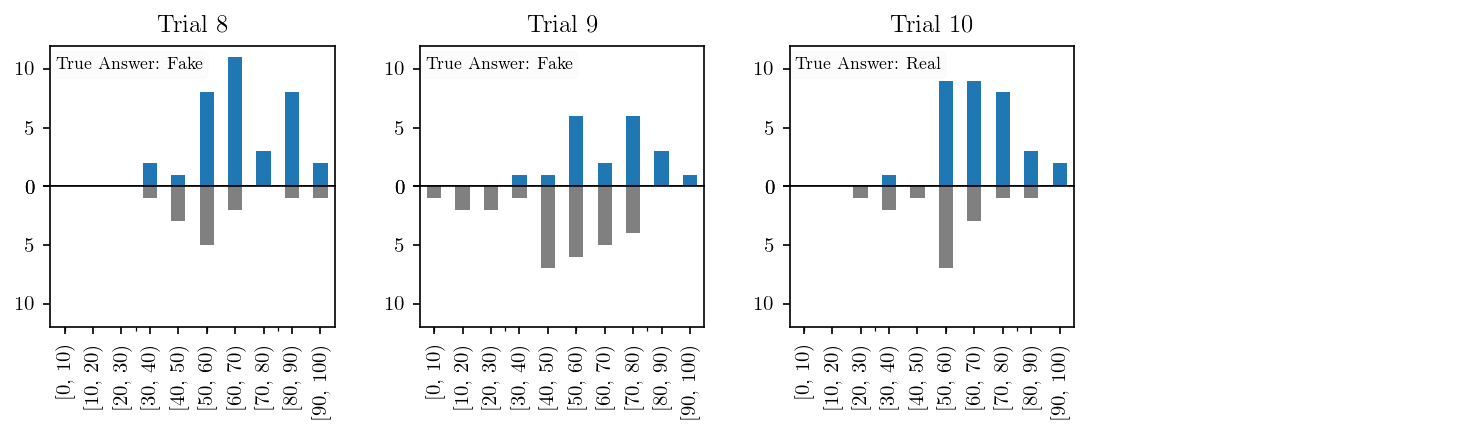

In [729]:
fig, ax = plt.subplots(2,4, figsize=(10, 3), dpi=150, sharex=True)
dataframe = main_df
props = dict(boxstyle='round', color='black', alpha=0.01)

# hide last plot pair (empty)
ax[1, 3].axis('off')
ax[0, 3].axis('off')

for idx, trial_number in enumerate([str(num) for num in range(8, 11, 1)]):
    series = dataframe[lambda x: x['Answer.opinion' + trial_number] == 1]['Answer.estimAnswer' + trial_number].astype('float')
    step = 10
    bin_range = np.arange(0, 100+step, step)
    out, bins  = pd.cut(series, bins=bin_range, include_lowest=True, right=False, retbins=True)
    out.value_counts(sort=False).plot.bar(ax=ax[0, idx])

    series = dataframe[lambda x: x['Answer.opinion' + trial_number] == -1]['Answer.estimAnswer' + trial_number].astype('float')
    step = 10
    bin_range = np.arange(0, 100+step, step)
    out, bins  = pd.cut(series, bins=bin_range, include_lowest=True, right=False, retbins=True)
    out.value_counts(sort=False).plot.bar(color='grey', ax=ax[1, idx])
    
    ax[0, idx].set_ylim([0, 12])
    ax[1, idx].set_ylim([0, 12])
    ax[1, idx].invert_yaxis()
    ax[0, idx].set_title('Trial {}'.format(trial_number))
    
    textstr = "True Answer: {}".format('Real' if trial_num2truth[int(trial_number)] == 1 else 'Fake')
    ax[0, idx].text(0.02, 0.92, textstr, transform=ax[0, idx].transAxes, 
                        horizontalalignment='left',
                        verticalalignment='top', bbox=props, color='black', fontsize=8)
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0)
plt.savefig('exp1_estim_8-10.pdf', format='pdf')

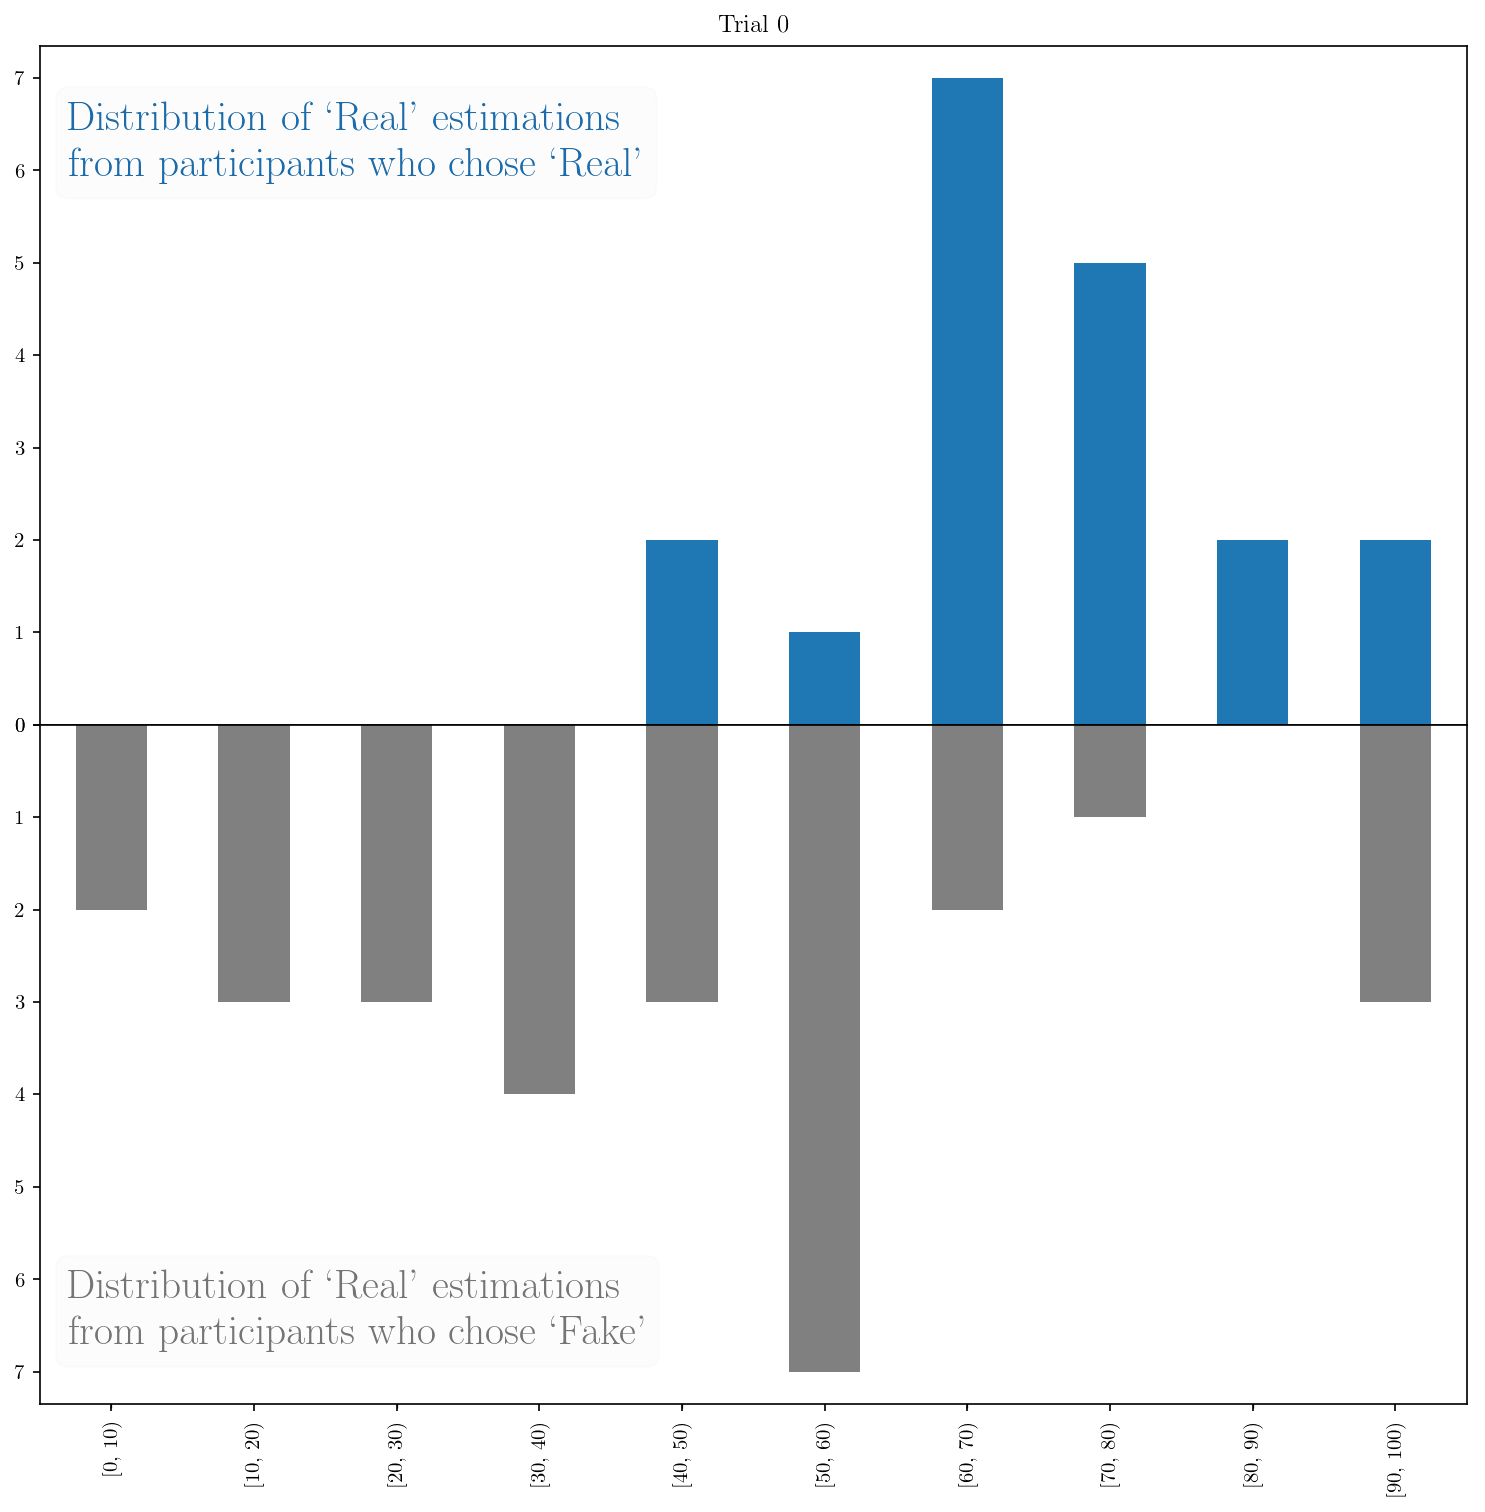

In [719]:
fig, ax = plt.subplots(2,1, figsize=(10, 10), dpi=150, sharex=True)
dataframe = main_df
trial_number = '0'
props = dict(boxstyle='round', color='black', alpha=0.01)


series = dataframe[lambda x: x['Answer.opinion' + trial_number] == 1]['Answer.estimAnswer' + trial_number].astype('float')
step = 10
bin_range = np.arange(0, 100+step, step)
out, bins  = pd.cut(series, bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(ax=ax[0])

series = dataframe[lambda x: x['Answer.opinion' + trial_number] == -1]['Answer.estimAnswer' + trial_number].astype('float')
step = 10
bin_range = np.arange(0, 100+step, step)
out, bins  = pd.cut(series, bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(color='grey', ax=ax[1])

plt.tight_layout()
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0, hspace=0)

ax[0].set_title('Trial {}'.format(trial_number))
textstr_top = "Distribution of `Real' estimations \n from participants who chose `Real'"
ax[0].text(0.02, 0.92, textstr_top, transform=ax[0].transAxes, 
                    horizontalalignment='left',
                    verticalalignment='top', bbox=props, color='#1C6CAB', fontsize=20)

textstr_top = "Distribution of `Real' estimations \n from participants who chose `Fake'"
ax[1].text(0.02, -0.80, textstr_top, transform=ax[0].transAxes, 
                    horizontalalignment='left',
                    verticalalignment='top', bbox=props, color='#757575', fontsize=20)
plt.savefig('exp1_estim_trial0.pdf', format='pdf')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d7d05f8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1a76cba8>], dtype=object)

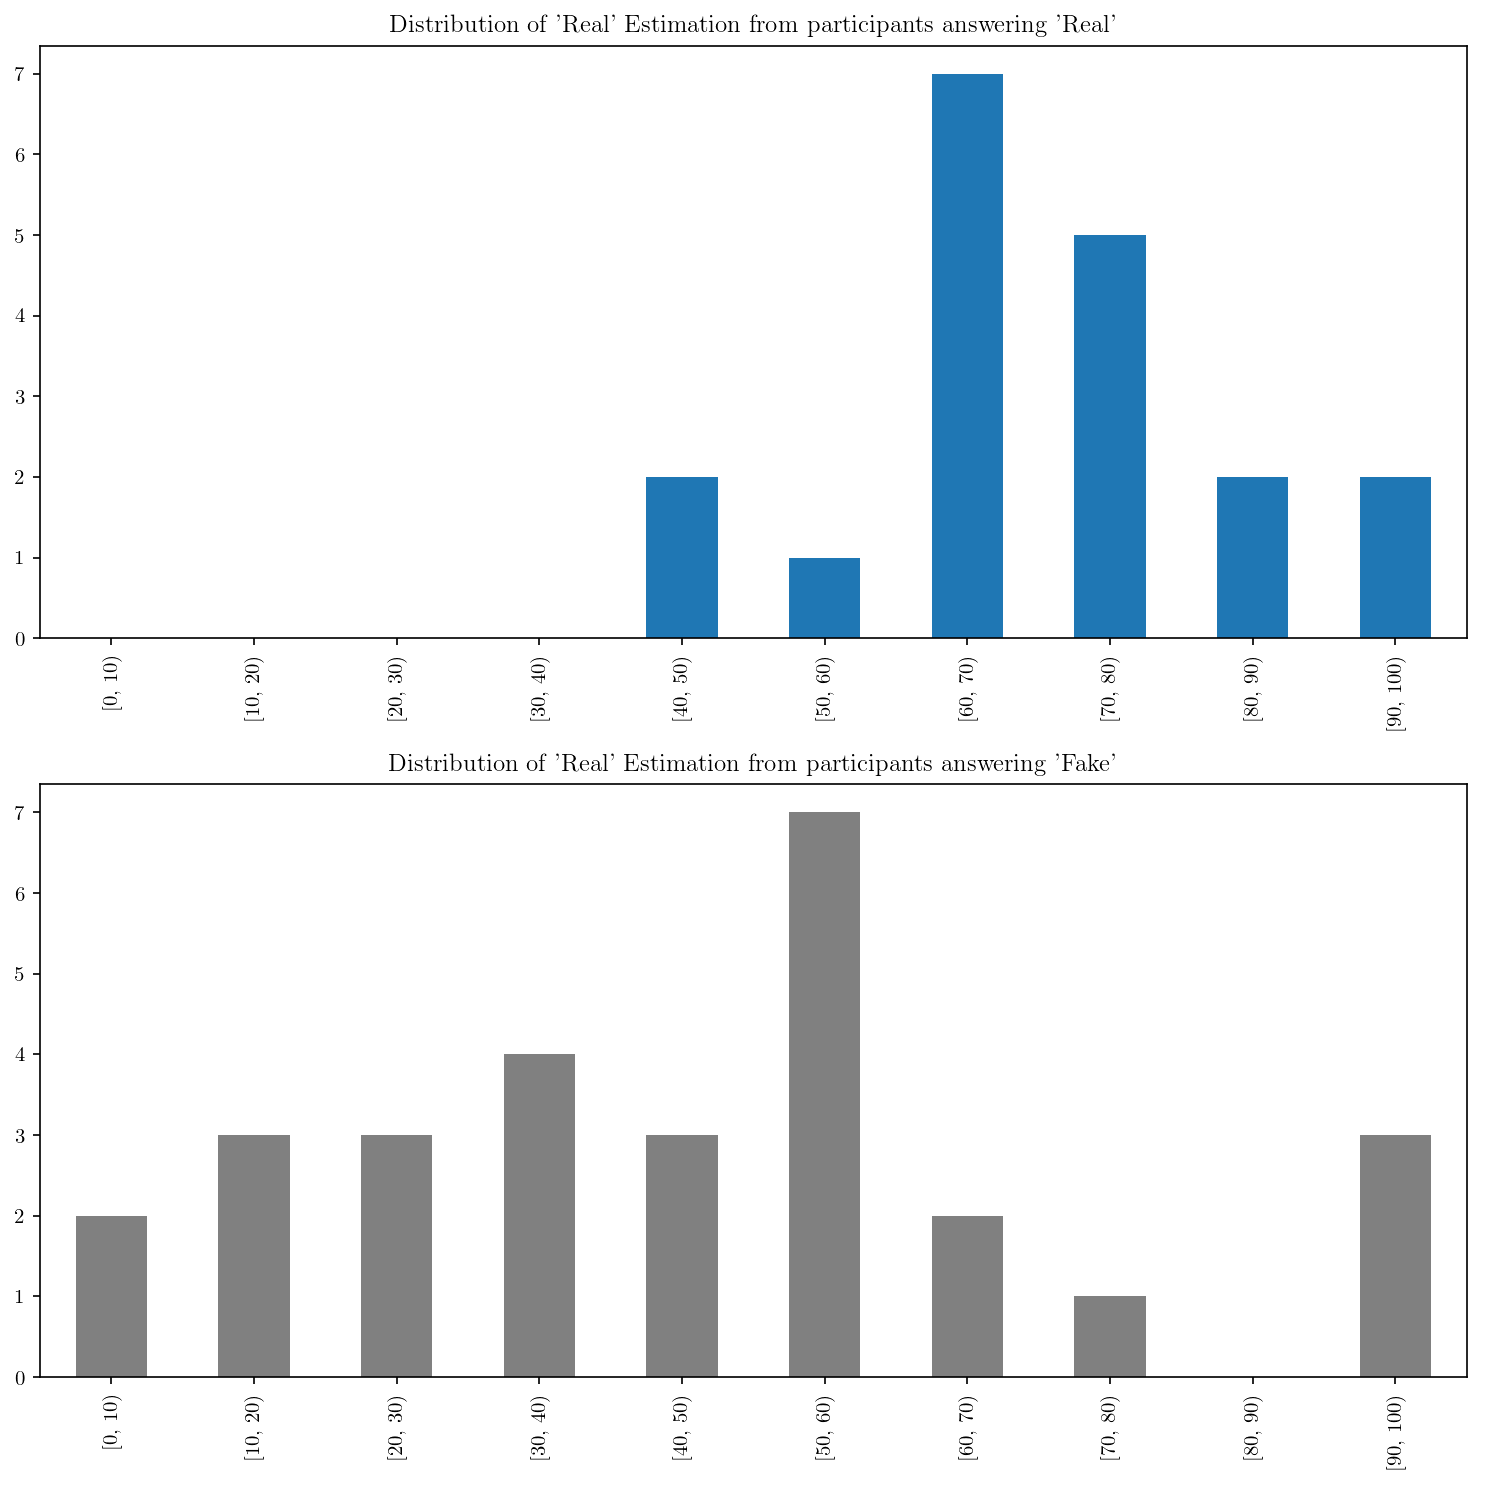

In [499]:
plot_estimation_histograms('0')

In [577]:
conf_df = main_df.filter(like='confAnswer').drop([22, 46, 40]).astype(float)

In [592]:
conf_df.columns = ['conf_{:02d}'.format(int(mysplit(col)[1])) for col in conf_df.columns]

In [597]:
conf_df = main_df[['WorkerId']].join(conf_df.sort_index(axis=1))

In [599]:
conf_df.head()

,WorkerId,conf_00,conf_01,conf_02,conf_03,conf_04,conf_05,conf_06,conf_07,conf_08,conf_09,conf_10
0,A39GADIK8RLMVC,90.0,85.0,80.0,90.0,80.0,70.0,80.0,70.0,90.0,80.0,90.0
1,A1RSDFFZIVE5BO,50.0,65.0,50.0,50.0,50.0,90.0,50.0,90.0,50.0,50.0,50.0
2,A1H72Y9Z5NJXDS,90.0,100.0,90.0,100.0,65.0,80.0,90.0,90.0,60.0,100.0,90.0
3,A1U6A617Q95MTZ,70.0,50.0,80.0,50.0,70.0,99.0,95.0,70.0,60.0,50.0,75.0
4,A1AKX1C8GCVCTP,60.0,75.0,60.0,50.0,50.0,50.0,50.0,50.0,60.0,60.0,50.0


/Users/mohammad/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


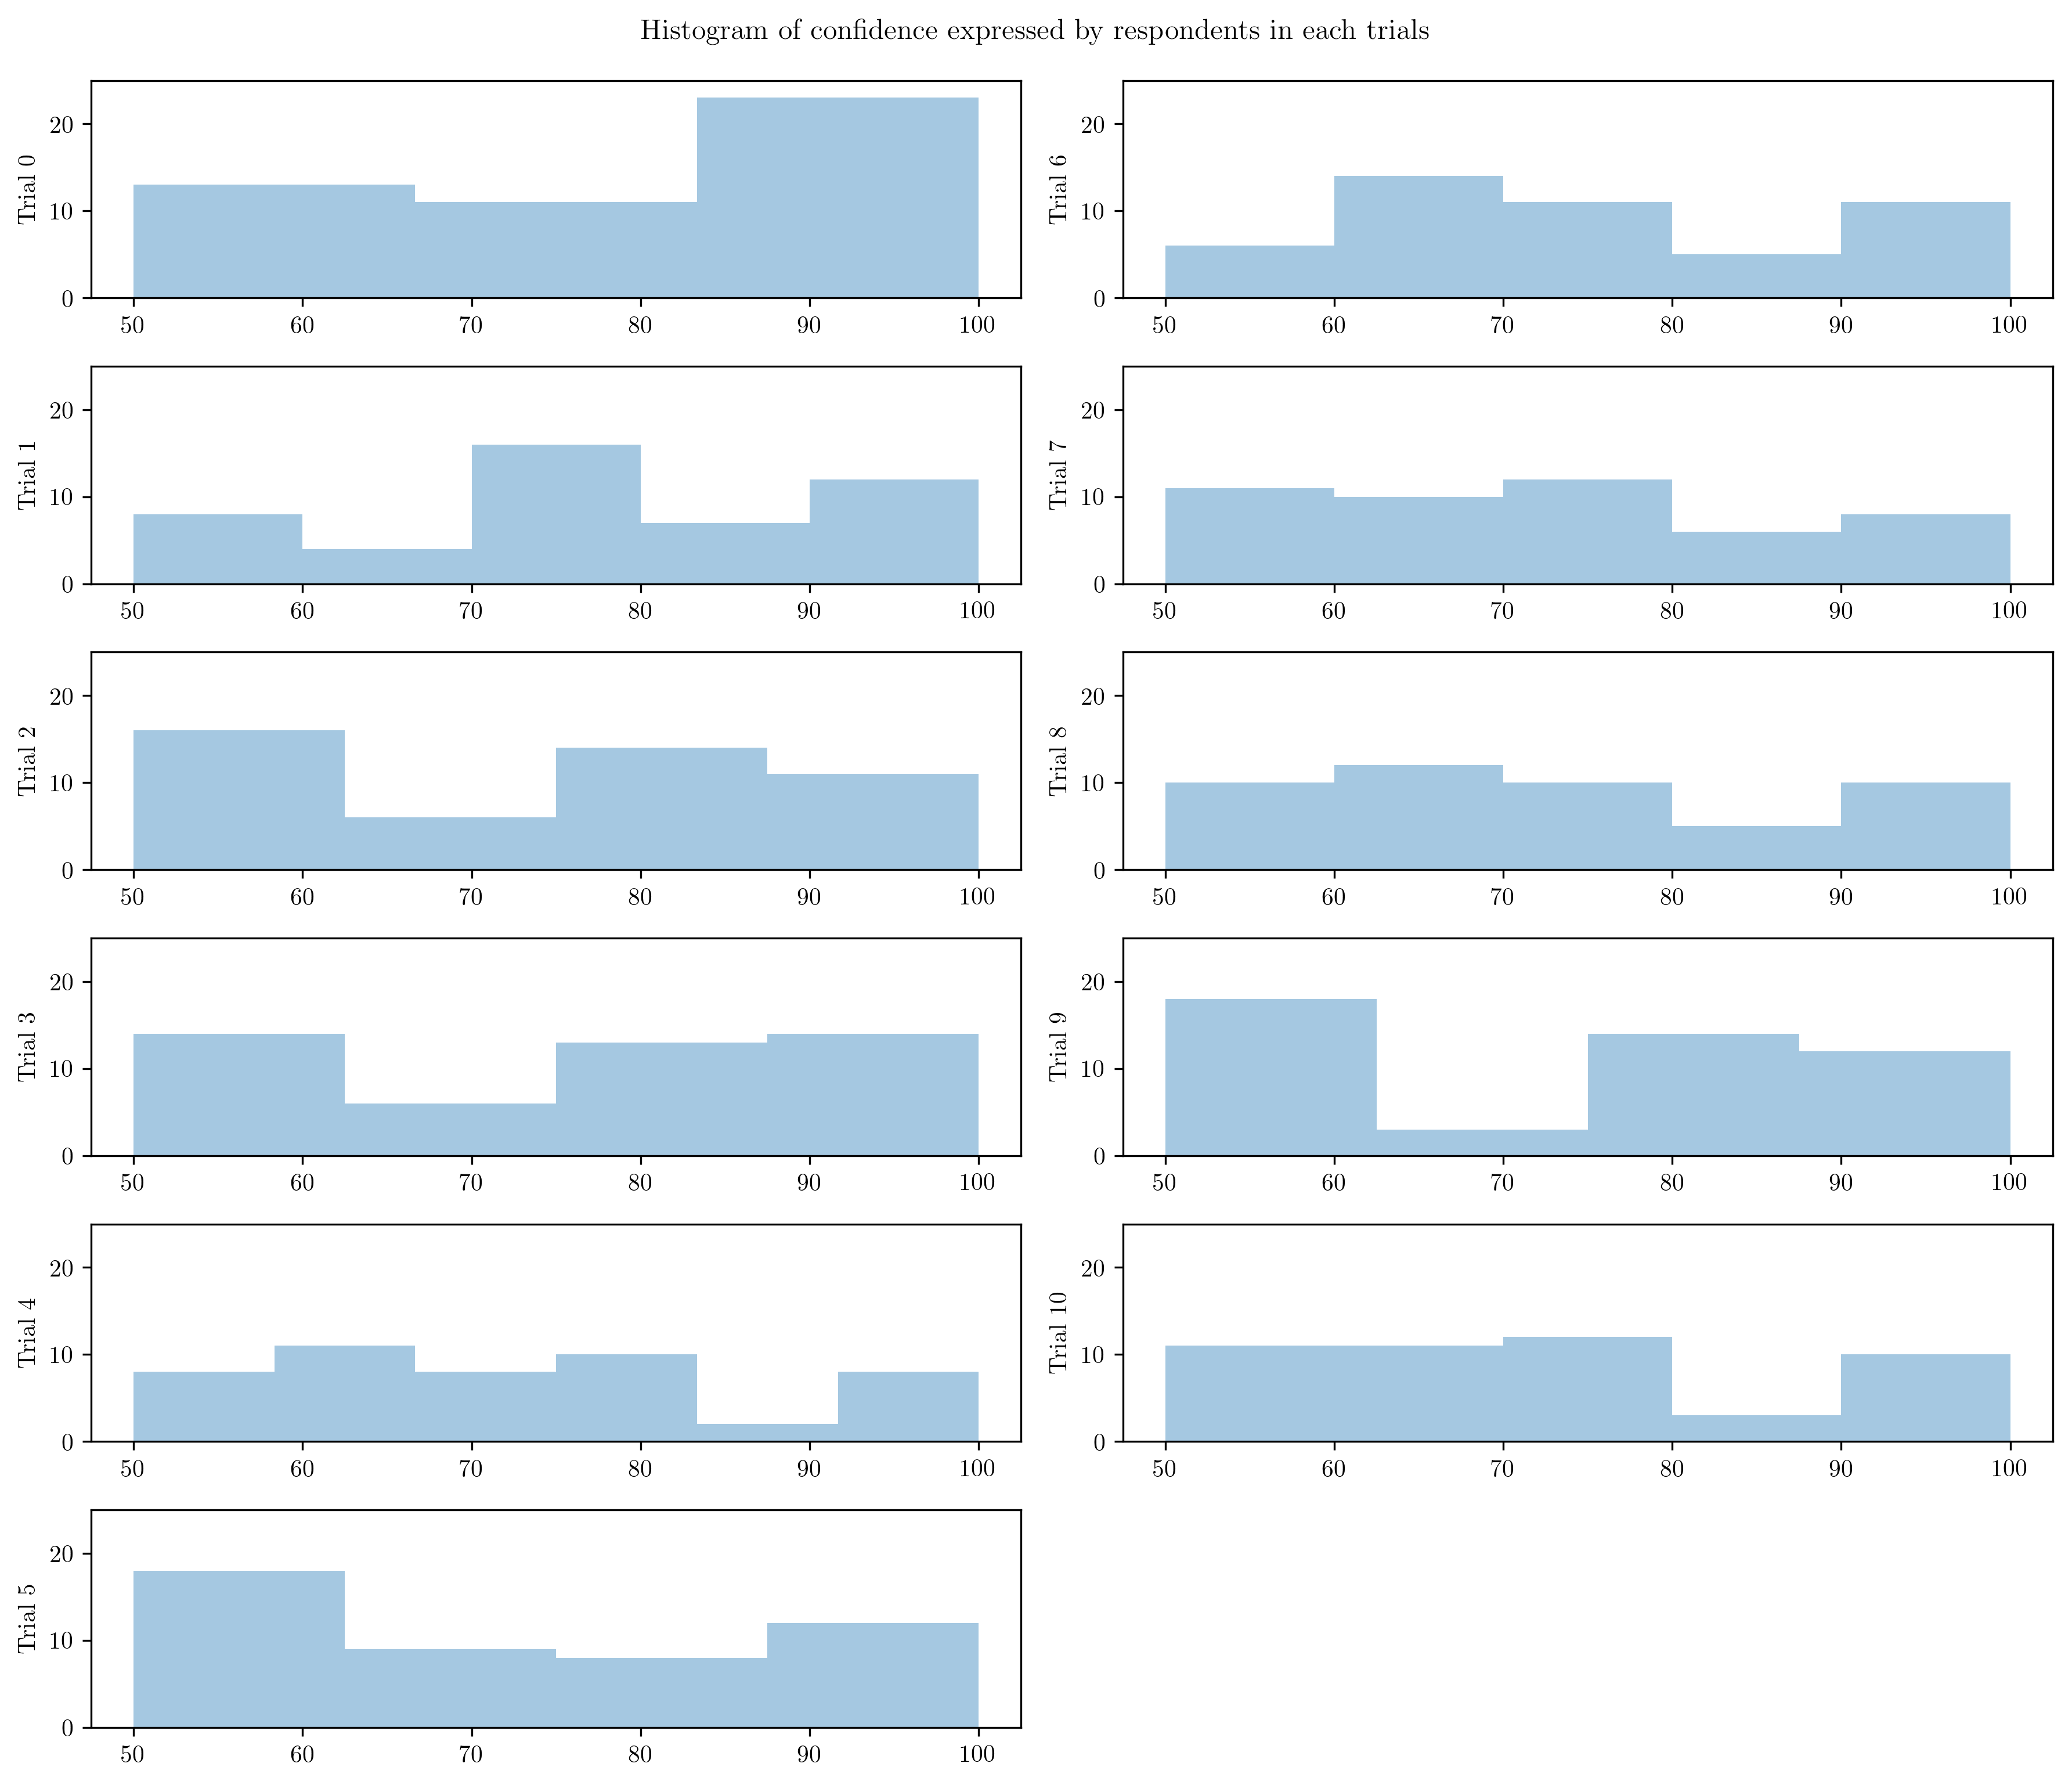

In [606]:
fig, ax = plt.subplots(6,2, figsize=(12,10), dpi=300)
ax = ax.reshape(-1, order='F')
fig.delaxes(ax[-1])

plot_df = conf_df.filter(like='conf').sort_index(axis=1)

for col_idx, col in enumerate(plot_df.columns):
    sns.distplot(plot_df[col].dropna(), kde=False, ax=ax[col_idx])
    ax[col_idx].set_ylabel('Trial '+ str(int(col[-2:])))
    ax[col_idx].set_xlabel('')
    ax[col_idx].set_ylim([0, 25])

fig.suptitle("Histogram of confidence expressed by respondents in each trials", y=1.02)
plt.tight_layout()

# Opinion biases

In [662]:
opinion_df.filter(like='Q').iloc[18]

Q00    1.0
Q01    1.0
Q02    1.0
Q03    1.0
Q04    1.0
Q05    1.0
Q06    1.0
Q07    1.0
Q08    1.0
Q09    1.0
Q10    1.0
Name: 18, dtype: float64

In [663]:
def count_response(row, response):
    try:
        return row.value_counts()[response]
    except KeyError:
        return 0

In [664]:
opinion_df['number_of_Real'] = opinion_df.filter(like='Q').apply(count_response, axis=1, response=1.0)

In [665]:
opinion_df['number_of_Fake'] = opinion_df.filter(like='Q').apply(count_response, axis=1, response=-1.0)

Text(0,0.5,'Number of responses')

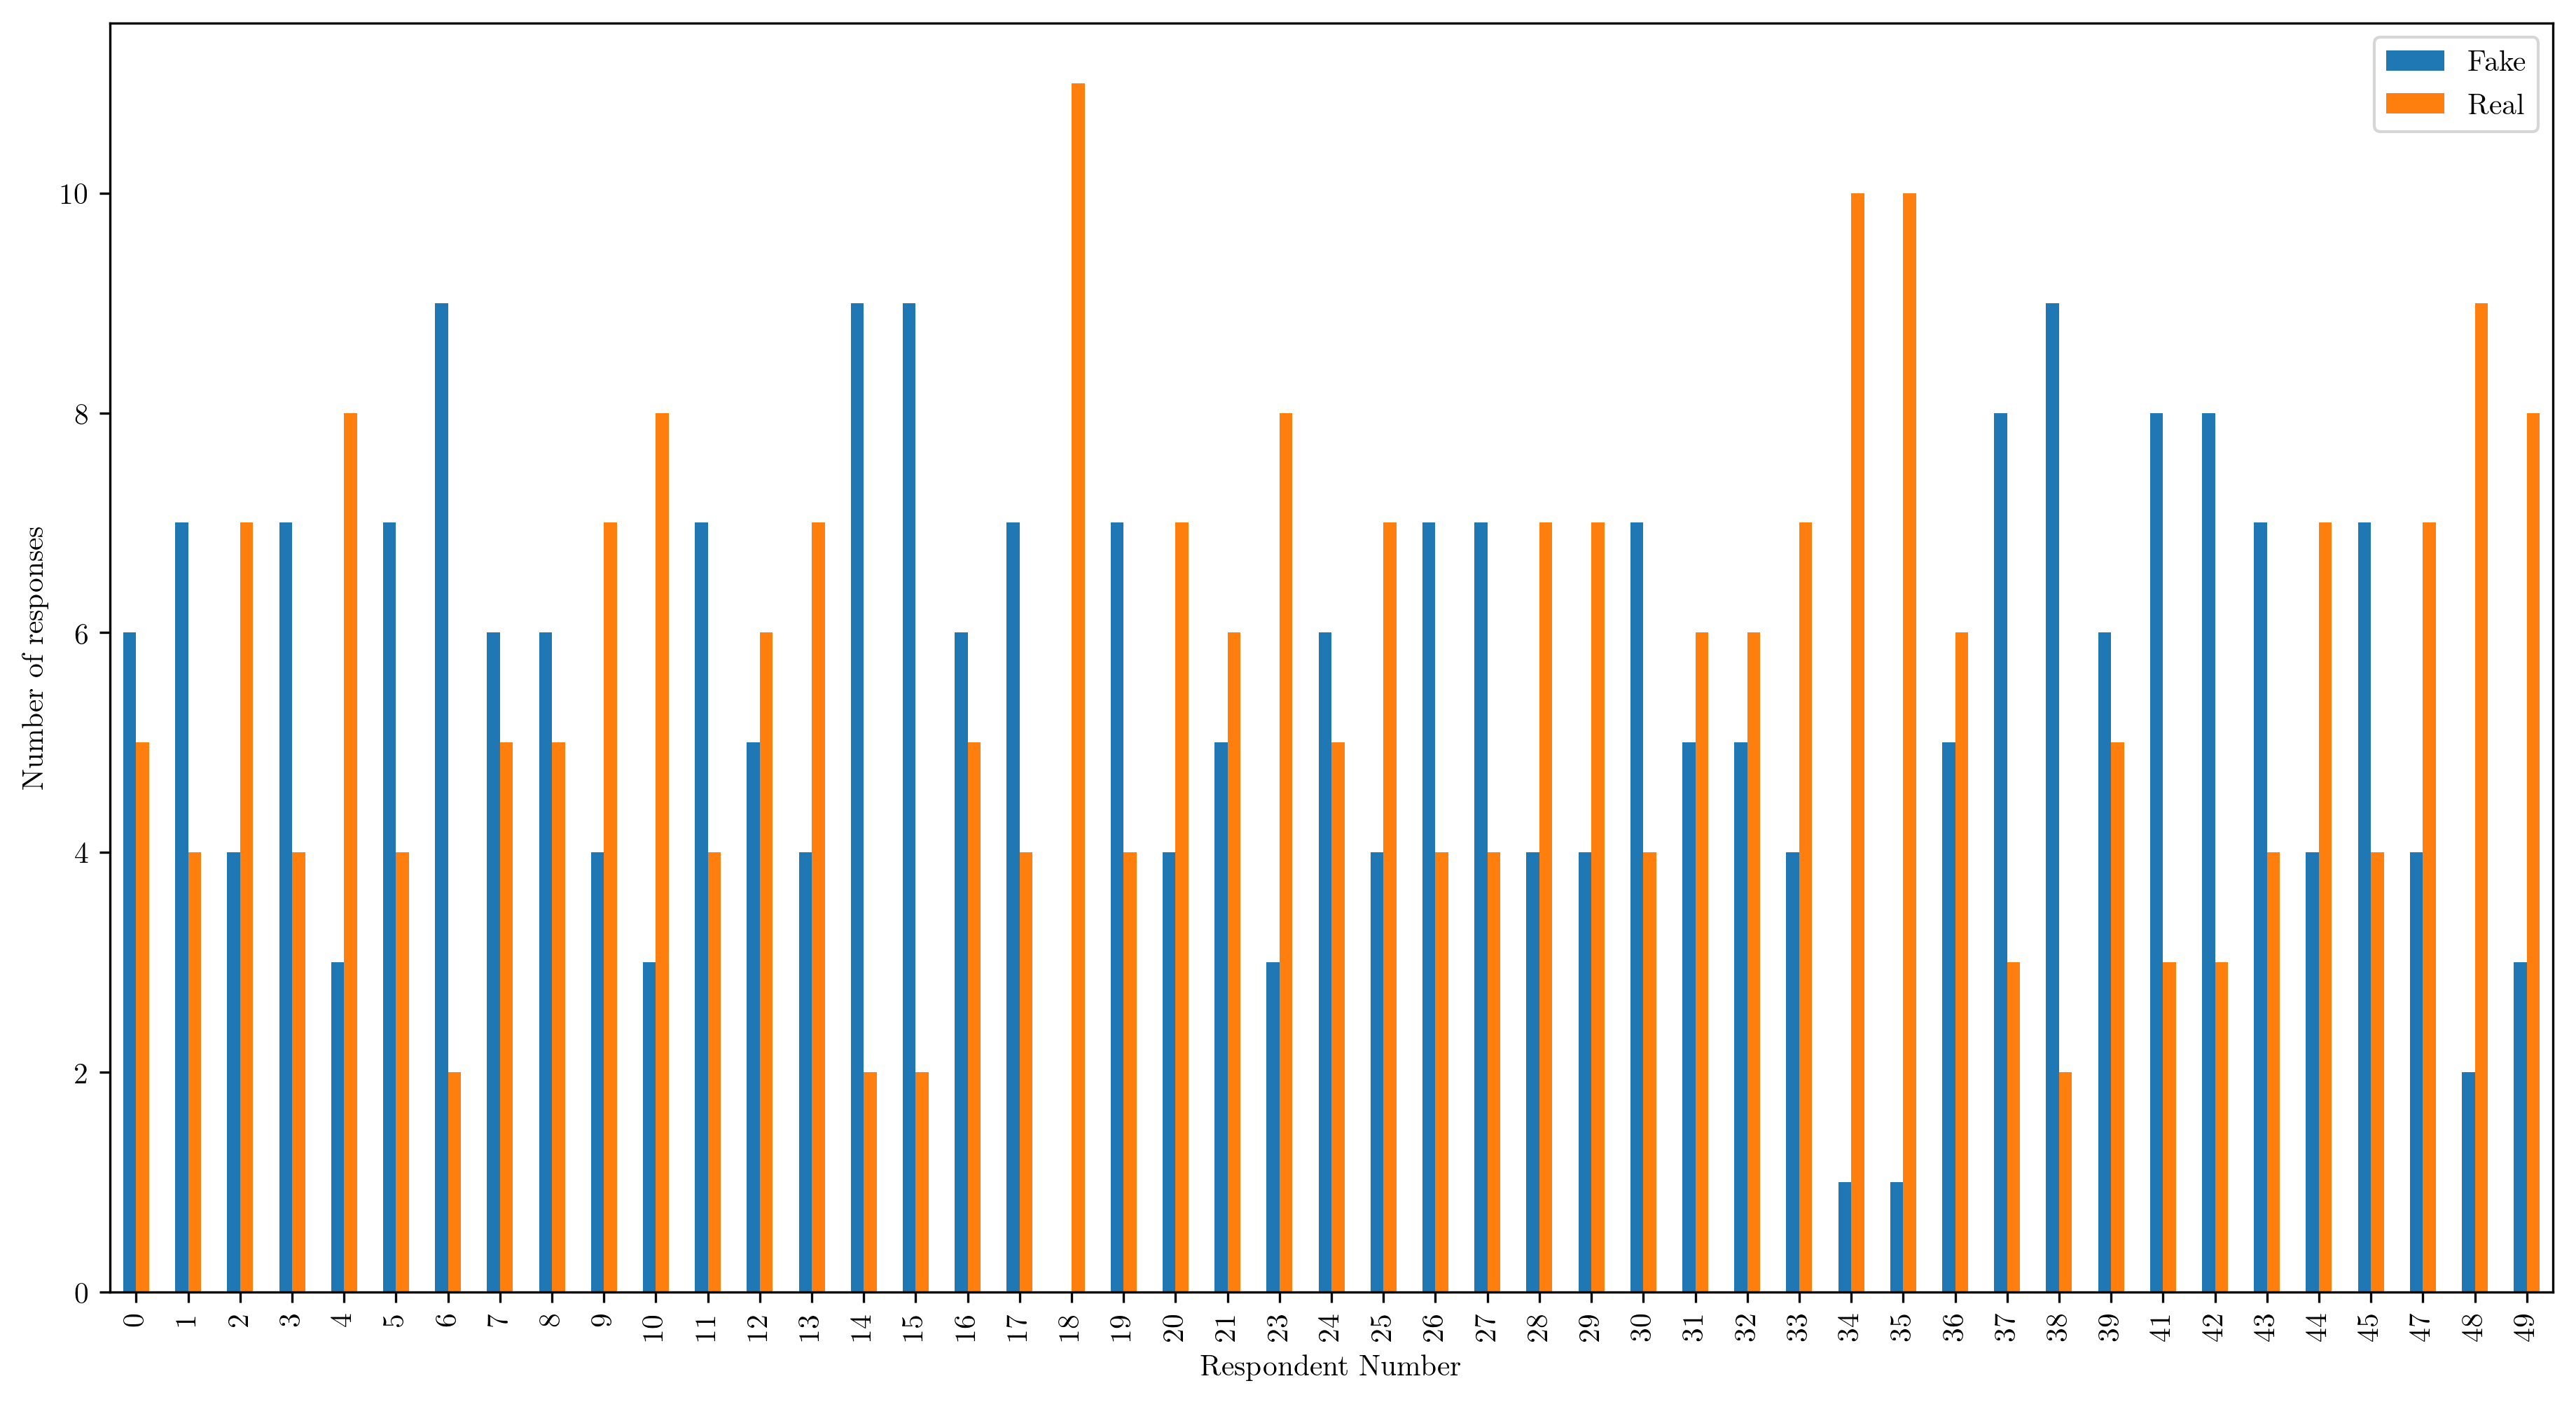

In [683]:
plt.rc('text', usetex=True)
_, ax = plt.subplots(1,1, figsize=(15,8), dpi=300)
opinion_df[['number_of_Fake', 'number_of_Real']].plot.bar(ax=ax, legend=None)
ax.set_title('')
ax.legend(['Fake', 'Real'])
ax.set_xlabel('Respondent Number')
ax.set_ylabel('Number of responses')

plt.tight_layout()
plt.savefig('exp1_opinion_bias.pdf', format='pdf')


# Reaction (Answering) times

In [38]:
reaction_time_df = main_df.filter(like='reactionTime', axis=1)

In [39]:
reaction_time_df.columns = [
    'rt_Q00', 'rt_Q01', 
    'rt_Q10', 'rt_Q02',
    'rt_Q03', 'rt_Q04',
    'rt_Q05', 'rt_Q06',
    'rt_Q07', 'rt_Q08',
    'rt_Q09'
    ]

In [40]:
reaction_time_df = reaction_time_df.sort_index(axis=1)
# Removing the incomplete samples
reaction_time_df = reaction_time_df.drop([22, 40, 46], axis=0)
reaction_time_df = reaction_time_df.astype('int')

In [44]:
reaction_time_df = reaction_time_df.applymap(lambda x: x/1000)

In [121]:
with open('orig_index2reading_time.pkl', 'rb') as f:
    orig_index2reading_time = pkl.load(f)

In [124]:
trial_num2reading_time = {trial_num: orig_index2reading_time[orig_index] for trial_num, orig_index in trial_num2orig_index.items()}

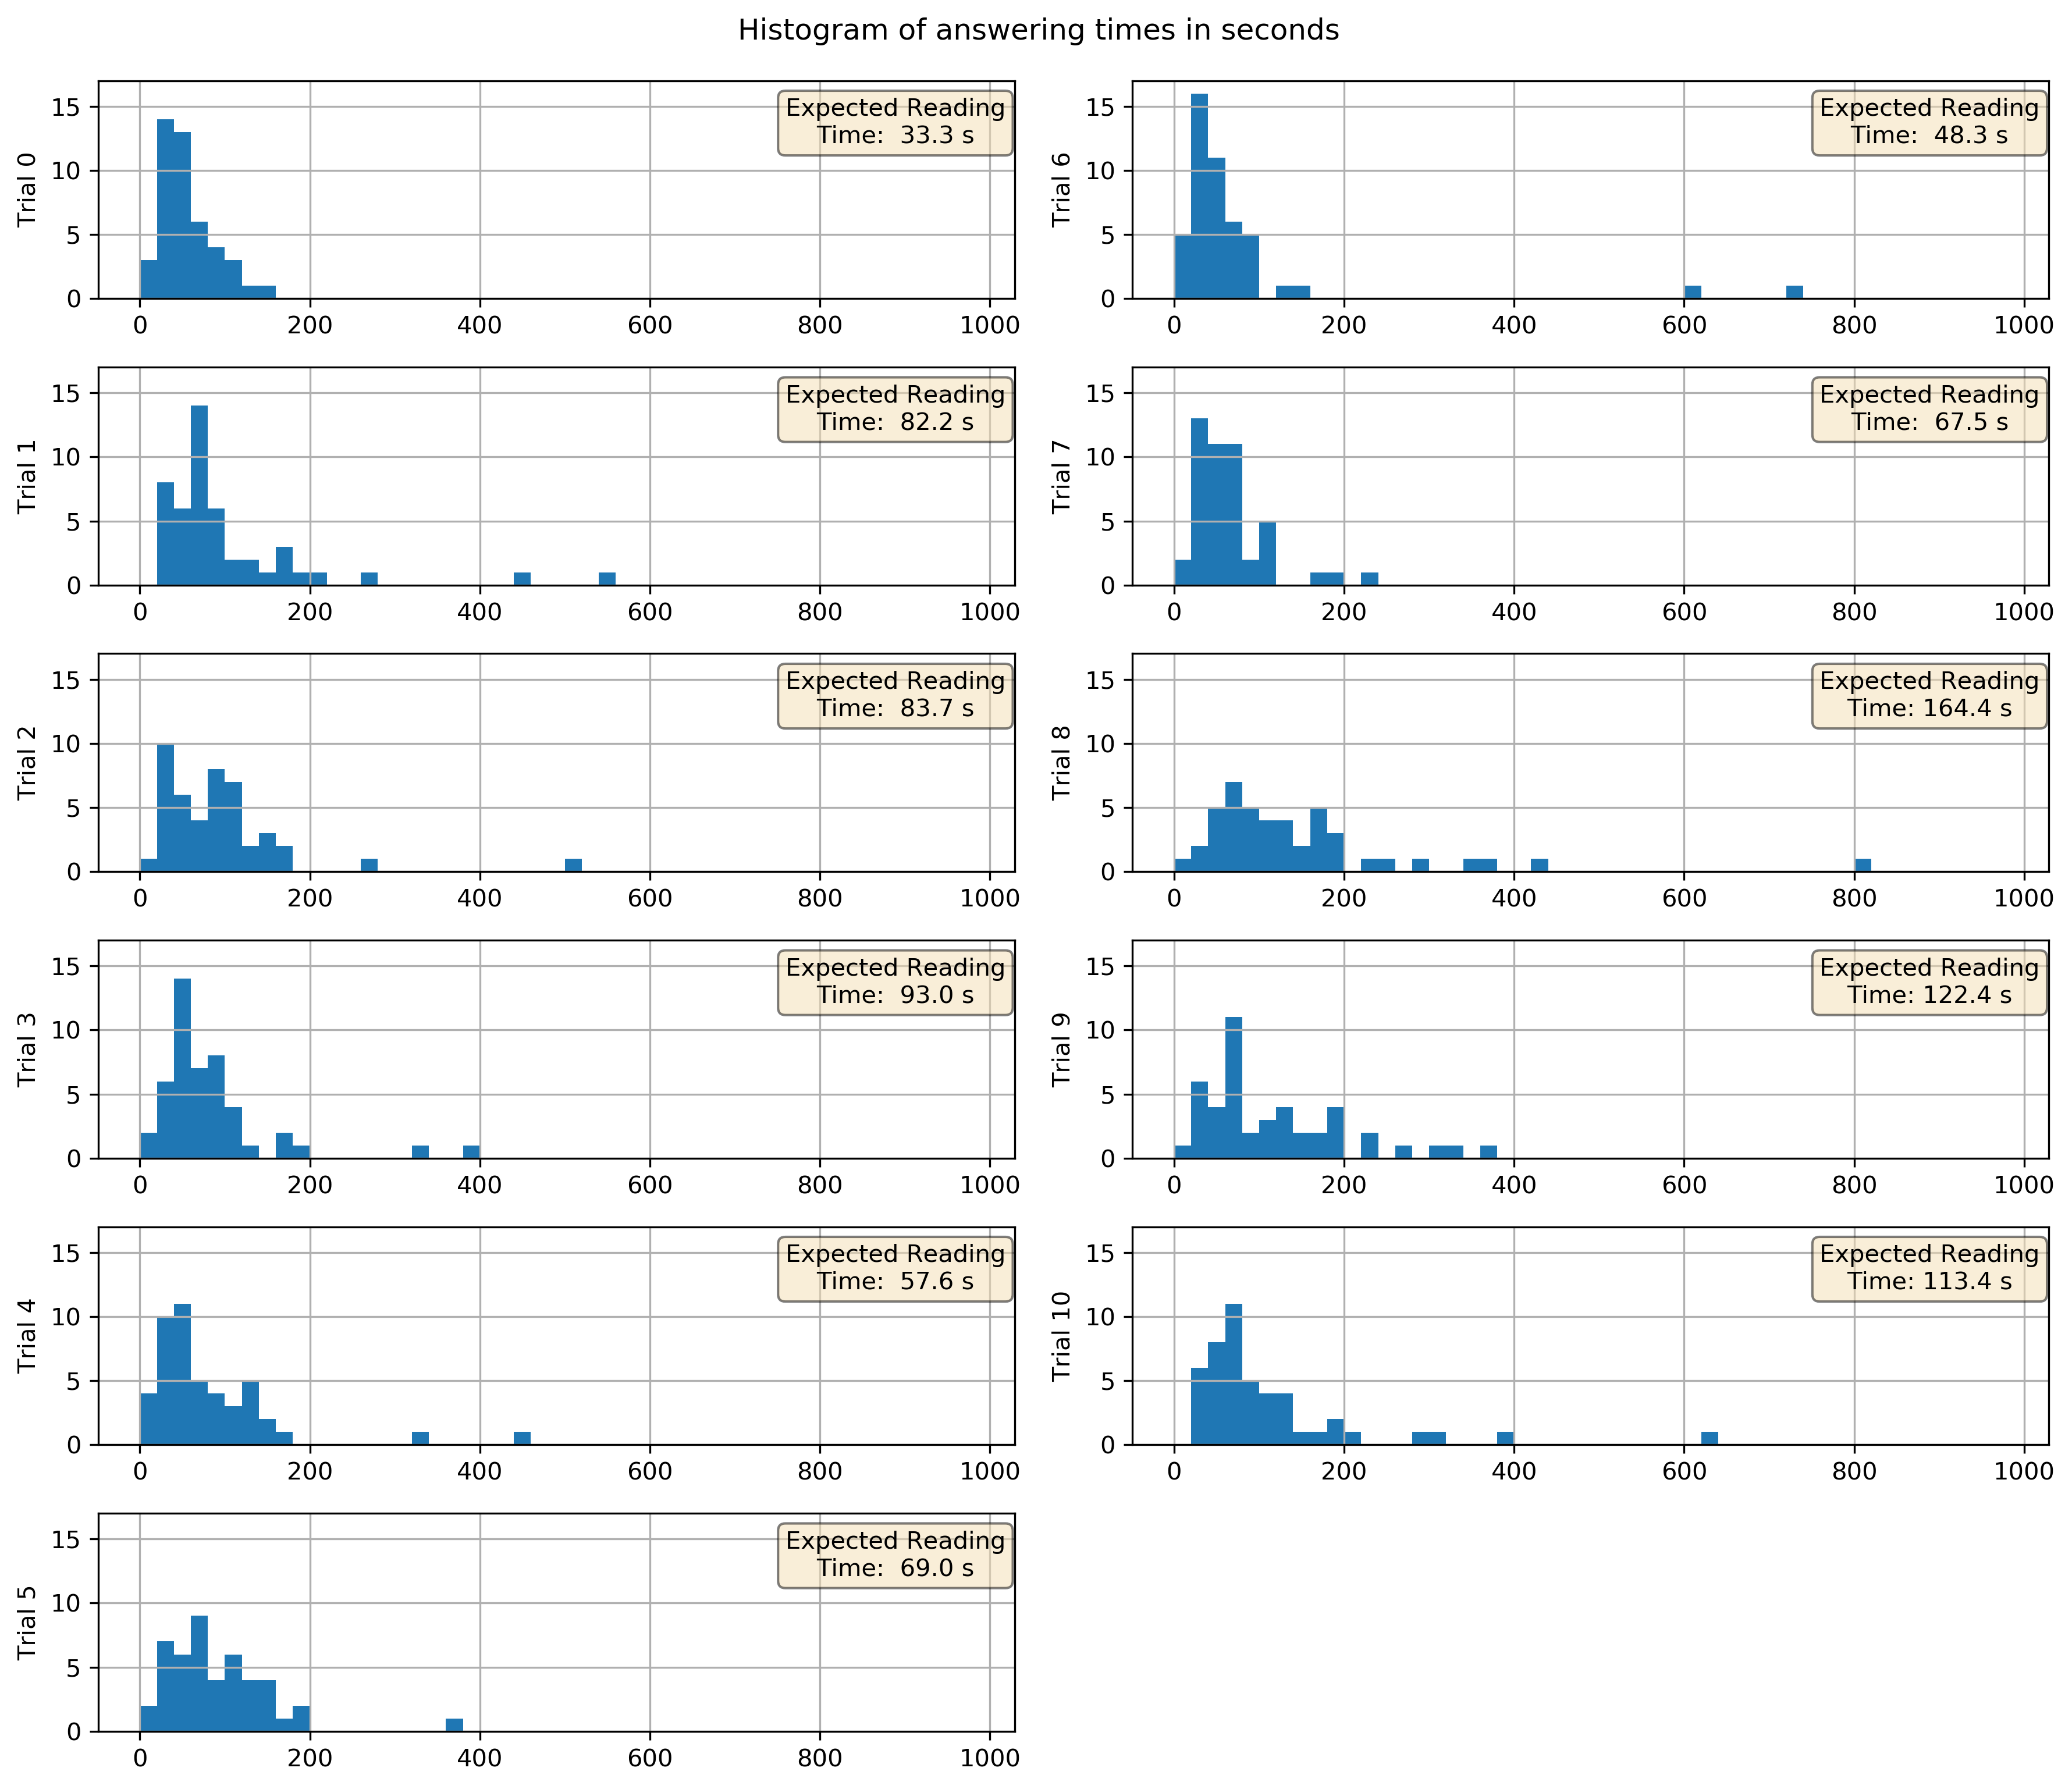

In [134]:
fig, ax = plt.subplots(6,2, figsize=(12,10), dpi=300)
ax = ax.reshape(-1, order='F')
fig.delaxes(ax[-1])

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

for col_idx, col in enumerate(reaction_time_df.columns):
    reaction_time_df[col].hist(ax=ax[col_idx], bins=np.arange(0, 1000, 20))
    ax[col_idx].set_ylabel('Trial '+ str(int(col[4:])))
    ax[col_idx].set_ylim([0,17])
    
    textstr = "Expected Reading\nTime: {:5.1f} s".format(trial_num2reading_time[col_idx])
    # place a text box in upper left in axes coords
    ax[col_idx].text(0.87, 0.92, textstr, transform=ax[col_idx].transAxes, 
                        horizontalalignment='center',
                        verticalalignment='top', bbox=props)

fig.suptitle('Histogram of answering times in seconds', y=1.02)
plt.tight_layout()
plt.savefig('exp1_answering_times.pdf', format='pdf')

# Timestamps

In [140]:
main_df.filter(like='Time', axis=1).columns.tolist()

['Answer.confidenceTime0',
 'Answer.confidenceTime1',
 'Answer.confidenceTime10',
 'Answer.confidenceTime2',
 'Answer.confidenceTime3',
 'Answer.confidenceTime4',
 'Answer.confidenceTime5',
 'Answer.confidenceTime6',
 'Answer.confidenceTime7',
 'Answer.confidenceTime8',
 'Answer.confidenceTime9',
 'Answer.estimationTime0',
 'Answer.estimationTime1',
 'Answer.estimationTime10',
 'Answer.estimationTime2',
 'Answer.estimationTime3',
 'Answer.estimationTime4',
 'Answer.estimationTime5',
 'Answer.estimationTime6',
 'Answer.estimationTime7',
 'Answer.estimationTime8',
 'Answer.estimationTime9',
 'Answer.reactionTimeAnswer0',
 'Answer.reactionTimeAnswer1',
 'Answer.reactionTimeAnswer10',
 'Answer.reactionTimeAnswer2',
 'Answer.reactionTimeAnswer3',
 'Answer.reactionTimeAnswer4',
 'Answer.reactionTimeAnswer5',
 'Answer.reactionTimeAnswer6',
 'Answer.reactionTimeAnswer7',
 'Answer.reactionTimeAnswer8',
 'Answer.reactionTimeAnswer9',
 'Answer.realFakeTime0',
 'Answer.realFakeTime1',
 'Answer.rea

In [254]:
selected_columns = [col for col 
                    in main_df.filter(like='Time', axis=1).columns.tolist() 
                    if 'reaction' not in col]

In [290]:
timestamps_df = main_df[selected_columns].copy()

In [291]:
items_ = [mysplit(col) for col in timestamps_df.columns.tolist()]
renamed_columns = ['{:02d}_'.format(int(tail)) + inflection.underscore(head.split('.')[1]) 
                    for head, tail in items_]

In [292]:
timestamps_df.columns = renamed_columns

In [293]:
timestamps_df = timestamps_df.sort_index(axis=1)

In [294]:
timestamps_df = timestamps_df.drop([22, 40, 46], axis=0)

In [295]:
timestamps_df = timestamps_df.applymap(lambda x: pd.to_datetime(int(x), unit='ms'))

## Time Spent answering questions

### Example

In [744]:
timestamps_df.iloc[46].sort_values()

01_start_time        2018-06-19 23:17:36.808
01_real_fake_time    2018-06-19 23:18:23.512
01_confidence_time   2018-06-19 23:18:25.283
01_estimation_time   2018-06-19 23:18:29.826
01_validation_time   2018-06-19 23:18:41.990
10_start_time        2018-06-19 23:19:01.432
10_real_fake_time    2018-06-19 23:20:47.390
10_confidence_time   2018-06-19 23:20:48.086
10_estimation_time   2018-06-19 23:21:01.454
10_validation_time   2018-06-19 23:21:06.135
00_start_time        2018-06-19 23:21:18.769
00_real_fake_time    2018-06-19 23:22:45.601
00_confidence_time   2018-06-19 23:22:46.279
00_estimation_time   2018-06-19 23:22:52.880
00_validation_time   2018-06-19 23:22:57.517
09_start_time        2018-06-19 23:23:04.845
09_real_fake_time    2018-06-19 23:24:21.765
09_estimation_time   2018-06-19 23:24:33.666
09_confidence_time   2018-06-19 23:24:38.200
09_validation_time   2018-06-19 23:25:19.406
02_start_time        2018-06-19 23:25:23.867
02_real_fake_time    2018-06-19 23:26:41.101
02_confide

In [745]:
_time_diffs = timestamps_df.iloc[46].sort_values().diff().dt.total_seconds()

In [746]:
_time_diffs.head()

01_start_time            NaN
01_real_fake_time     46.704
01_confidence_time     1.771
01_estimation_time     4.543
01_validation_time    12.164
Name: 49, dtype: float64

In [747]:
_stats_new_values = np.roll(_time_diffs.values, -1)

In [748]:
_stats_new_index = [item.replace('start', 'reading') for item in _time_diffs.index.tolist()]

In [749]:
pd.Series(data=_stats_new_values, index=_stats_new_index)

01_reading_time        46.704
01_real_fake_time       1.771
01_confidence_time      4.543
01_estimation_time     12.164
01_validation_time     19.442
10_reading_time       105.958
10_real_fake_time       0.696
10_confidence_time     13.368
10_estimation_time      4.681
10_validation_time     12.634
00_reading_time        86.832
00_real_fake_time       0.678
00_confidence_time      6.601
00_estimation_time      4.637
00_validation_time      7.328
09_reading_time        76.920
09_real_fake_time      11.901
09_estimation_time      4.534
09_confidence_time     41.206
09_validation_time      4.461
02_reading_time        77.234
02_real_fake_time       0.613
02_confidence_time      2.988
02_estimation_time      4.045
02_validation_time     24.033
03_reading_time        58.636
03_real_fake_time       0.809
03_confidence_time      3.604
03_estimation_time      2.947
03_validation_time     16.686
05_reading_time        33.704
05_real_fake_time       0.506
05_confidence_time      3.784
05_estimat

## Question Answering Statistics 

In [324]:
def get_stats(row):
    # gives time spent on each question on each trial in seconds
    _time_diffs = row.sort_values().diff().dt.total_seconds()
    _stats_new_values = np.roll(_time_diffs.values, -1)
    _stats_new_index = [item.replace('start', 'reading') for item in _time_diffs.index.tolist()]
    return pd.Series(data=_stats_new_values, index=_stats_new_index)

In [331]:
stats_df = main_df[['WorkerId']].join(timestamps_df.apply(get_stats, axis=1))

In [333]:
stats_df.head()

,WorkerId,00_confidence_time,00_estimation_time,00_reading_time,00_real_fake_time,00_validation_time,01_confidence_time,01_estimation_time,01_reading_time,01_real_fake_time,...,09_confidence_time,09_estimation_time,09_reading_time,09_real_fake_time,09_validation_time,10_confidence_time,10_estimation_time,10_reading_time,10_real_fake_time,10_validation_time
0,A39GADIK8RLMVC,1.051,12.103,3.417,0.438,0.063,1.759,98.870,2.785,0.442,...,1.340,60.795,8.593,0.534,1.481,1.144,148.554,5.506,5.233,1.945
1,A1RSDFFZIVE5BO,3.136,12.507,46.524,1.193,4.520,7.315,54.902,104.582,0.992,...,2.714,9.189,208.207,0.889,4.150,2.795,4.172,179.207,4.176,14.246
2,A1H72Y9Z5NJXDS,2.877,9.699,6.471,14.533,8.850,10.297,4.382,4.378,0.474,...,12.841,2.654,9.105,2.449,2.896,25.894,58.168,8.616,8.374,NaN
3,A1U6A617Q95MTZ,3.224,2.951,20.638,0.728,12.005,3.004,50.418,13.186,3.615,...,2.352,56.474,32.246,0.675,24.500,3.671,19.524,65.183,0.617,9.736
4,A1AKX1C8GCVCTP,1.387,0.943,6.978,0.670,6.275,2.496,44.088,51.778,0.614,...,3.175,9.963,1798.080,0.592,9.992,2.937,11.783,33.260,1.944,5.217


## Reading Time

/Users/mohammad/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


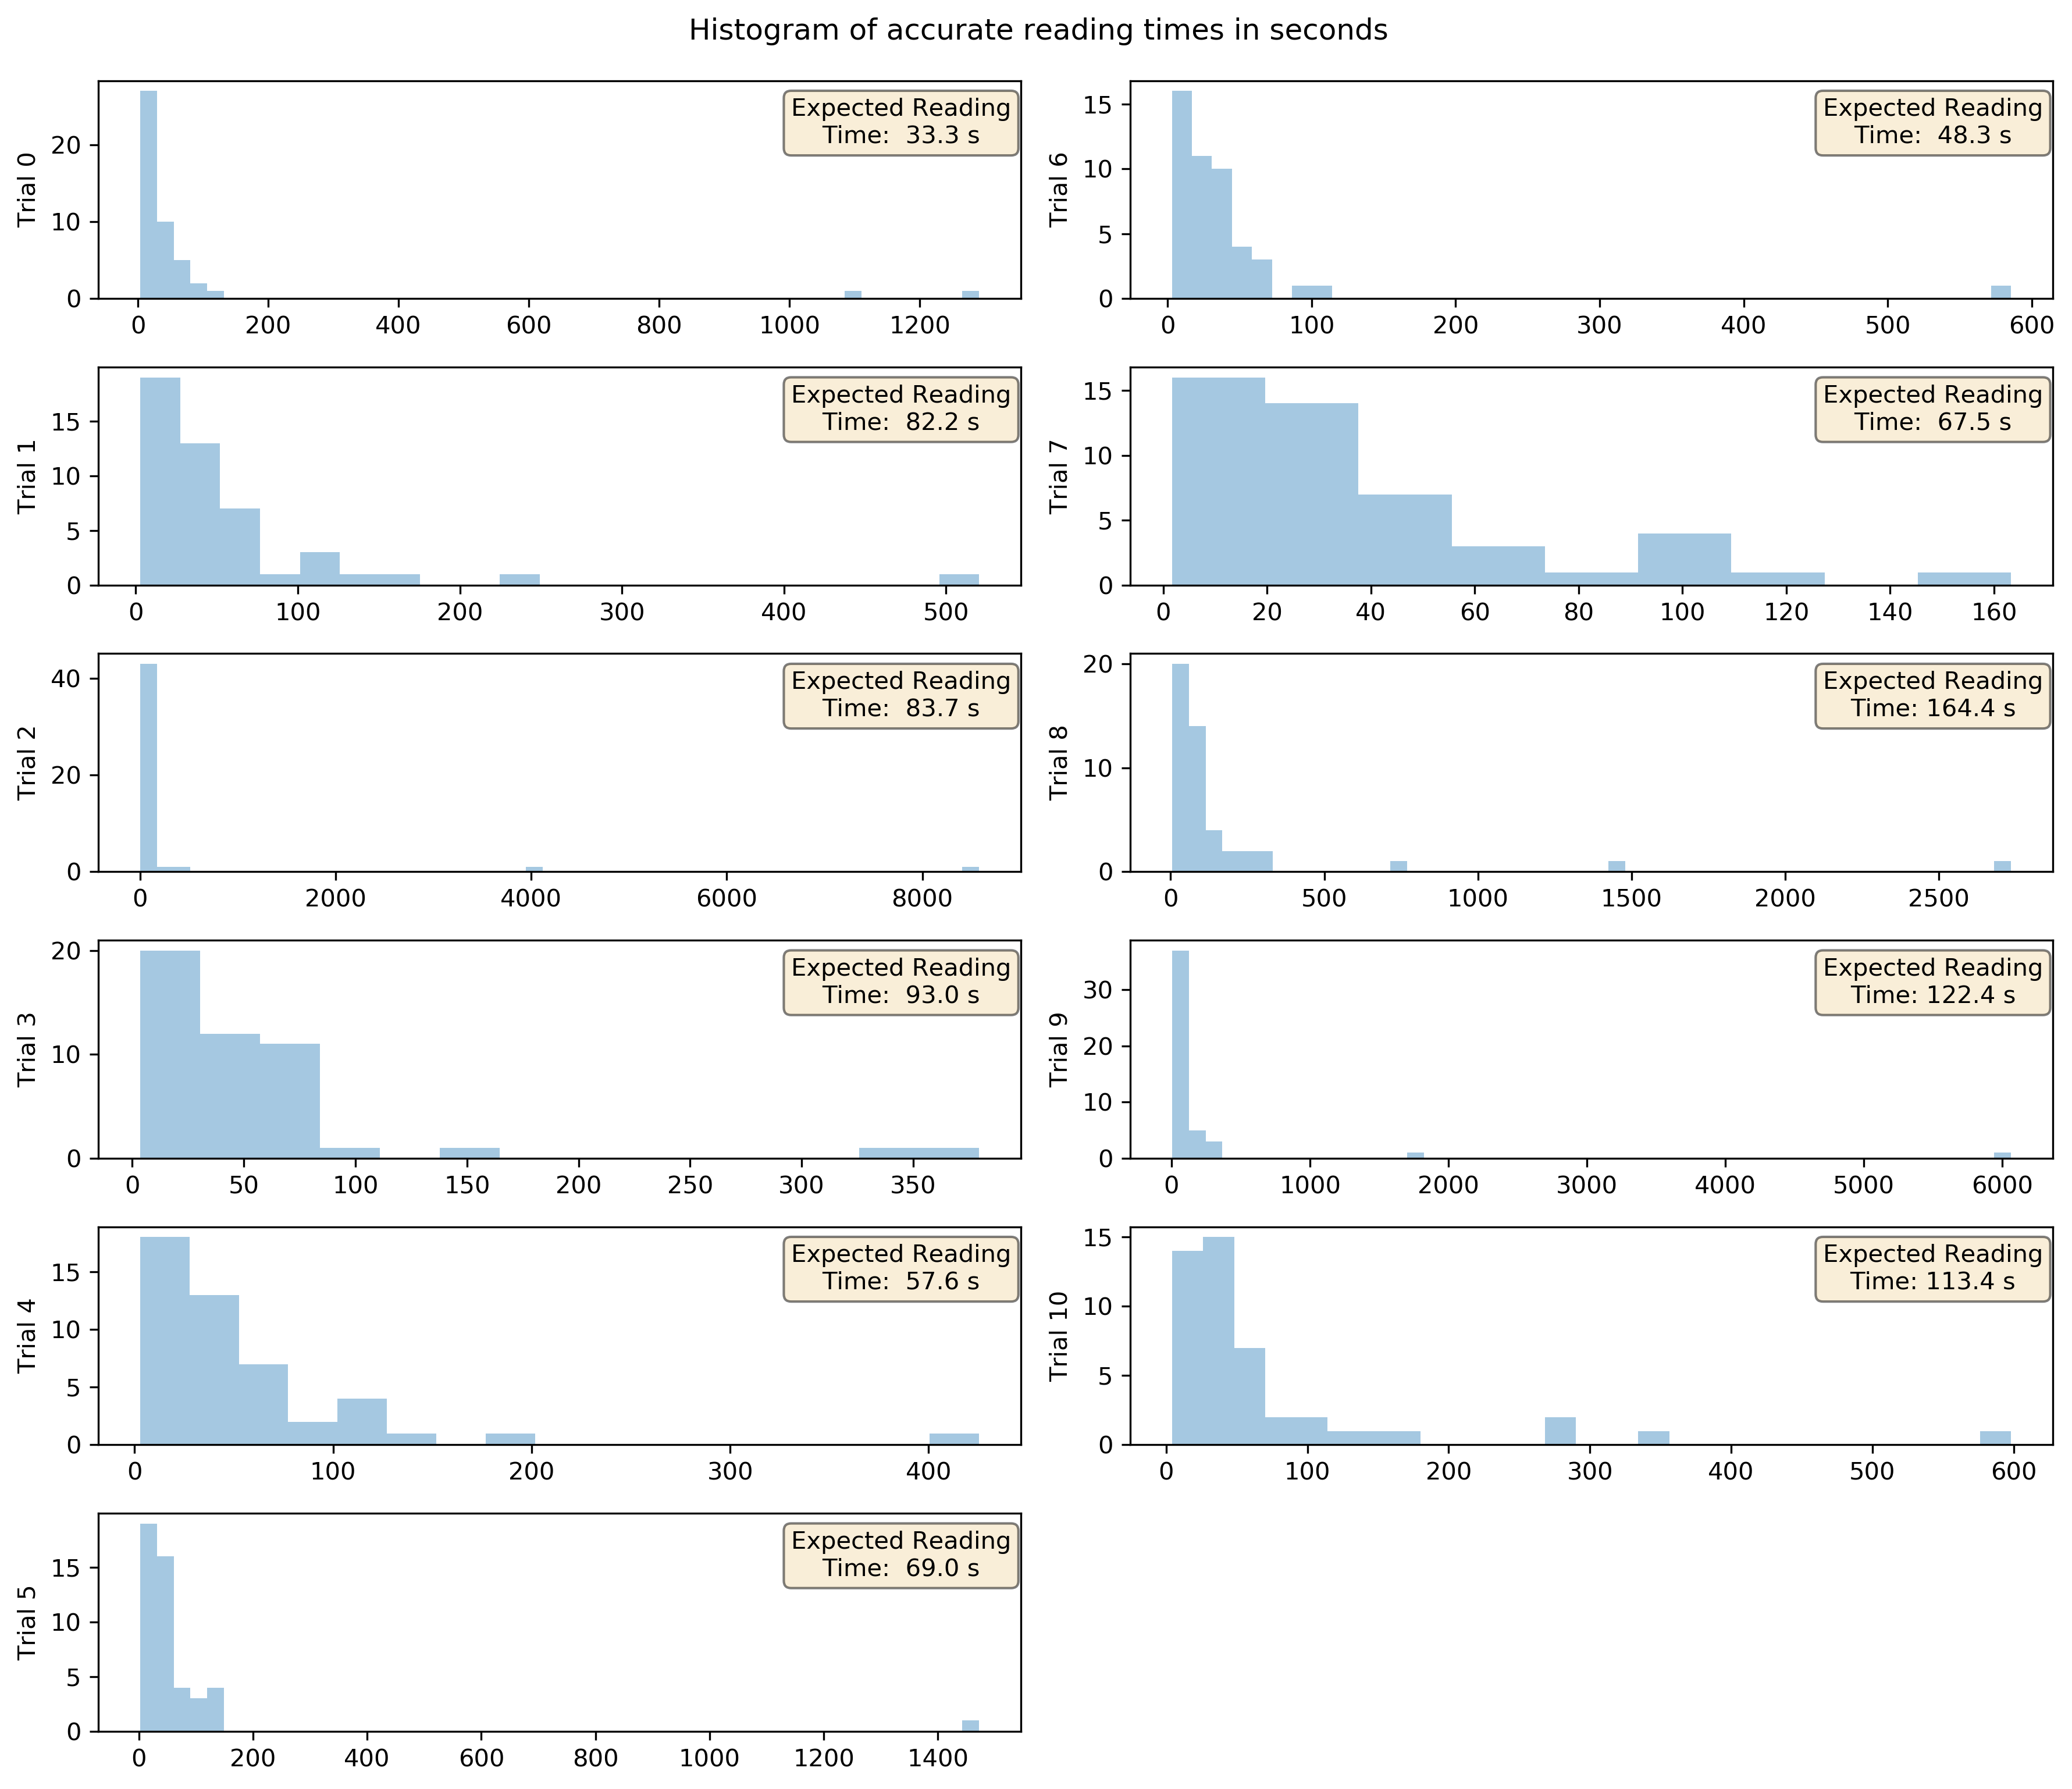

In [374]:
fig, ax = plt.subplots(6,2, figsize=(12,10), dpi=300)
ax = ax.reshape(-1, order='F')
fig.delaxes(ax[-1])

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plot_df = stats_df.filter(like='reading').sort_index(axis=1)

for col_idx, col in enumerate(plot_df.columns):
    sns.distplot(plot_df[col].dropna(), kde=False, ax=ax[col_idx])
    ax[col_idx].set_ylabel('Trial '+ str(int(col[:2])))
    ax[col_idx].set_xlabel('')
    
    textstr = "Expected Reading\nTime: {:5.1f} s".format(trial_num2reading_time[col_idx])
    # place a text box in upper left in axes coords
    ax[col_idx].text(0.87, 0.92, textstr, transform=ax[col_idx].transAxes, 
                        horizontalalignment='center',
                        verticalalignment='top', bbox=props)

fig.suptitle('Histogram of accurate reading times in seconds', y=1.02)
plt.tight_layout()
plt.savefig('exp1_stats_reading.pdf', format='pdf')

##  'Real'/'Fake' time

/Users/mohammad/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


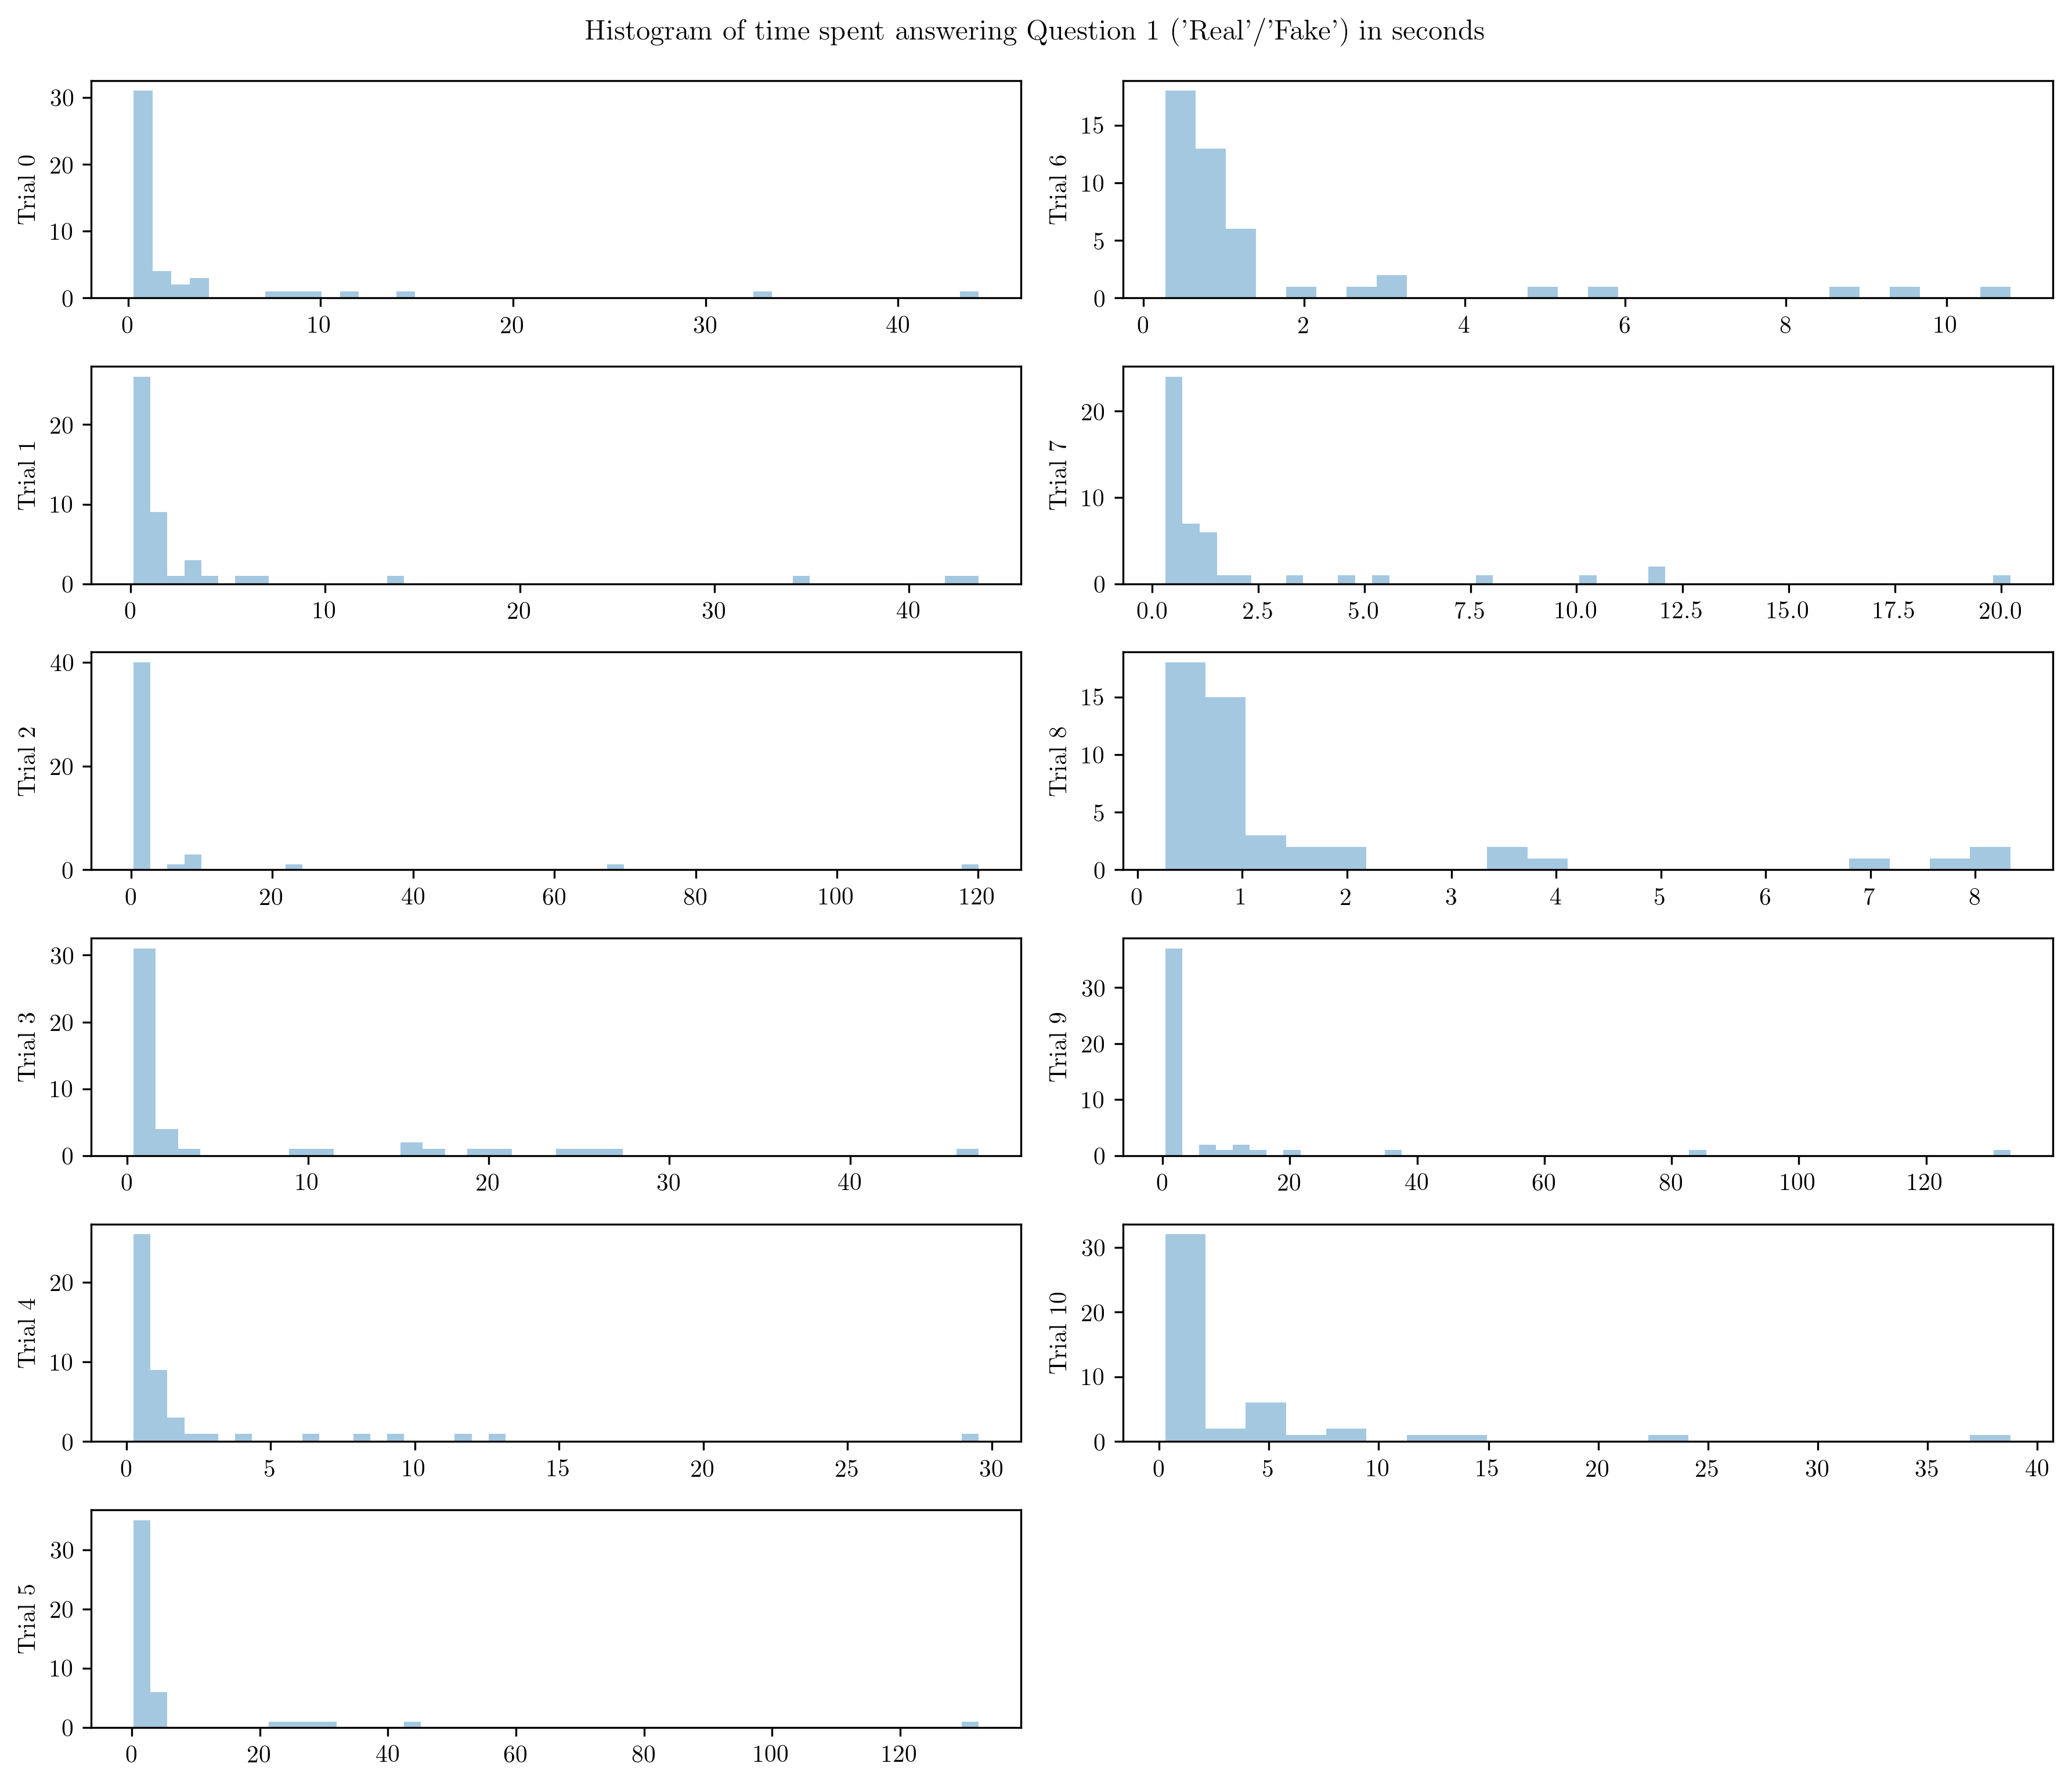

In [750]:
fig, ax = plt.subplots(6,2, figsize=(12,10), dpi=300)
ax = ax.reshape(-1, order='F')
fig.delaxes(ax[-1])

plot_df = stats_df.filter(like='real_fake').sort_index(axis=1)

for col_idx, col in enumerate(plot_df.columns):
    sns.distplot(plot_df[col].dropna(), kde=False, ax=ax[col_idx])
    ax[col_idx].set_ylabel('Trial '+ str(int(col[:2])))
    ax[col_idx].set_xlabel('')

fig.suptitle("Histogram of time spent answering Question 1 ('Real'/'Fake') in seconds", y=1.02)
plt.tight_layout()
plt.savefig('exp1_stats_real_fake.pdf', format='pdf')

## Confidence Question time

/Users/mohammad/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


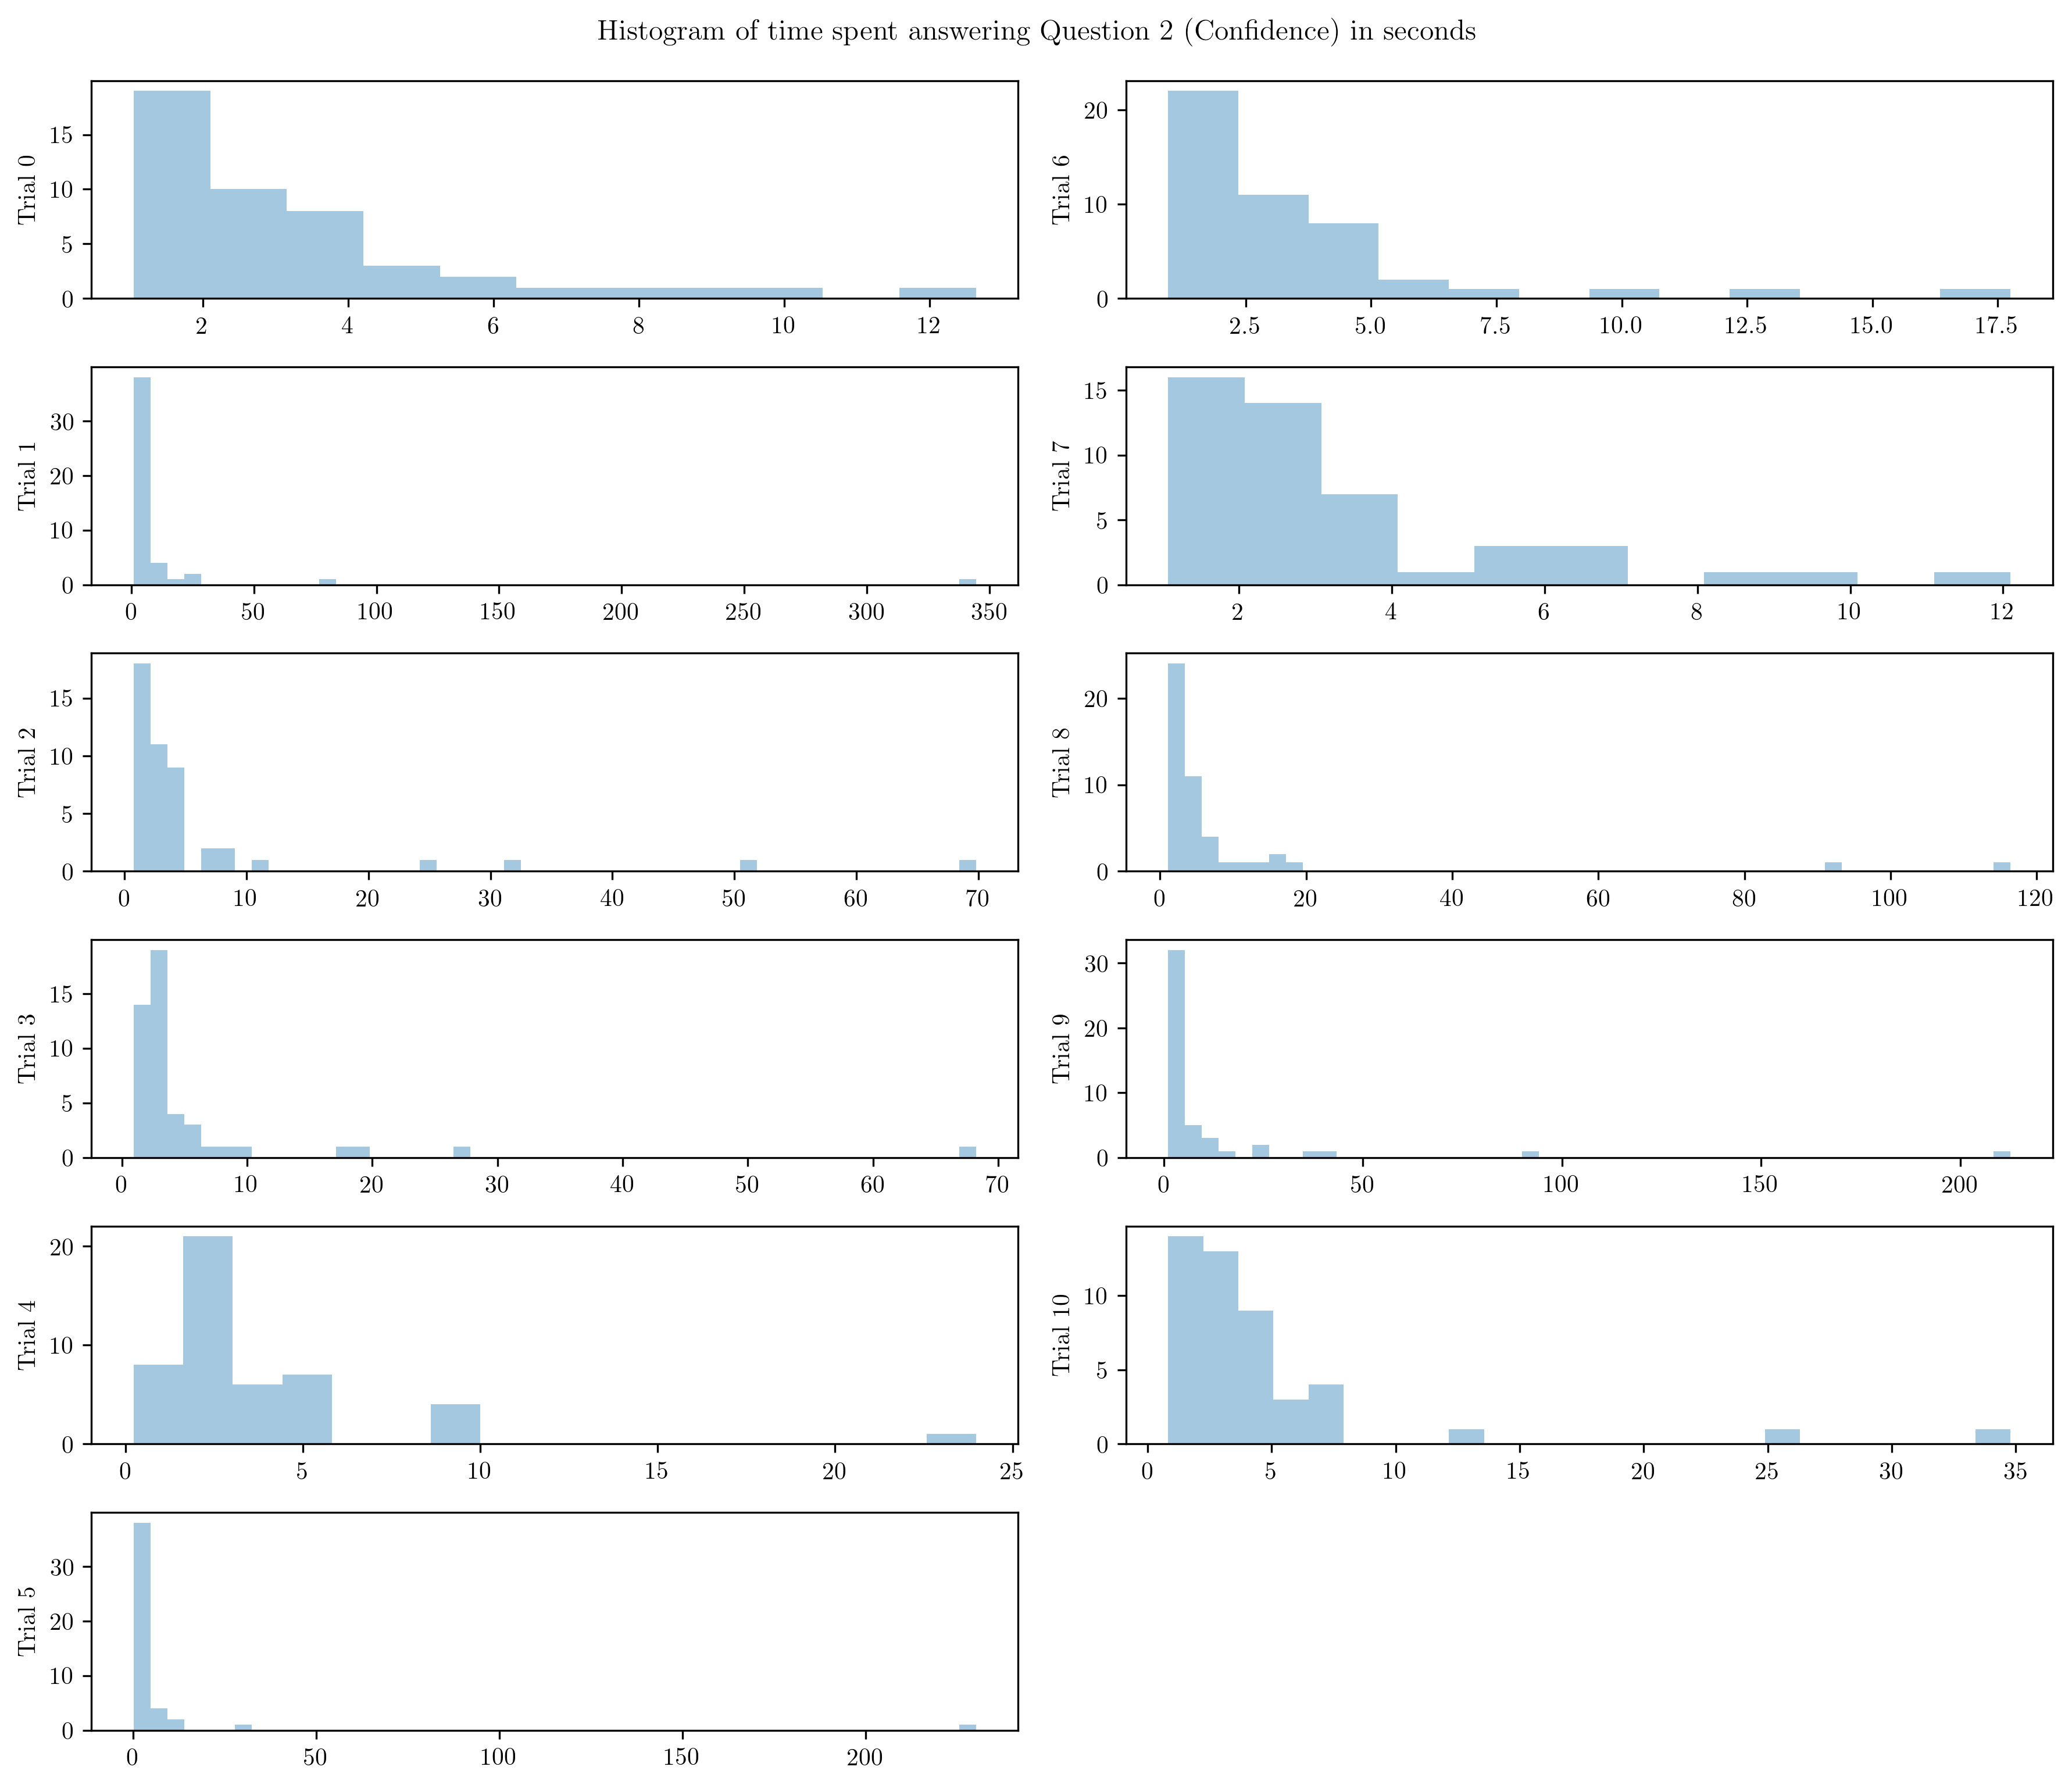

In [751]:
fig, ax = plt.subplots(6,2, figsize=(12,10), dpi=300)
ax = ax.reshape(-1, order='F')
fig.delaxes(ax[-1])

plot_df = stats_df.filter(like='confidence').sort_index(axis=1)

for col_idx, col in enumerate(plot_df.columns):
    sns.distplot(plot_df[col].dropna(), kde=False, ax=ax[col_idx])
    ax[col_idx].set_ylabel('Trial '+ str(int(col[:2])))
    ax[col_idx].set_xlabel('')

fig.suptitle("Histogram of time spent answering Question 2 (Confidence) in seconds", y=1.02)
plt.tight_layout()
plt.savefig('exp1_stats_conf.pdf', format='pdf')

##  Estimation time

/Users/mohammad/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


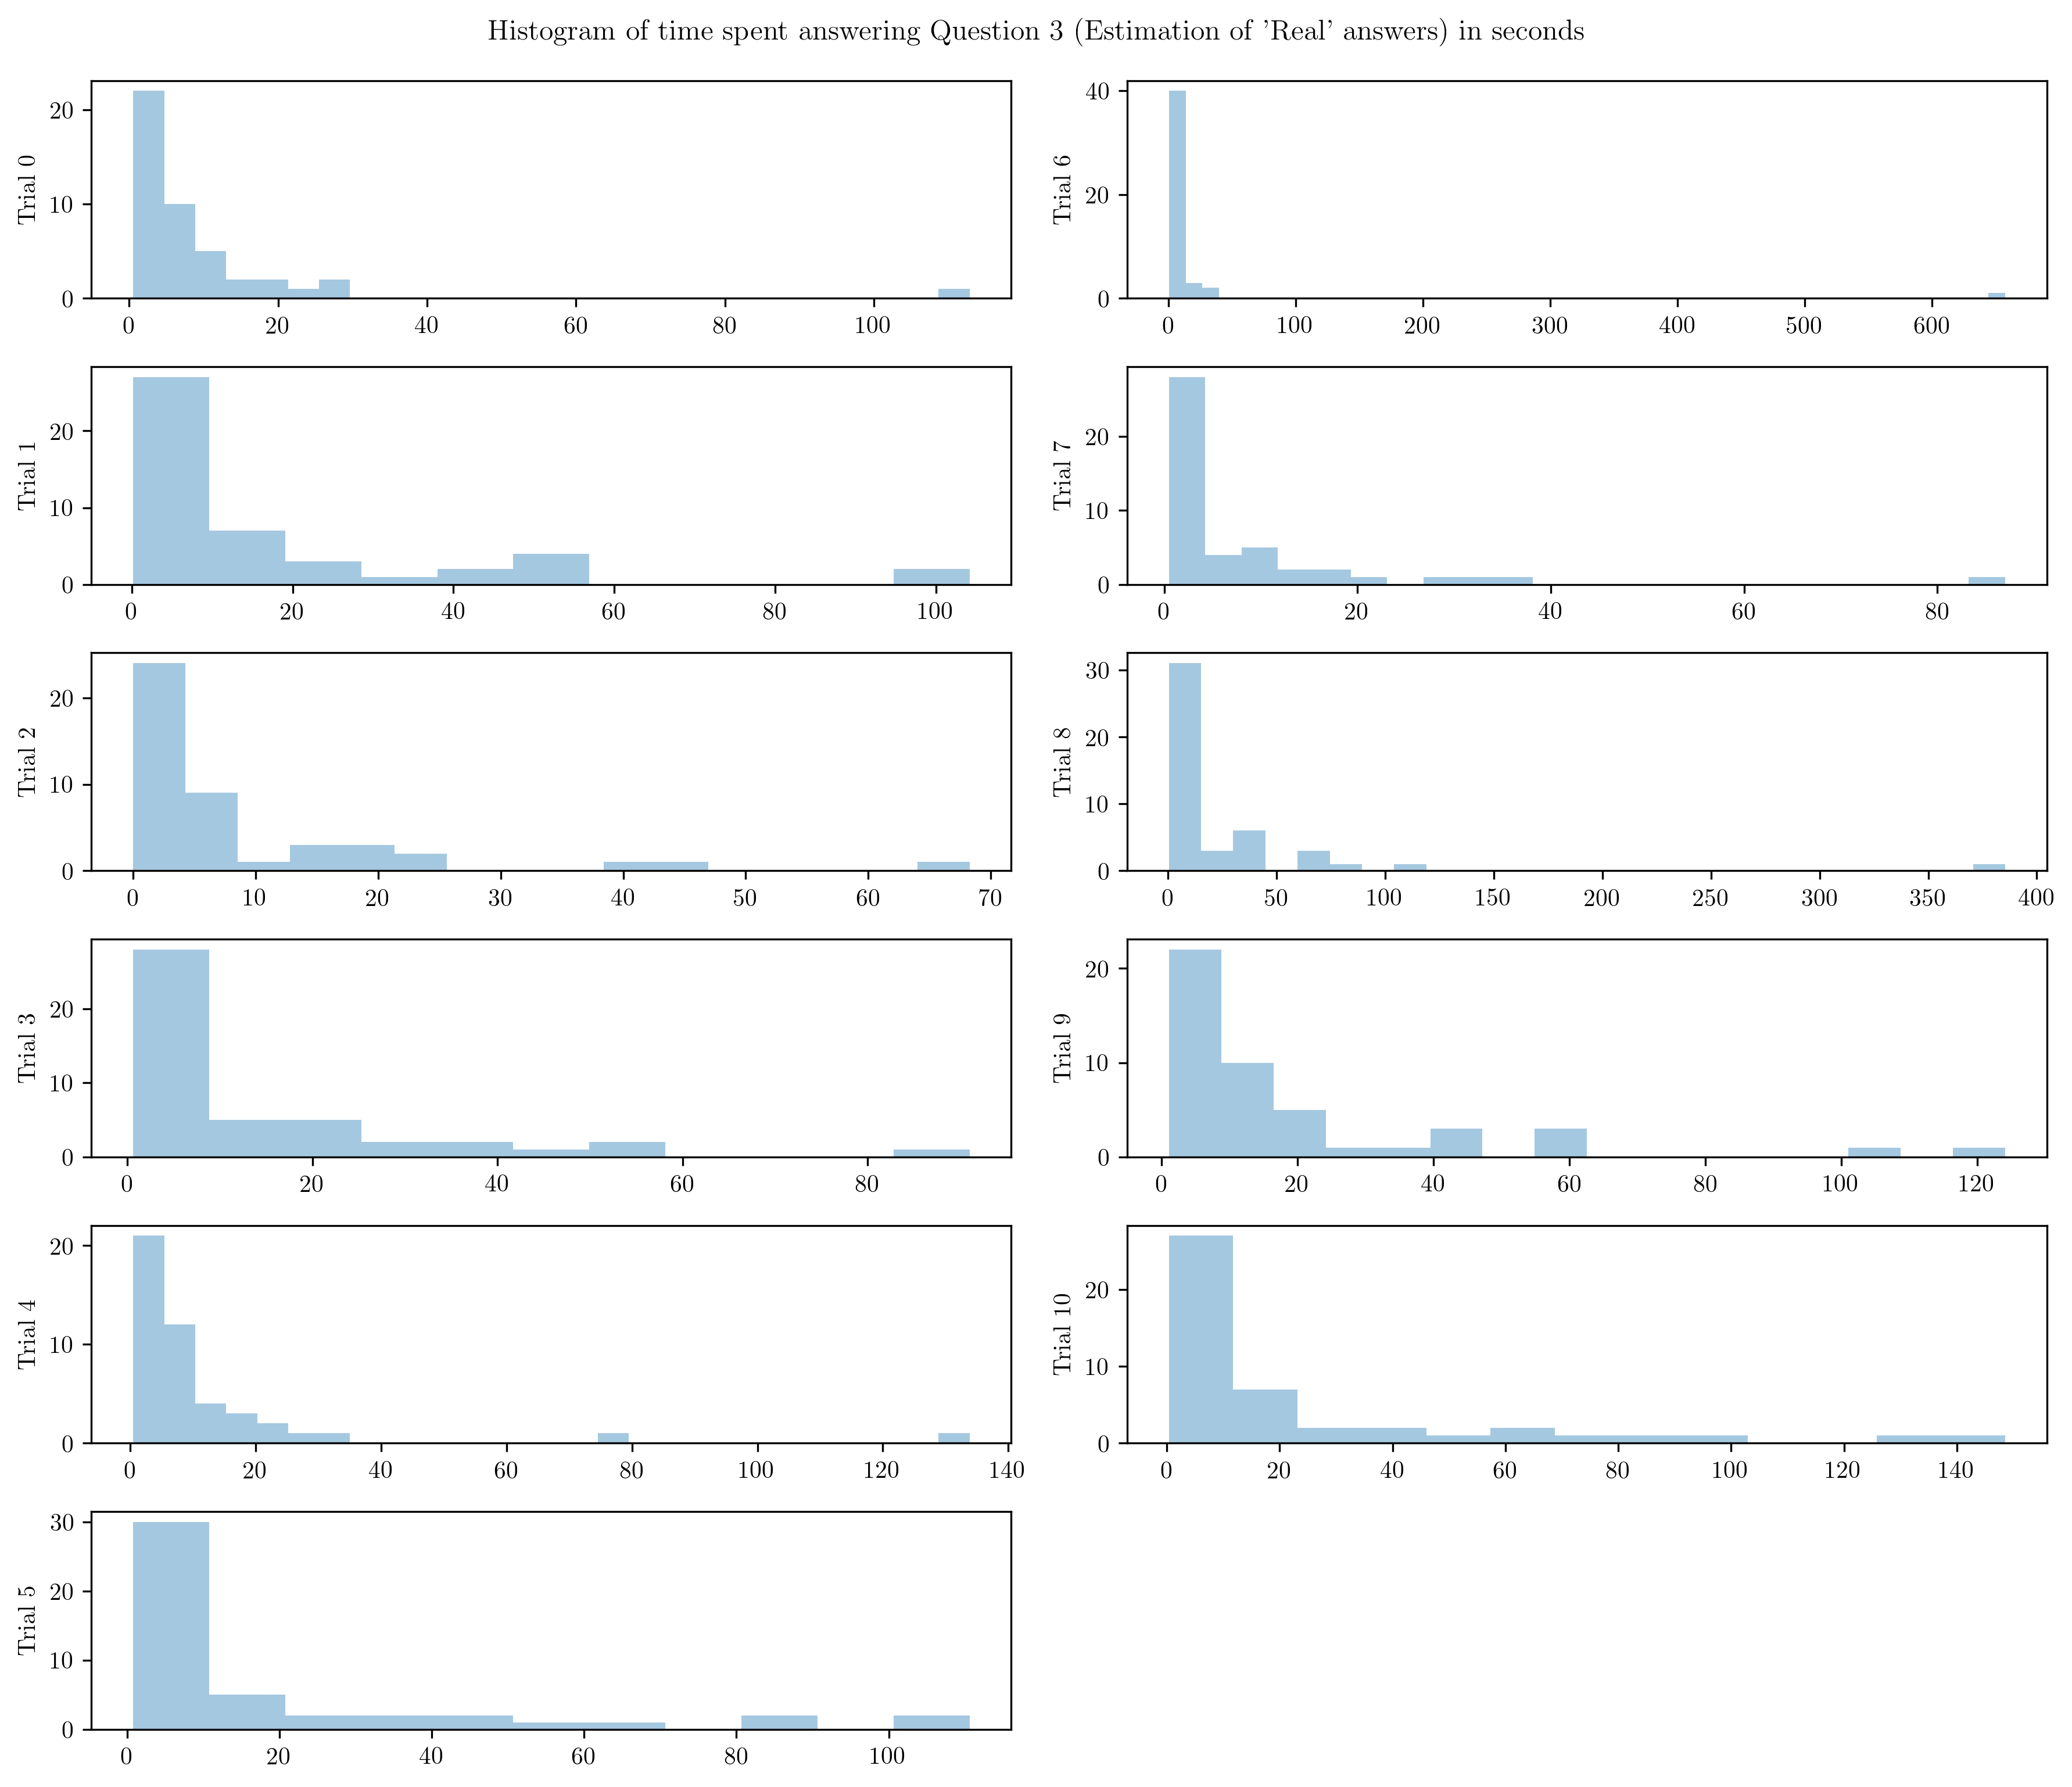

In [752]:
fig, ax = plt.subplots(6,2, figsize=(12,10), dpi=300)
ax = ax.reshape(-1, order='F')
fig.delaxes(ax[-1])

plot_df = stats_df.filter(like='estimation').sort_index(axis=1)

for col_idx, col in enumerate(plot_df.columns):
    sns.distplot(plot_df[col].dropna(), kde=False, ax=ax[col_idx])
    ax[col_idx].set_ylabel('Trial '+ str(int(col[:2])))
    ax[col_idx].set_xlabel('')

fig.suptitle("Histogram of time spent answering Question 3 (Estimation of 'Real' answers) in seconds", y=1.02)
plt.tight_layout()
plt.savefig('exp1_stats_estim.pdf', format='pdf')

##  Validation time

/Users/mohammad/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


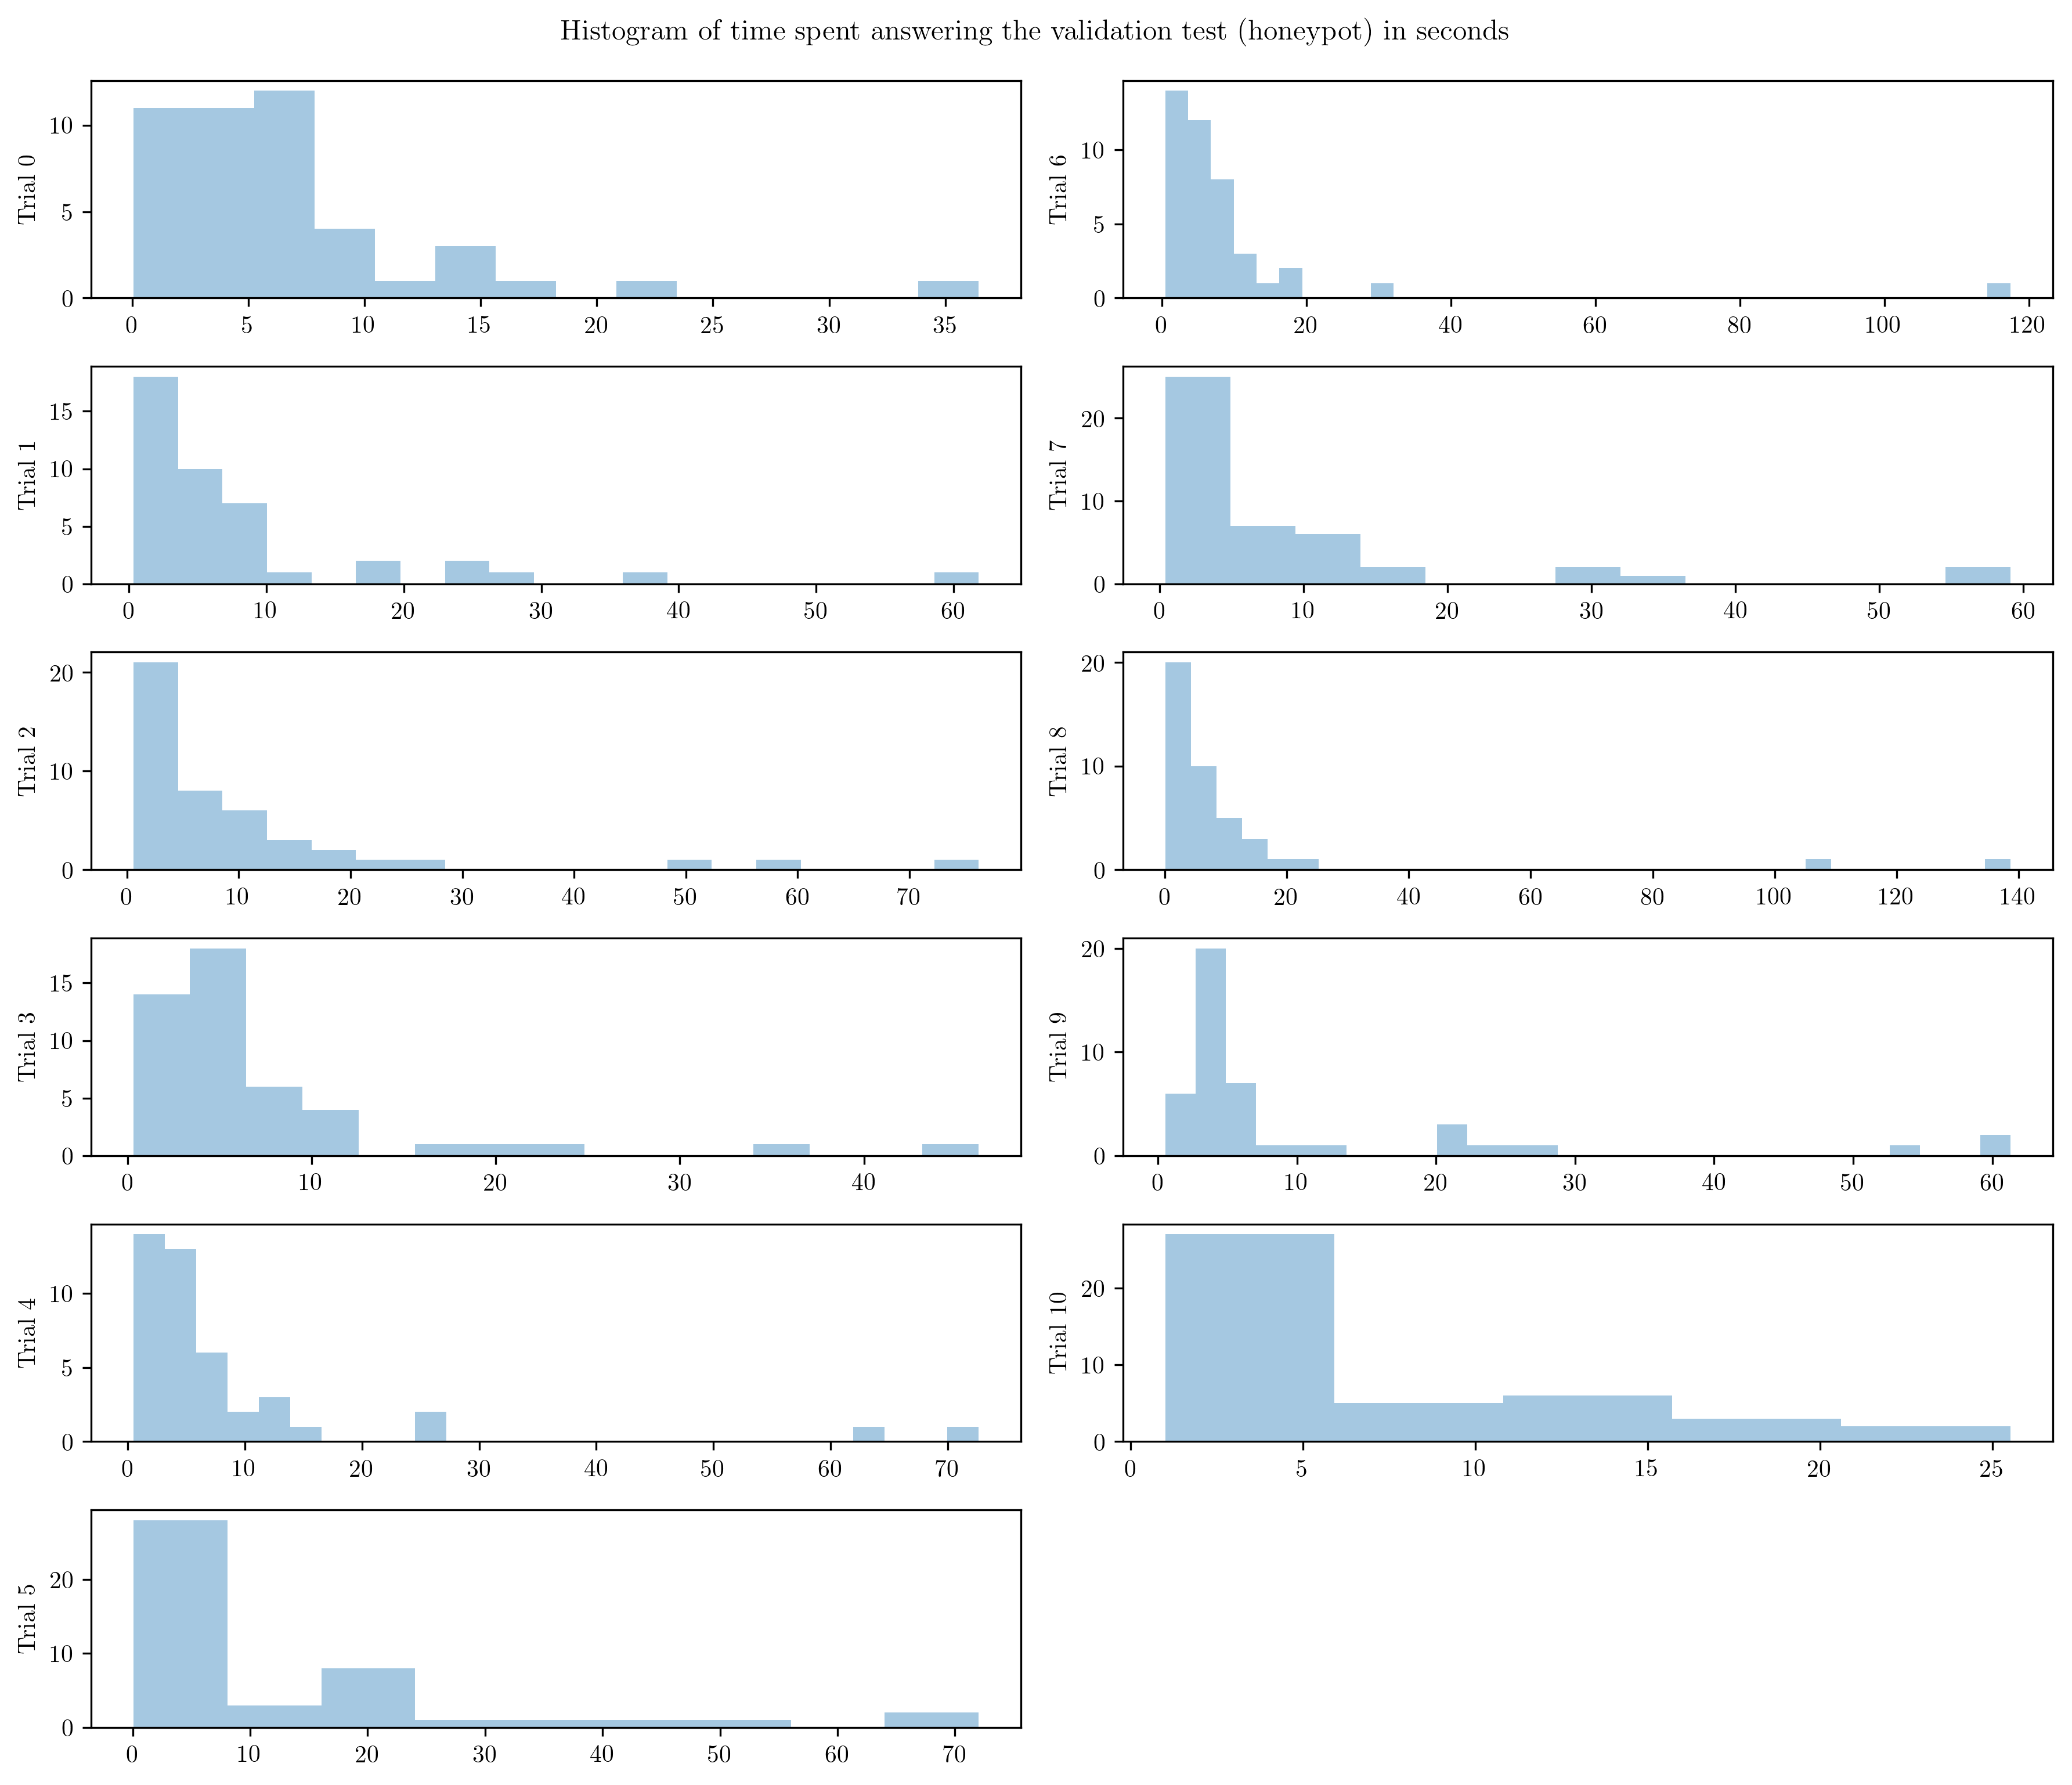

In [753]:
fig, ax = plt.subplots(6,2, figsize=(12,10), dpi=300)
ax = ax.reshape(-1, order='F')
fig.delaxes(ax[-1])

plot_df = stats_df.filter(like='validation').sort_index(axis=1)

for col_idx, col in enumerate(plot_df.columns):
    sns.distplot(plot_df[col].dropna(), kde=False, ax=ax[col_idx])
    ax[col_idx].set_ylabel('Trial '+ str(int(col[:2])))
    ax[col_idx].set_xlabel('')

fig.suptitle("Histogram of time spent answering the validation test (honeypot) in seconds", y=1.02)
plt.tight_layout()
plt.savefig('exp1_stats_valid.pdf', format='pdf')

# Majority Vote

In [761]:
def majority_answer(trial_number, verbose=False, dataframe=main_df):
    
    trial_df= dataframe[['WorkerId', 'Answer.opinion'+trial_number,
                     'Answer.confAnswer'+trial_number, 'Answer.estimAnswer'+trial_number, 
                     'Answer.orig_index'+trial_number]].dropna().copy()
    
    # Percentage that thought the news was real
    p_real = 100*len(trial_df[lambda row: row['Answer.opinion' + trial_number] == 1])/float(len(trial_df))
    
    # Percentage that thought the news was fake
    p_fake = 100 - p_real
    
    if p_real > p_fake:
        answer = 1
        if verbose:
            print("Trial {:2s}: {:0.2f}% voted real, and {:0.2f}% voted fake. 'Real' is the Majority Vote answer.".format(trial_number, p_real, p_fake))
     
    elif p_fake > p_real:
        answer = -1
        if verbose:
            print("Trial {:2s}: {:0.2f}% voted real, and {:0.2f}% voted fake. 'Fake' is the Majority Vote answer.".format(trial_number, p_real, p_fake))
    
    else:
        print("Uknown case!")
                
    return answer

In [787]:
trial_num2mv = {trial_num:majority_answer(str(trial_num), verbose=True) for trial_num in range(0, 11)}

Trial 0 : 38.78% voted real, and 61.22% voted fake. 'Fake' is the Majority Vote answer.
Trial 1 : 54.17% voted real, and 45.83% voted fake. 'Real' is the Majority Vote answer.
Trial 2 : 58.33% voted real, and 41.67% voted fake. 'Real' is the Majority Vote answer.
Trial 3 : 58.33% voted real, and 41.67% voted fake. 'Real' is the Majority Vote answer.
Trial 4 : 38.78% voted real, and 61.22% voted fake. 'Fake' is the Majority Vote answer.
Trial 5 : 63.27% voted real, and 36.73% voted fake. 'Real' is the Majority Vote answer.
Trial 6 : 36.73% voted real, and 63.27% voted fake. 'Fake' is the Majority Vote answer.
Trial 7 : 34.04% voted real, and 65.96% voted fake. 'Fake' is the Majority Vote answer.
Trial 8 : 72.92% voted real, and 27.08% voted fake. 'Real' is the Majority Vote answer.
Trial 9 : 41.67% voted real, and 58.33% voted fake. 'Fake' is the Majority Vote answer.
Trial 10: 66.67% voted real, and 33.33% voted fake. 'Real' is the Majority Vote answer.


# Confidence-Weighted Majority Vote (CWMV)

In [763]:
def weighted_majority_vote_answer(trial_number, verbose=False, dataframe = main_df):
    def calculate_weighted_opinion(row):
        return float(row['Answer.opinion' + trial_number]) * float(row['Answer.confAnswer' + trial_number])/100.0

    trial_df= dataframe[['WorkerId', 'Answer.opinion'+trial_number,
                     'Answer.confAnswer'+trial_number, 'Answer.estimAnswer'+trial_number, 
                     'Answer.orig_index'+trial_number]].dropna().copy()
    
    trial_df['weighted_opinion'+trial_number] = trial_df.apply(calculate_weighted_opinion, axis=1)
    weighted_vote = trial_df['weighted_opinion'+trial_number].mean()
    
    if weighted_vote > 0:
        answer = 1
        if verbose:
            print("Trial {:2s}: Confidence-Weighted Majority Vote is {:0.2f} on a scale of [-1, 1]. 'Real' is the CWMV answer.".format(trial_number, weighted_vote))
    else:
        answer = -1
        if verbose:
            print("Trial {:2s}: Confidence-Weighted Majority Vote is {:0.2f} on a scale of [-1, 1]. 'Fake' is the CWMV answer.".format(trial_number, weighted_vote))

    return answer

In [788]:
trial_num2cwmv = {trial_num:weighted_majority_vote_answer(str(trial_num), verbose=True) for trial_num in range(0, 11)}

Trial 0 : Confidence-Weighted Majority Vote is -0.18 on a scale of [-1, 1]. 'Fake' is the CWMV answer.
Trial 1 : Confidence-Weighted Majority Vote is 0.03 on a scale of [-1, 1]. 'Real' is the CWMV answer.
Trial 2 : Confidence-Weighted Majority Vote is 0.14 on a scale of [-1, 1]. 'Real' is the CWMV answer.
Trial 3 : Confidence-Weighted Majority Vote is 0.15 on a scale of [-1, 1]. 'Real' is the CWMV answer.
Trial 4 : Confidence-Weighted Majority Vote is -0.17 on a scale of [-1, 1]. 'Fake' is the CWMV answer.
Trial 5 : Confidence-Weighted Majority Vote is 0.15 on a scale of [-1, 1]. 'Real' is the CWMV answer.
Trial 6 : Confidence-Weighted Majority Vote is -0.18 on a scale of [-1, 1]. 'Fake' is the CWMV answer.
Trial 7 : Confidence-Weighted Majority Vote is -0.23 on a scale of [-1, 1]. 'Fake' is the CWMV answer.
Trial 8 : Confidence-Weighted Majority Vote is 0.35 on a scale of [-1, 1]. 'Real' is the CWMV answer.
Trial 9 : Confidence-Weighted Majority Vote is -0.09 on a scale of [-1, 1]. 'F

# Surprisingly Popular

## Initial Tests

In [80]:
main_df_q0= main_df[['WorkerId', 'Answer.opinion0',
                     'Answer.confAnswer0', 'Answer.estimAnswer0', 
                     'Answer.orig_index0']].dropna().copy()

In [157]:
main_df_q0['truth'] = main_df_q0['Answer.orig_index0'].apply(lambda x: orig_index2truth[x])

In [188]:
main_df_q0.head()

,WorkerId,Answer.opinion0,Answer.confAnswer0,Answer.estimAnswer0,Answer.orig_index0,truth,weighted_opinion0
0,A39GADIK8RLMVC,-1.0,90,70,10,1,-0.9
1,A1RSDFFZIVE5BO,-1.0,50,50,10,1,-0.5
2,A1H72Y9Z5NJXDS,1.0,90,70,10,1,0.9
3,A1U6A617Q95MTZ,-1.0,70,50,10,1,-0.7
4,A1AKX1C8GCVCTP,1.0,60,60,10,1,0.6


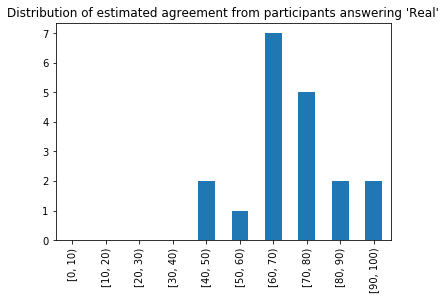

In [365]:
series = main_df_q0[lambda x: x['Answer.opinion0'] == 1]['Answer.estimAnswer0'].astype('float')
step = 10
bin_range = np.arange(0, 100+step, step)
out, bins  = pd.cut(series, bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(title="Distribution of estimated agreement from participants answering 'Real'")

## Histograms

In [498]:
def plot_estimation_histograms(trial_number, dataframe=main_df):
    _, ax = plt.subplots(2,1, figsize=(10, 10), dpi=150)
    series = dataframe[lambda x: x['Answer.opinion' + trial_number] == 1]['Answer.estimAnswer' + trial_number].astype('float')
    step = 10
    bin_range = np.arange(0, 100+step, step)
    out, bins  = pd.cut(series, bins=bin_range, include_lowest=True, right=False, retbins=True)
    out.value_counts(sort=False).plot.bar(title="Distribution of 'Real' Estimation from participants answering 'Real'", ax=ax[0])
    
    series = dataframe[lambda x: x['Answer.opinion' + trial_number] == -1]['Answer.estimAnswer' + trial_number].astype('float')
    step = 10
    bin_range = np.arange(0, 100+step, step)
    out, bins  = pd.cut(series, bins=bin_range, include_lowest=True, right=False, retbins=True)
    out.value_counts(sort=False).plot.bar(title="Distribution of 'Real' Estimation from participants answering 'Fake'", color='grey', ax=ax[1])
    
    plt.tight_layout()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d7d05f8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1a76cba8>], dtype=object)

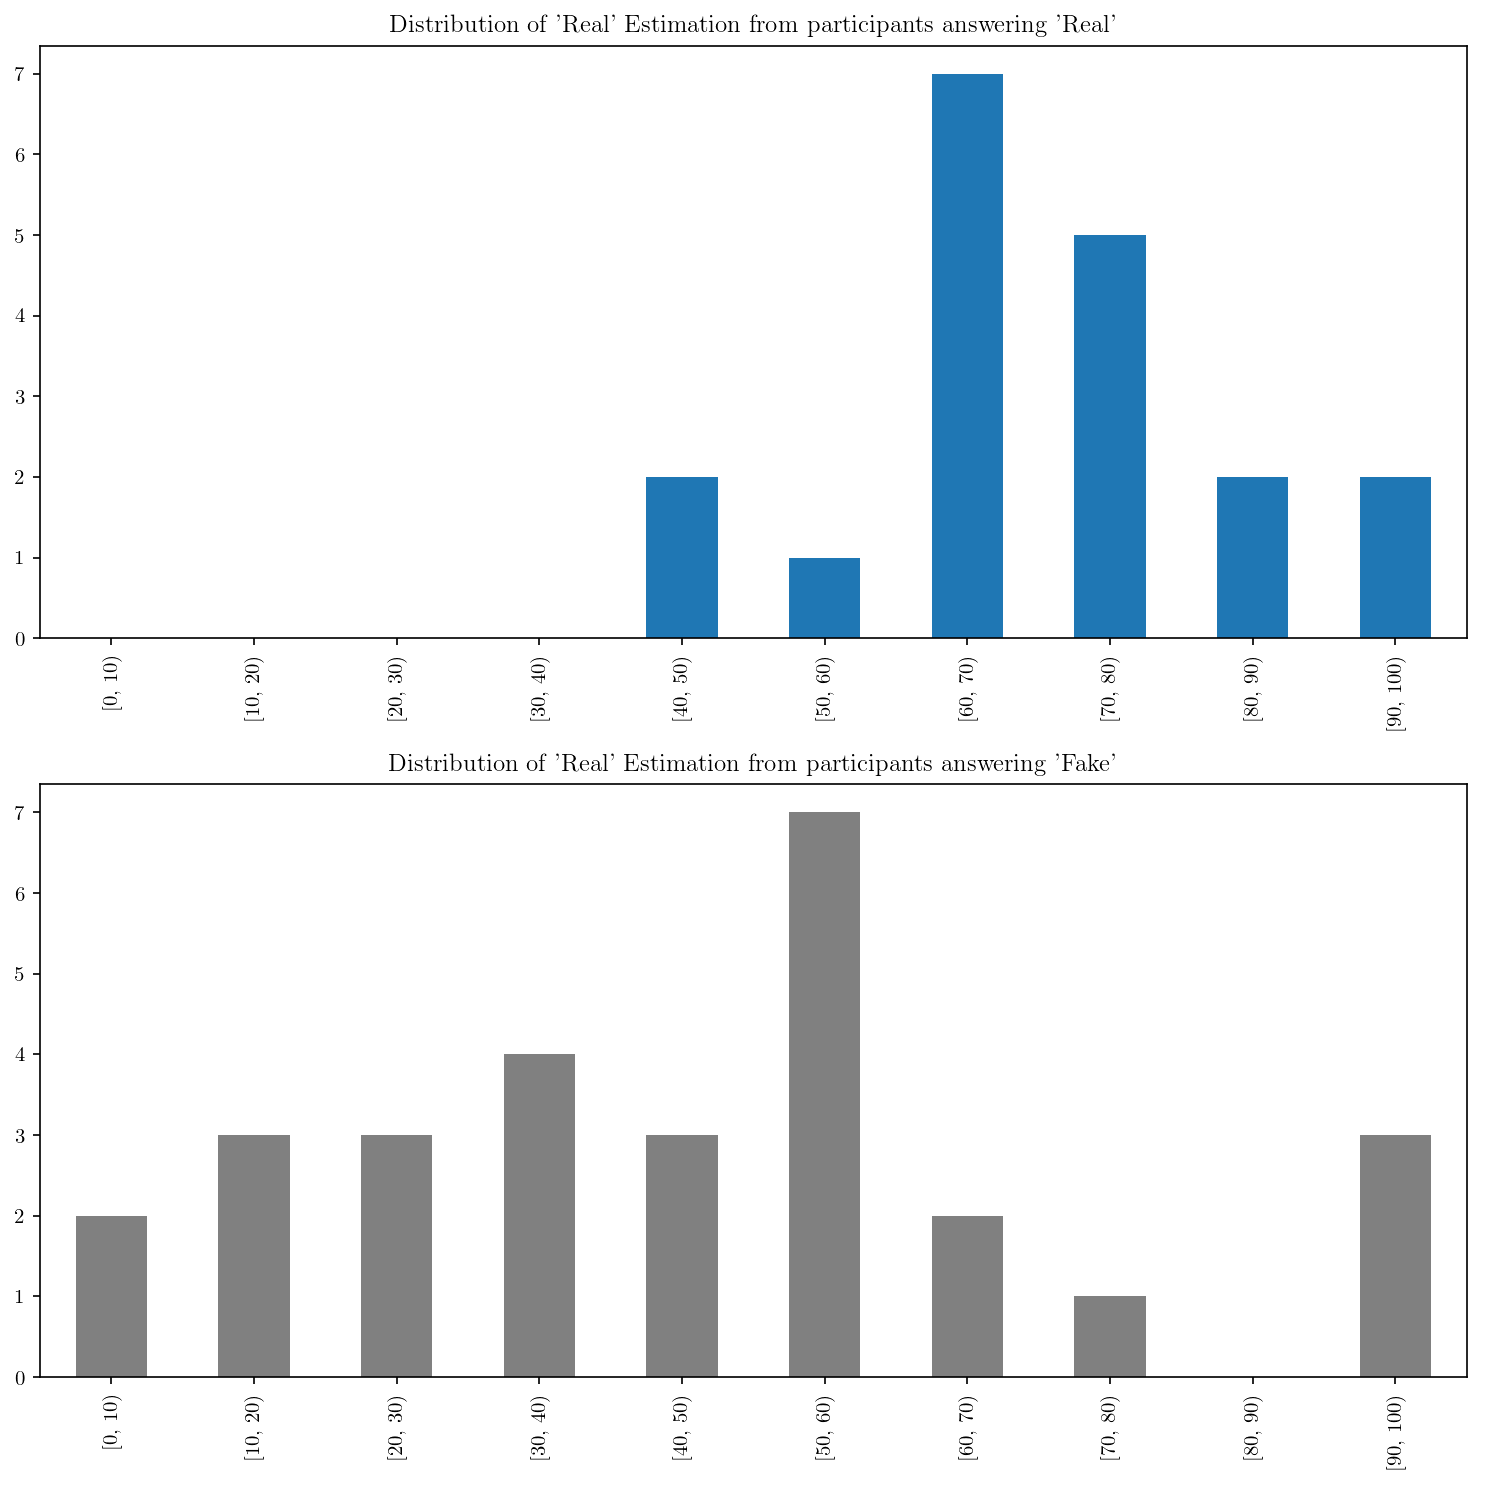

In [499]:
plot_estimation_histograms('0')

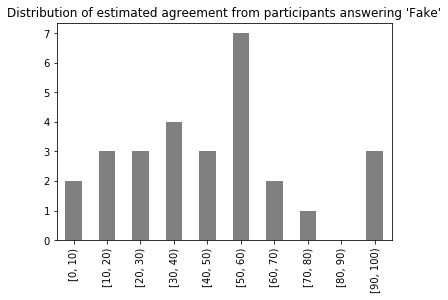

In [366]:
series = main_df_q0[lambda x: x['Answer.opinion0'] == -1]['Answer.estimAnswer0'].astype('float')
step = 10
bin_range = np.arange(0, 100+step, step)
out, bins  = pd.cut(series, bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(title="Distribution of estimated agreement from participants answering 'Fake'", color='grey')

In [110]:
# Estimated percentage that would think the news is real
estimated_p_real = main_df_q0['Answer.estimAnswer0'].astype('float').mean()
estimated_p_real

54.344897959183676

In [111]:
# Actual percentage that thought the news was real
true_p_real = 100*len(main_df_q0[lambda row: row['Answer.opinion0'] == 1])/float(len(main_df_q0))
true_p_real

38.775510204081634

In [112]:
# Estimated percentage that would think the news is false
estimated_p_fake = 100 - estimated_p_real
estimated_p_fake

45.655102040816324

In [113]:
# Actual percentage that thought the news was false
true_p_fake = 100 - true_p_real
true_p_fake

61.224489795918366

## SP Algorithm

In [458]:
def sp_answer(trial_number, verbose=False, dataframe=main_df):
    def _sp_answer(estimated_p_real, true_p_real, estimated_p_fake, true_p_fake, verbose=verbose):
        if true_p_real > estimated_p_real:
            answer = 1
            if verbose:
                print("Trial {:2s}: {:0.2f}% estimated it is real, ".format(trial_number, estimated_p_real) +
                      "but {:0.2f}% actually voted real. 'Real' is the Surprisingly Popular answer.".format(true_p_real))
        elif true_p_fake > estimated_p_fake:
            answer = -1
            if verbose:
                print("Trial {:2s}: {:0.2f}% estimated it is fake, ".format(trial_number, estimated_p_fake) +
                      "but {:0.2f}% actually voted fake. 'Fake' is the Surprisingly Popular answer.".format(true_p_fake))
        else:
            print("true_p_real:{}, estimated_p_real:{}".format(true_p_real, estimated_p_real))
            print("true_p_fake:{}, estimated_p_fake:{}".format(true_p_fake, estimated_p_fake))
            print('Unknown case!')
        return answer
    
    trial_df= dataframe[['WorkerId', 'Answer.opinion'+trial_number,
                     'Answer.confAnswer'+trial_number, 'Answer.estimAnswer'+trial_number, 
                     'Answer.orig_index'+trial_number]].dropna().copy()

    # Estimated percentage that would think the news is real
    estimated_p_real = trial_df['Answer.estimAnswer' + trial_number].astype('float').mean()
    
    # Actual percentage that thought the news was real
    true_p_real = 100*len(trial_df[lambda row: row['Answer.opinion' + trial_number] == 1])/float(len(trial_df))
    
    # Estimated percentage that would think the news is false
    estimated_p_fake = 100 - estimated_p_real
    
    # Actual percentage that thought the news was false
    true_p_fake = 100 - true_p_real
    
#     if verbose:
#         print("true_p_real:{}, estimated_p_real:{}".format(true_p_real, estimated_p_real))
#         print("true_p_fake:{}, estimated_p_fake:{}".format(true_p_fake, estimated_p_fake))
        
    return _sp_answer(estimated_p_real, true_p_real, estimated_p_fake, true_p_fake)

In [785]:
trial_num2sp = {trial_num:sp_answer(str(trial_num), verbose=True) for trial_num in range(0, 11)}

Trial 0 : 45.66% estimated it is fake, but 61.22% actually voted fake. 'Fake' is the Surprisingly Popular answer.
Trial 1 : 49.90% estimated it is real, but 54.17% actually voted real. 'Real' is the Surprisingly Popular answer.
Trial 2 : 53.56% estimated it is real, but 58.33% actually voted real. 'Real' is the Surprisingly Popular answer.
Trial 3 : 40.79% estimated it is fake, but 41.67% actually voted fake. 'Fake' is the Surprisingly Popular answer.
Trial 4 : 47.80% estimated it is fake, but 61.22% actually voted fake. 'Fake' is the Surprisingly Popular answer.
Trial 5 : 57.27% estimated it is real, but 63.27% actually voted real. 'Real' is the Surprisingly Popular answer.
Trial 6 : 44.23% estimated it is fake, but 63.27% actually voted fake. 'Fake' is the Surprisingly Popular answer.
Trial 7 : 47.68% estimated it is fake, but 65.96% actually voted fake. 'Fake' is the Surprisingly Popular answer.
Trial 8 : 61.46% estimated it is real, but 72.92% actually voted real. 'Real' is the Sur

## SP Algorithm (2nd implementation)

In [459]:
def sp_answer2(trial_number, verbose=False, dataframe=main_df):
    import time
    _df = dataframe.dropna()
    answered_yes = 100*len(_df[lambda x: x['Answer.opinion' + trial_number] == 1])/float(len(_df))
    answered_no = 100*len(_df[lambda x: x['Answer.opinion' + trial_number] == -1])/float(len(_df))
    
    estimated_yes = _df['Answer.estimAnswer'+ trial_number].astype('float').mean()
    estimated_no = 100 - estimated_yes
    
    if (answered_yes - estimated_yes) > (answered_no - estimated_no):
        answer = 1
    else:
        answer = -1
        
    if verbose:
        print("Trial {}".format(trial_number))
        print("Answered Real: {:0.2f}%".format(answered_yes))
        print("Answered Fake: {:0.2f}%".format(answered_no))
        
        print("Estimated Real: {:0.2f}%".format(estimated_yes))
        print("Estimated Fake: {:0.2f}%".format(estimated_no))
        
        print("Difference(Real): {:0.2f}%".format(answered_yes - estimated_yes))
        print("Difference(Fake): {:0.2f}%".format(answered_no - estimated_no))
        print("SP Answer is:","'Real'" if answer == 1 else "'Fake'")
        print("True answer is:", "'Real'" if trial_num2truth[int(trial_number)] == 1 else "'Fake'")
        
#         if (answer != trial_num2truth[int(trial_number)] ):
#             plot_estimation_histograms(trial_number)
# #             time.sleep(3 )
#         print("\n")
        
    return answer

In [384]:
trial_num2sp_2 = {trial_num:sp_answer2(str(trial_num), verbose=True) for trial_num in range(0, 11)}

Trial 0
Answered Real: 38.30%
Answered Fake: 61.70%
Estimated Real: 53.89%
Estimated Fake: 46.11%
Difference(Real): -15.60%
Difference(Fake): 15.60%
SP Answer is: 'Fake'
True answer is: 'Real'
Trial 1
Answered Real: 53.19%
Answered Fake: 46.81%
Estimated Real: 49.89%
Estimated Fake: 50.11%
Difference(Real): 3.30%
Difference(Fake): -3.30%
SP Answer is: 'Real'
True answer is: 'Fake'
Trial 2
Answered Real: 59.57%
Answered Fake: 40.43%
Estimated Real: 53.64%
Estimated Fake: 46.36%
Difference(Real): 5.94%
Difference(Fake): -5.94%
SP Answer is: 'Real'
True answer is: 'Real'
Trial 3
Answered Real: 57.45%
Answered Fake: 42.55%
Estimated Real: 59.40%
Estimated Fake: 40.60%
Difference(Real): -1.96%
Difference(Fake): 1.96%
SP Answer is: 'Fake'
True answer is: 'Real'
Trial 4
Answered Real: 38.30%
Answered Fake: 61.70%
Estimated Real: 53.15%
Estimated Fake: 46.85%
Difference(Real): -14.85%
Difference(Fake): 14.85%
SP Answer is: 'Fake'
True answer is: 'Fake'
Trial 5
Answered Real: 61.70%
Answered Fa

In [352]:
trial_num2sp

{0: -1, 1: 1, 2: 1, 3: -1, 4: -1, 5: 1, 6: -1, 7: -1, 8: 1, 9: -1, 10: 1}

In [353]:
trial_num2sp_2

{0: -1, 1: 1, 2: 1, 3: -1, 4: -1, 5: 1, 6: -1, 7: -1, 8: 1, 9: -1, 10: 1}

In [160]:
trial_num2truth

{0: 1, 1: -1, 2: 1, 3: 1, 4: -1, 5: -1, 6: -1, 7: -1, 8: -1, 9: -1, 10: 1}

# Results

In [791]:
results_df = pd.DataFrame({'truth': trial_num2truth, 
                           'SP': trial_num2sp, 
                           'MV': trial_num2mv,
                           'CWMV' : trial_num2cwmv})

In [792]:
results_df

,CWMV,MV,SP,truth
0,-1,-1,-1,1
1,1,1,1,-1
2,1,1,1,1
3,1,1,-1,1
4,-1,-1,-1,-1
5,1,1,1,-1
6,-1,-1,-1,-1
7,-1,-1,-1,-1
8,1,1,1,-1
9,-1,-1,-1,-1


In [793]:
print("Surprisingly Popular: {:0.2f}%".format(100.0 * len(results_df[lambda x: x.SP == x.truth])/len(results_df)))

print("Majority Vote: {:0.2f}%".format(100.0 * len(results_df[lambda x: x.MV == x.truth])/len(results_df)))

print("Confidence-Weighted Majority Vote: {:0.2f}%".format(100.0 * len(results_df[lambda x: x.CWMV == x.truth])/len(results_df)))

Surprisingly Popular: 54.55%
Majority Vote: 63.64%
Confidence-Weighted Majority Vote: 63.64%


# Cohen's Kappa

In [794]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
cohens_df = pd.DataFrame([{"Cohen's Kappa": m, 'value': cohen_kappa_score(results_df[m], results_df['truth'])} 
                          for m in ['SP', 'MV', 'CWMV']])

sns.barplot(x="Cohen's Kappa", y='value',  data=cohens_df, ci=68)

In [795]:
cohen_kappa_score(results_df['SP'], results_df['truth'])

0.067796610169491456

In [796]:
cohen_kappa_score(results_df['MV'], results_df['truth'])

0.29032258064516137

In [797]:
cohen_kappa_score(results_df['CWMV'], results_df['truth'])

0.29032258064516137

# Why Surprisingly Popular doesn't work?

## Trial 0

In [403]:
sp_answer2('0', verbose=True)

Trial 0
Answered Real: 38.30%
Answered Fake: 61.70%
Estimated Real: 53.89%
Estimated Fake: 46.11%
Difference(Real): -15.60%
Difference(Fake): 15.60%
SP Answer is: 'Fake'
True answer is: 'Real'


-1

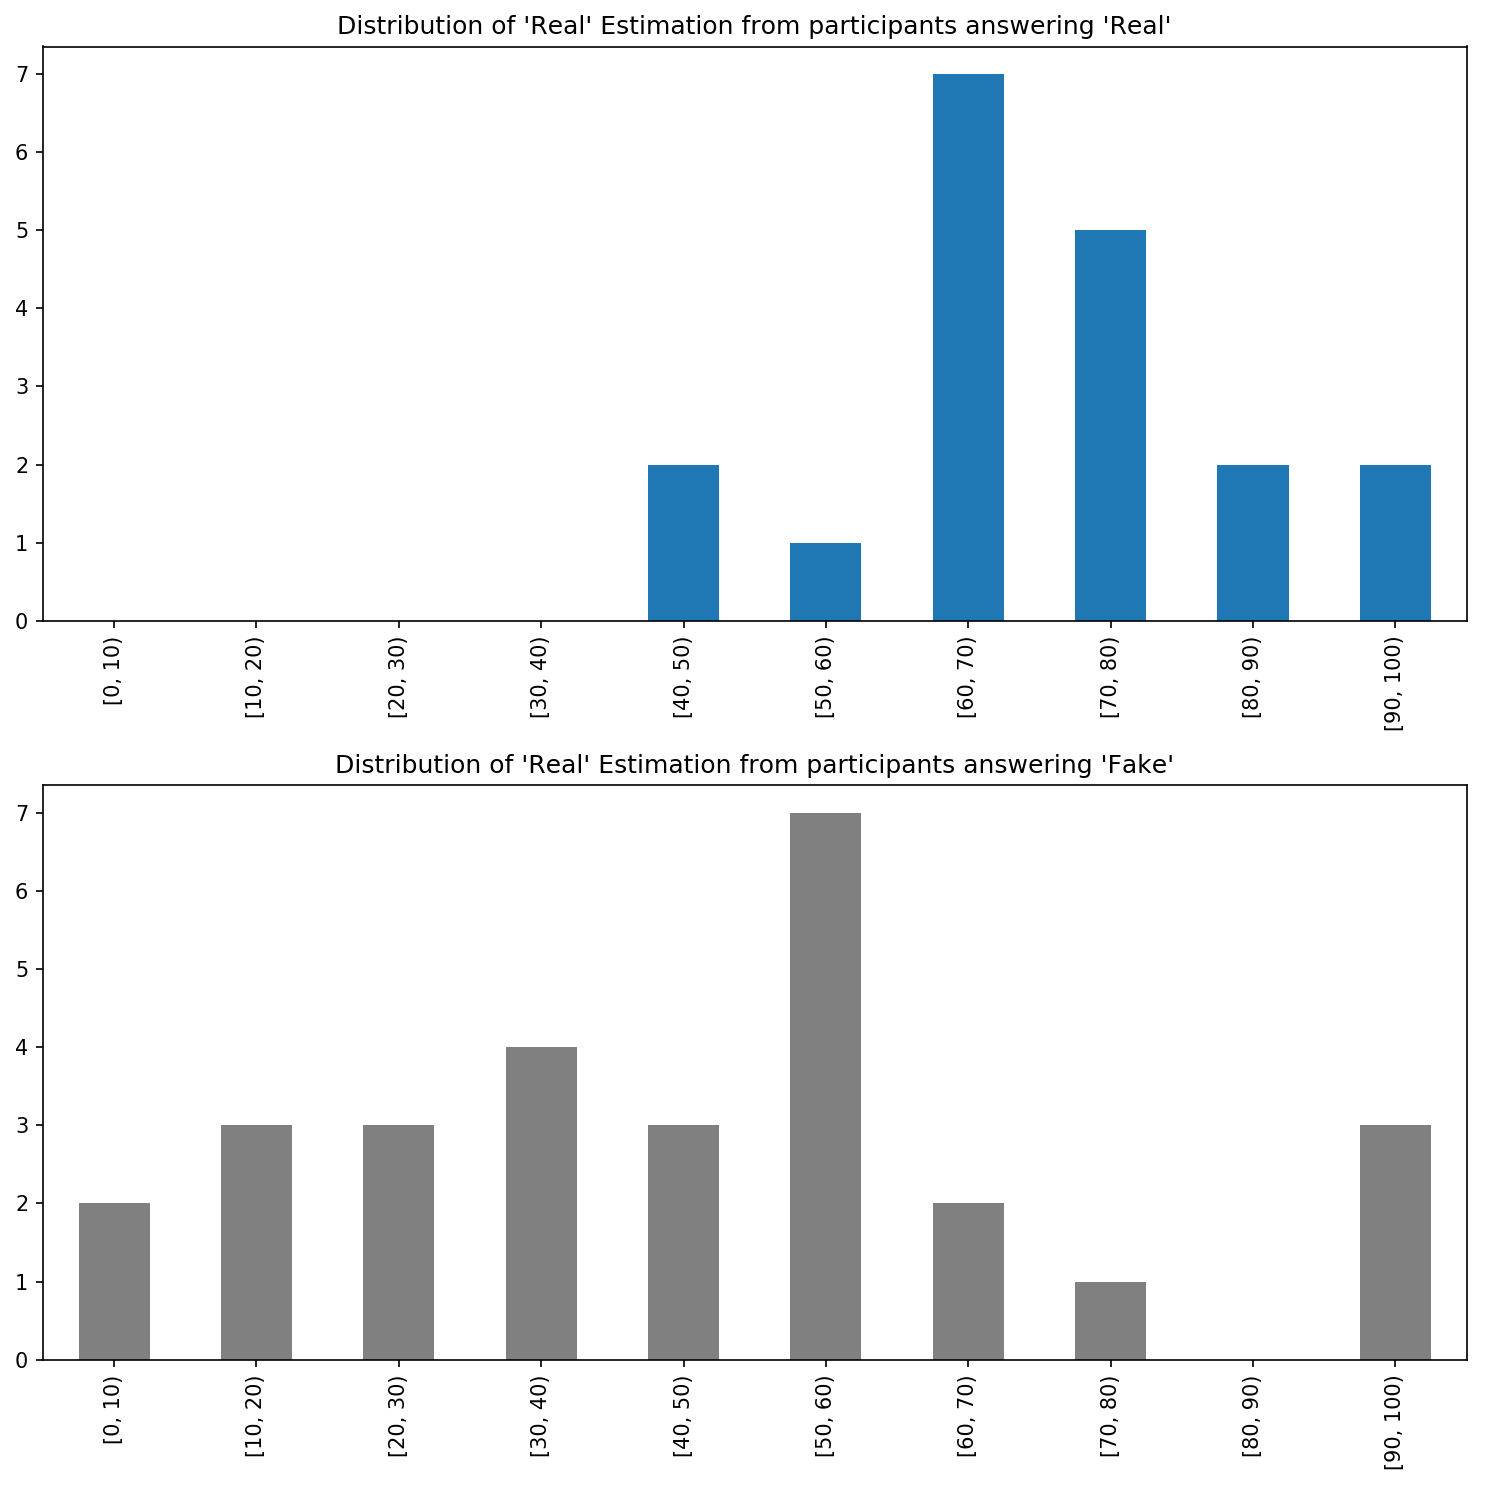

In [404]:
plot_estimation_histograms('0')

## Trial 1

In [405]:
sp_answer2('1', verbose=True)

Trial 1
Answered Real: 53.19%
Answered Fake: 46.81%
Estimated Real: 49.89%
Estimated Fake: 50.11%
Difference(Real): 3.30%
Difference(Fake): -3.30%
SP Answer is: 'Real'
True answer is: 'Fake'


1

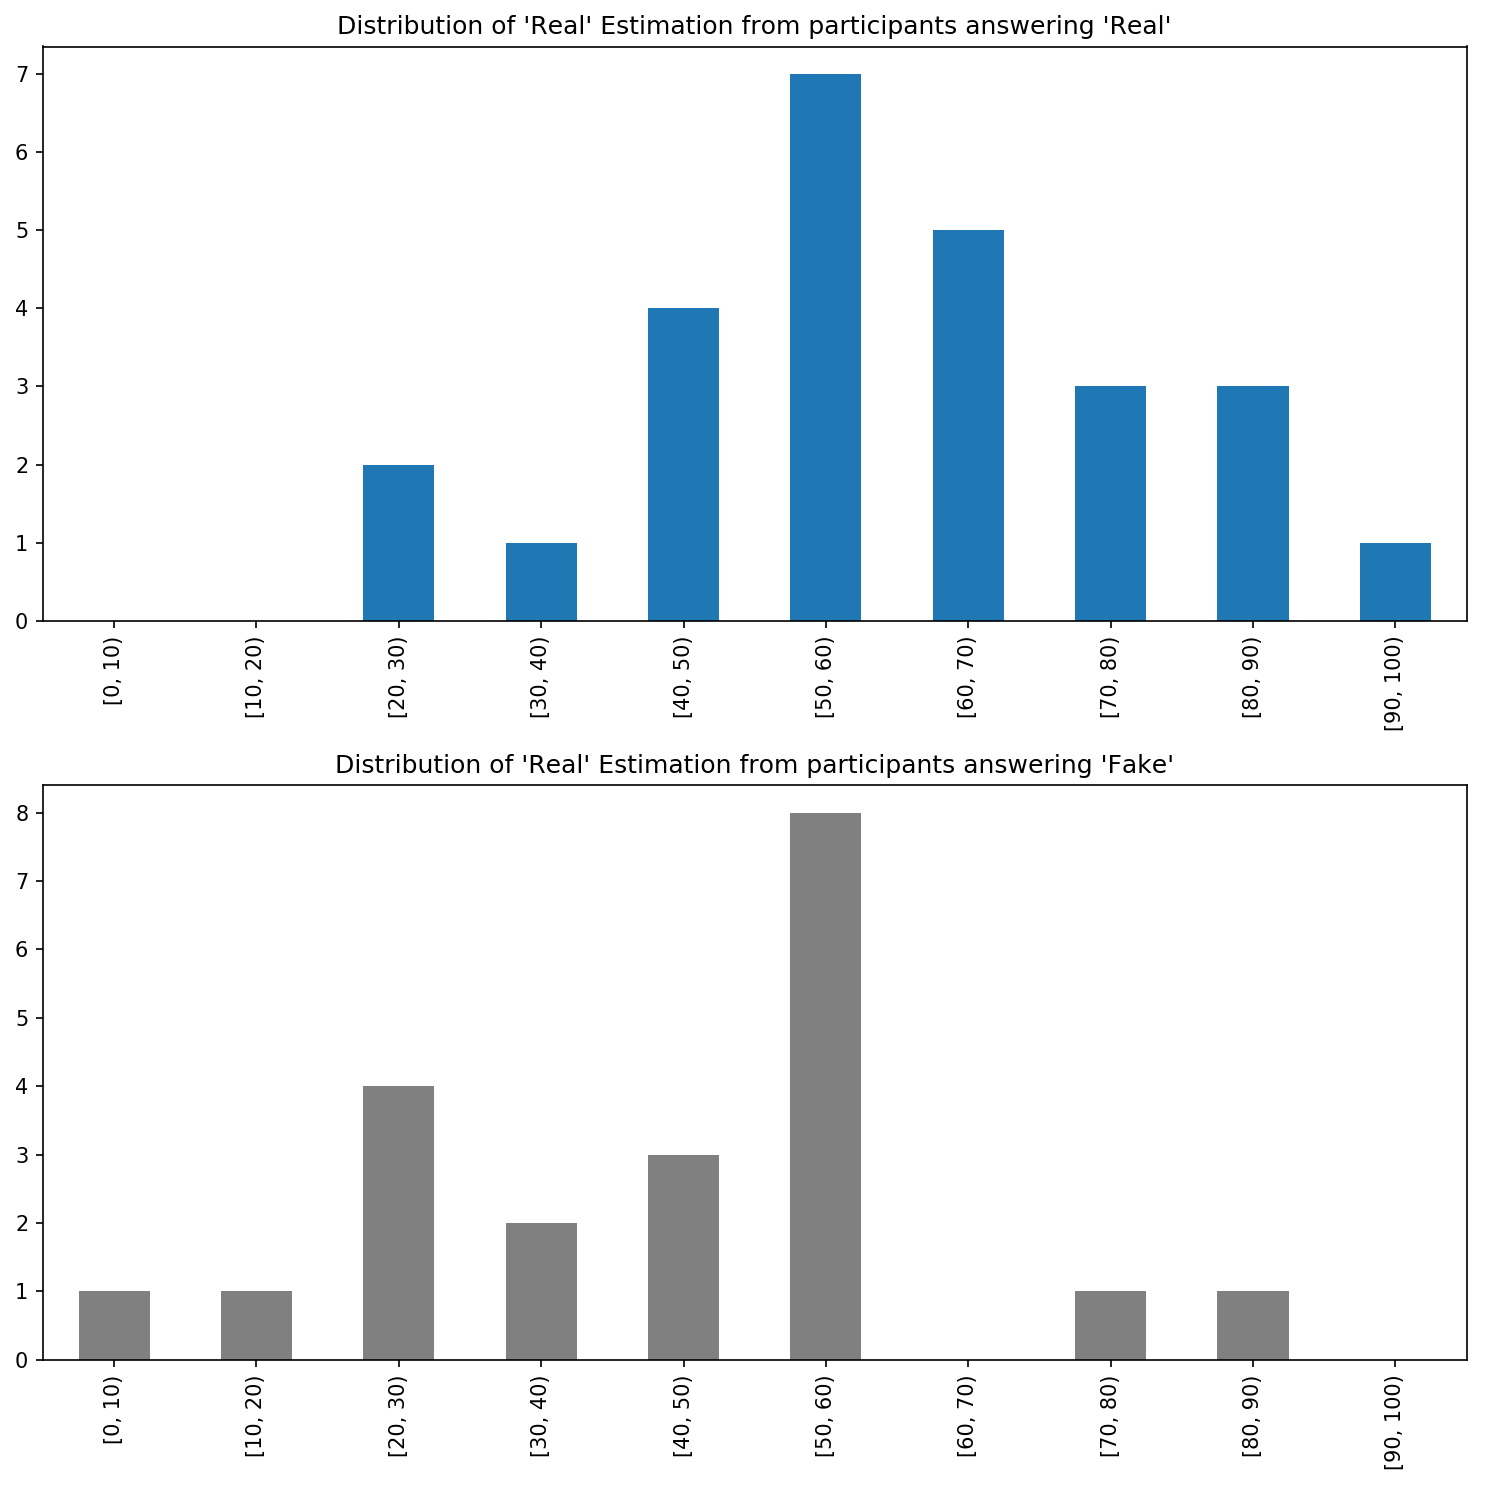

In [406]:
plot_estimation_histograms('1')

## Trial 3

In [407]:
sp_answer2('3', verbose=True)

Trial 3
Answered Real: 57.45%
Answered Fake: 42.55%
Estimated Real: 59.40%
Estimated Fake: 40.60%
Difference(Real): -1.96%
Difference(Fake): 1.96%
SP Answer is: 'Fake'
True answer is: 'Real'


-1

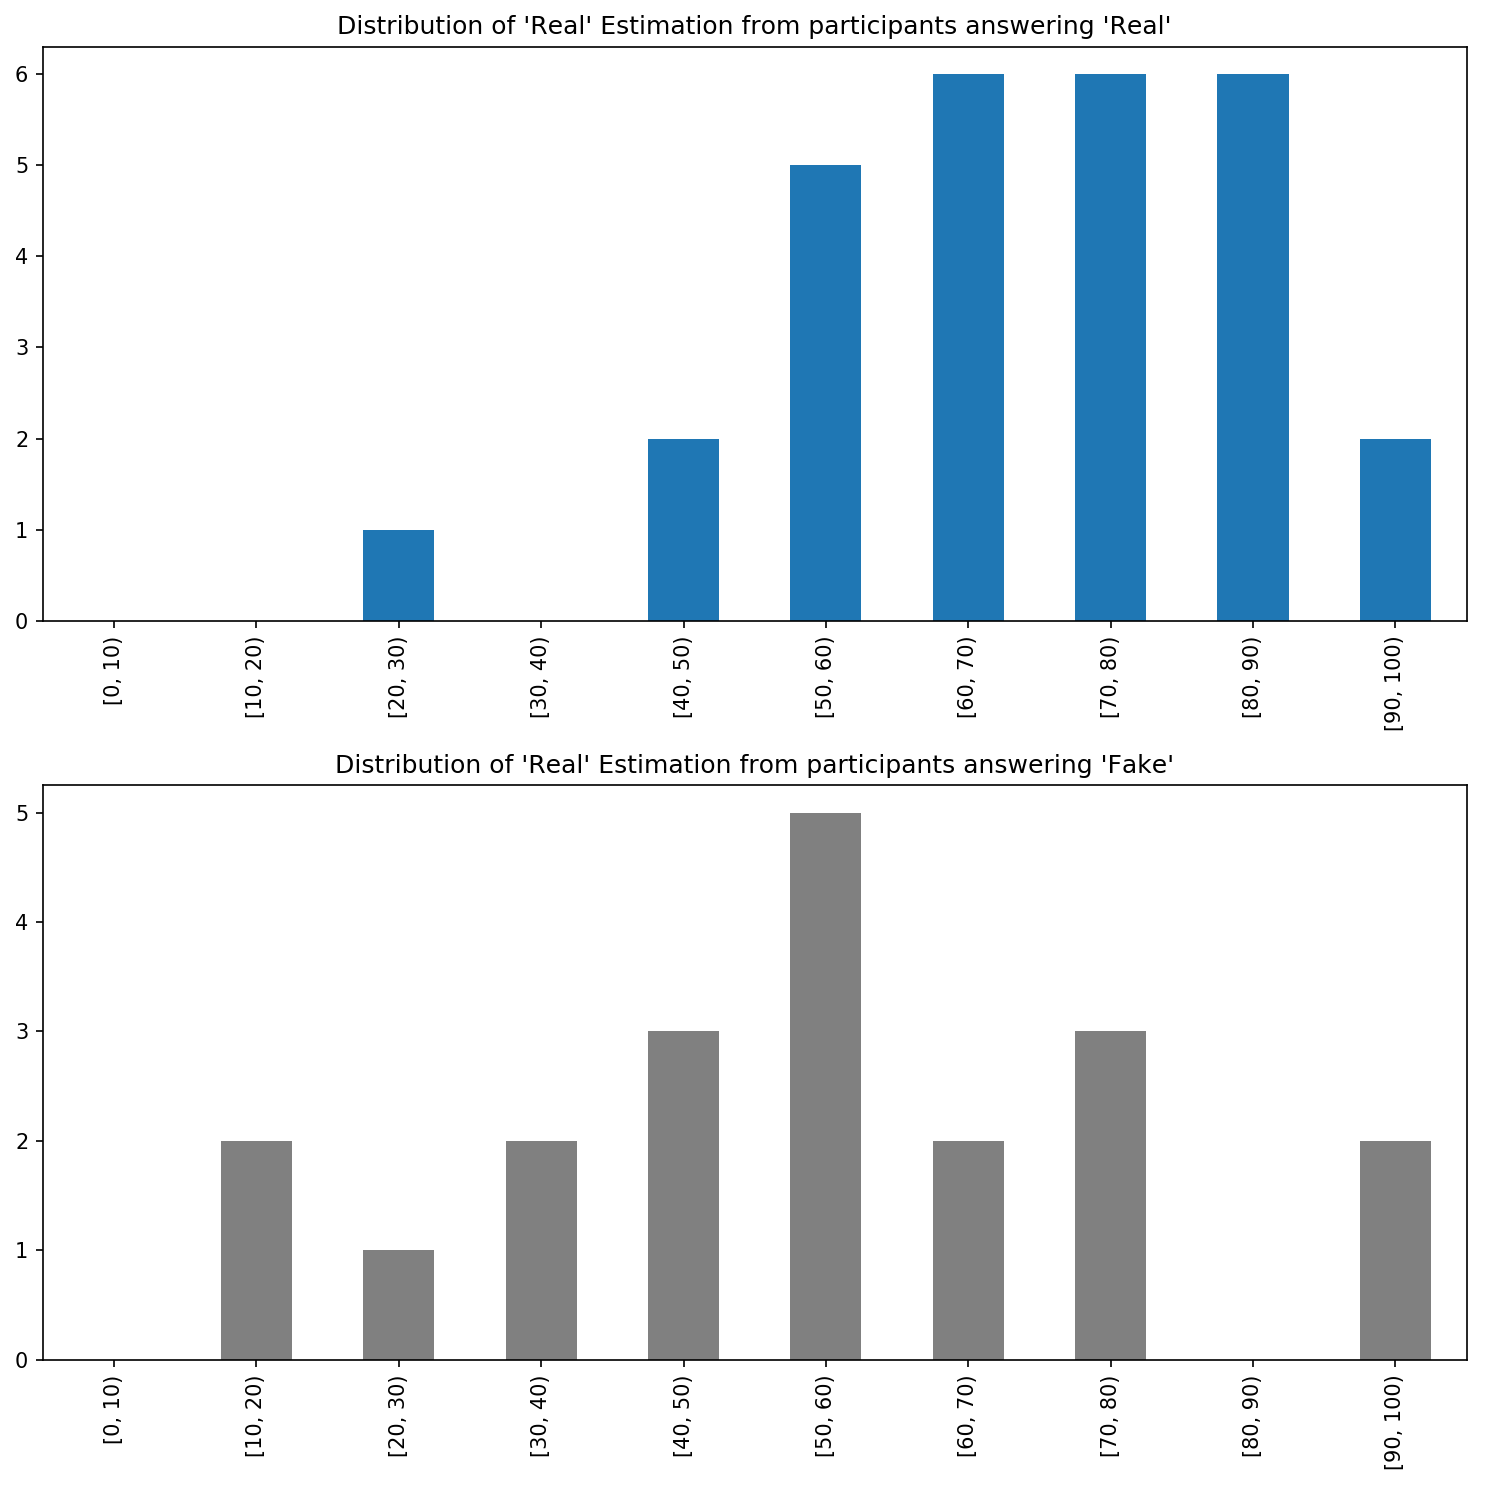

In [408]:
plot_estimation_histograms('3')

## Trial 5

In [409]:
sp_answer2('5', verbose=True)

Trial 5
Answered Real: 61.70%
Answered Fake: 38.30%
Estimated Real: 57.26%
Estimated Fake: 42.74%
Difference(Real): 4.45%
Difference(Fake): -4.45%
SP Answer is: 'Real'
True answer is: 'Fake'


1

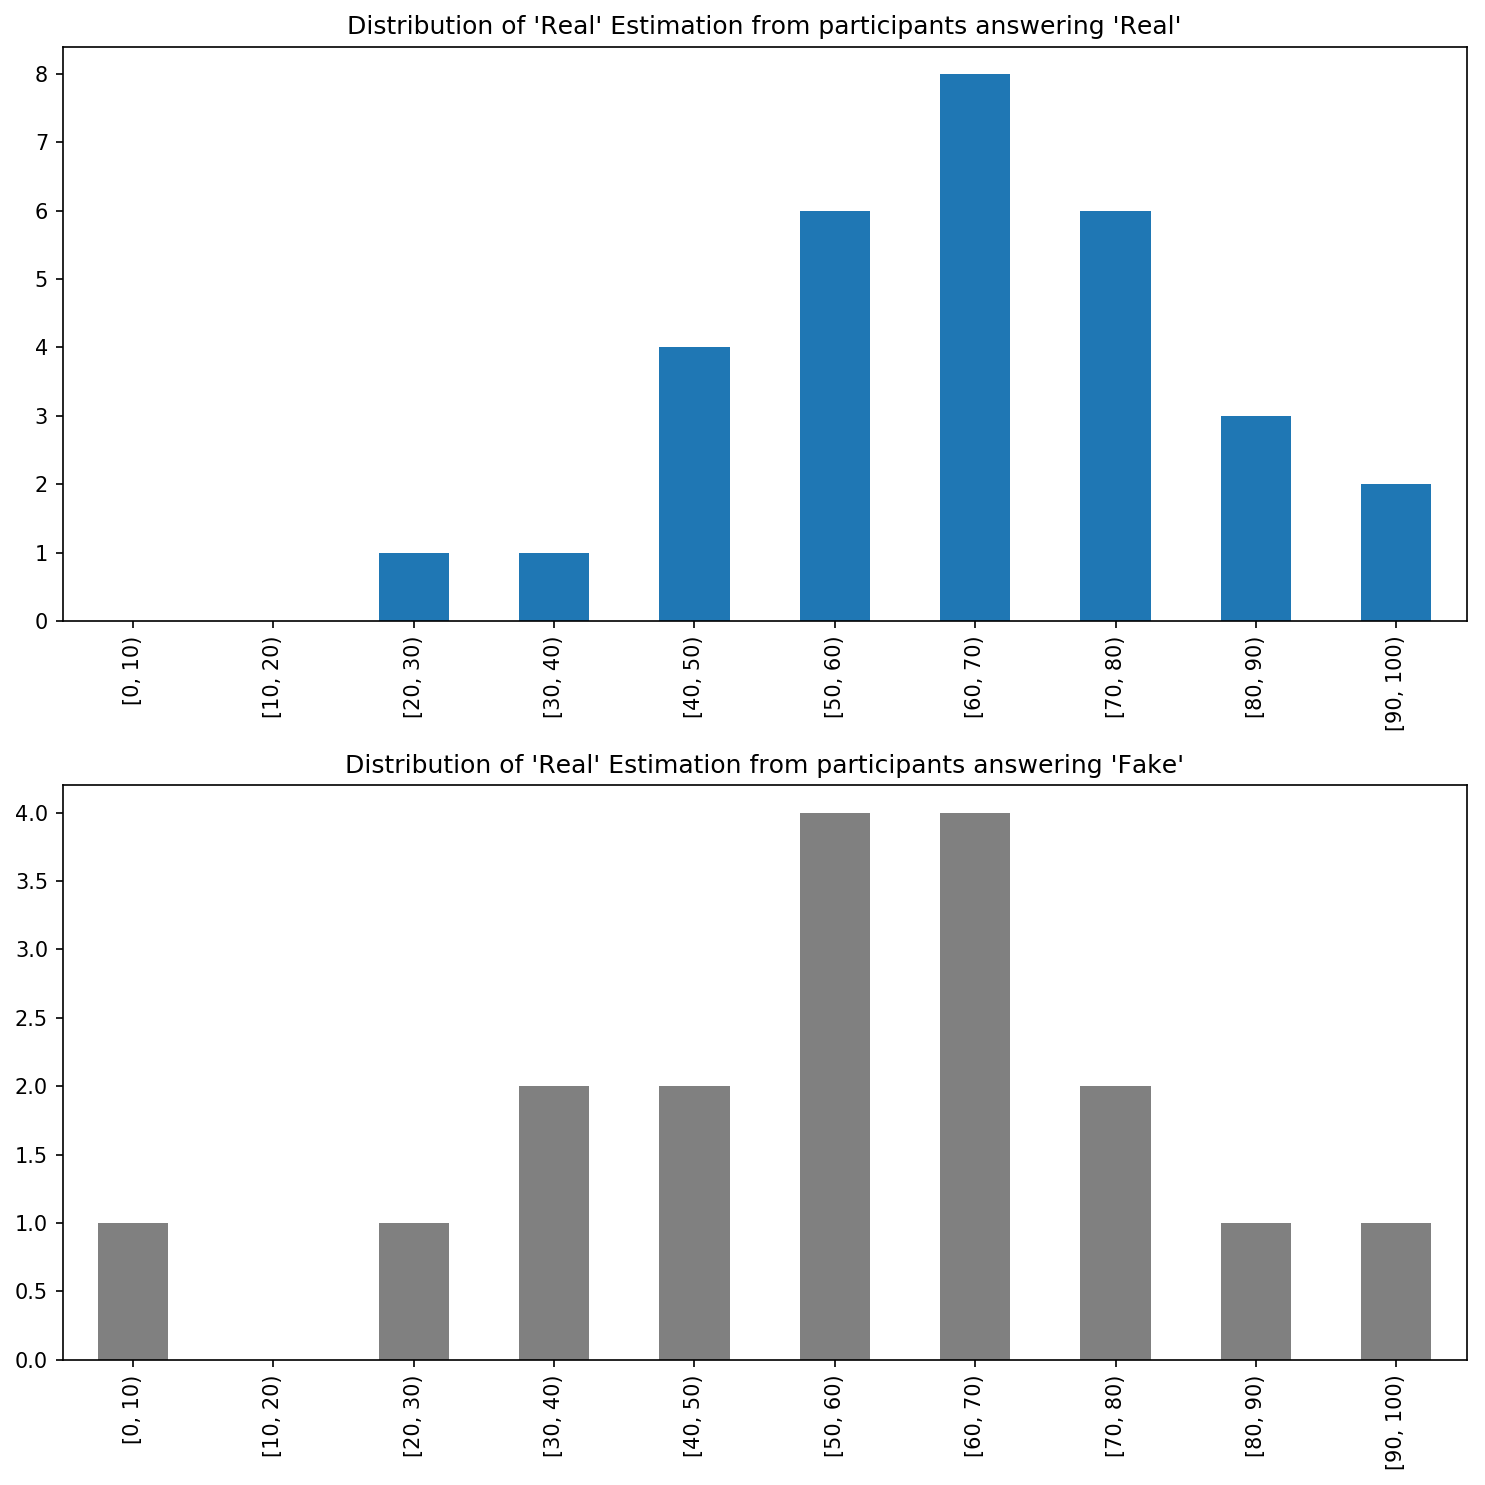

In [410]:
plot_estimation_histograms('5')

## Trial 8

In [411]:
sp_answer2('8', verbose=True)

Trial 8
Answered Real: 72.34%
Answered Fake: 27.66%
Estimated Real: 61.38%
Estimated Fake: 38.62%
Difference(Real): 10.96%
Difference(Fake): -10.96%
SP Answer is: 'Real'
True answer is: 'Fake'


1

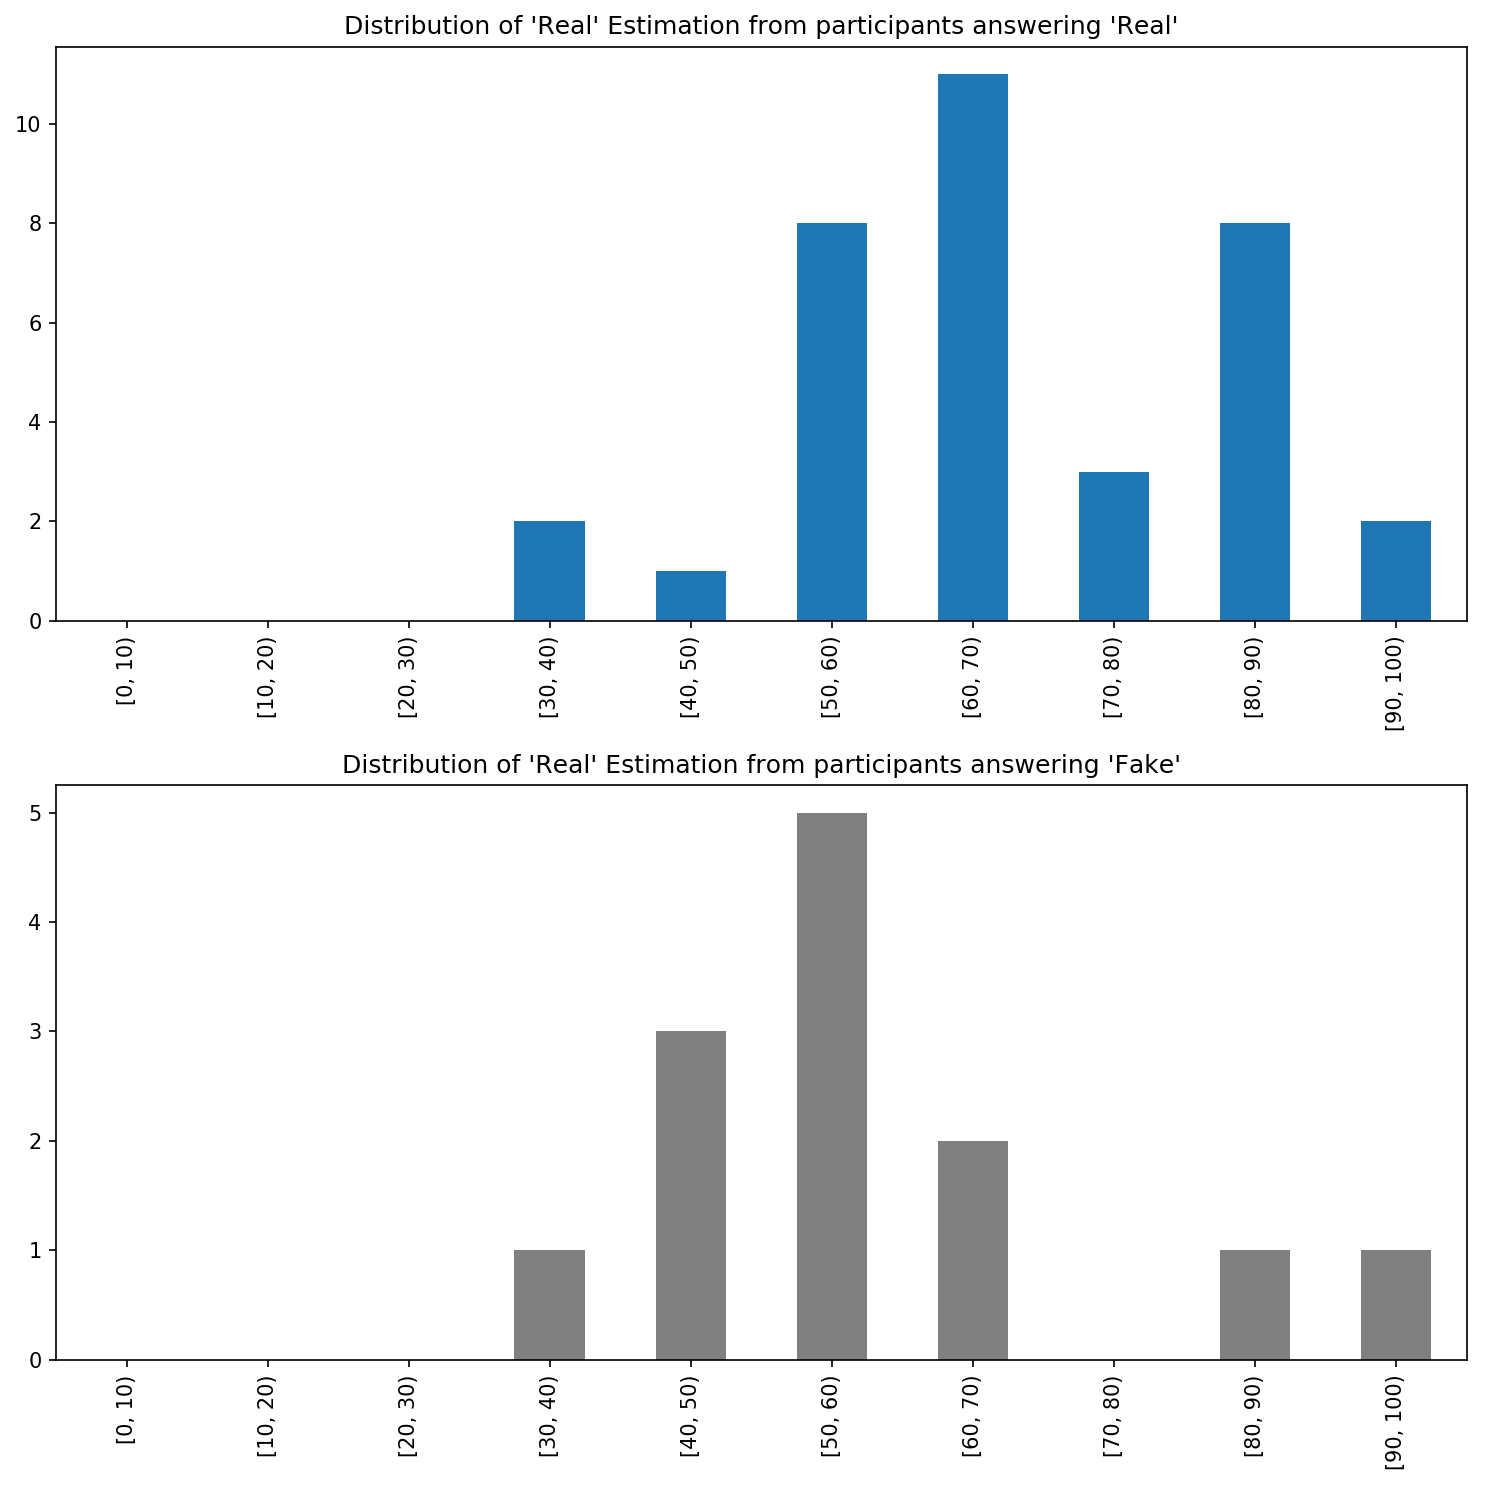

In [412]:
plot_estimation_histograms('8')

## When DOES SP work?

In [414]:
sp_answer2('4', verbose=True)

Trial 4
Answered Real: 38.30%
Answered Fake: 61.70%
Estimated Real: 53.15%
Estimated Fake: 46.85%
Difference(Real): -14.85%
Difference(Fake): 14.85%
SP Answer is: 'Fake'
True answer is: 'Fake'


-1

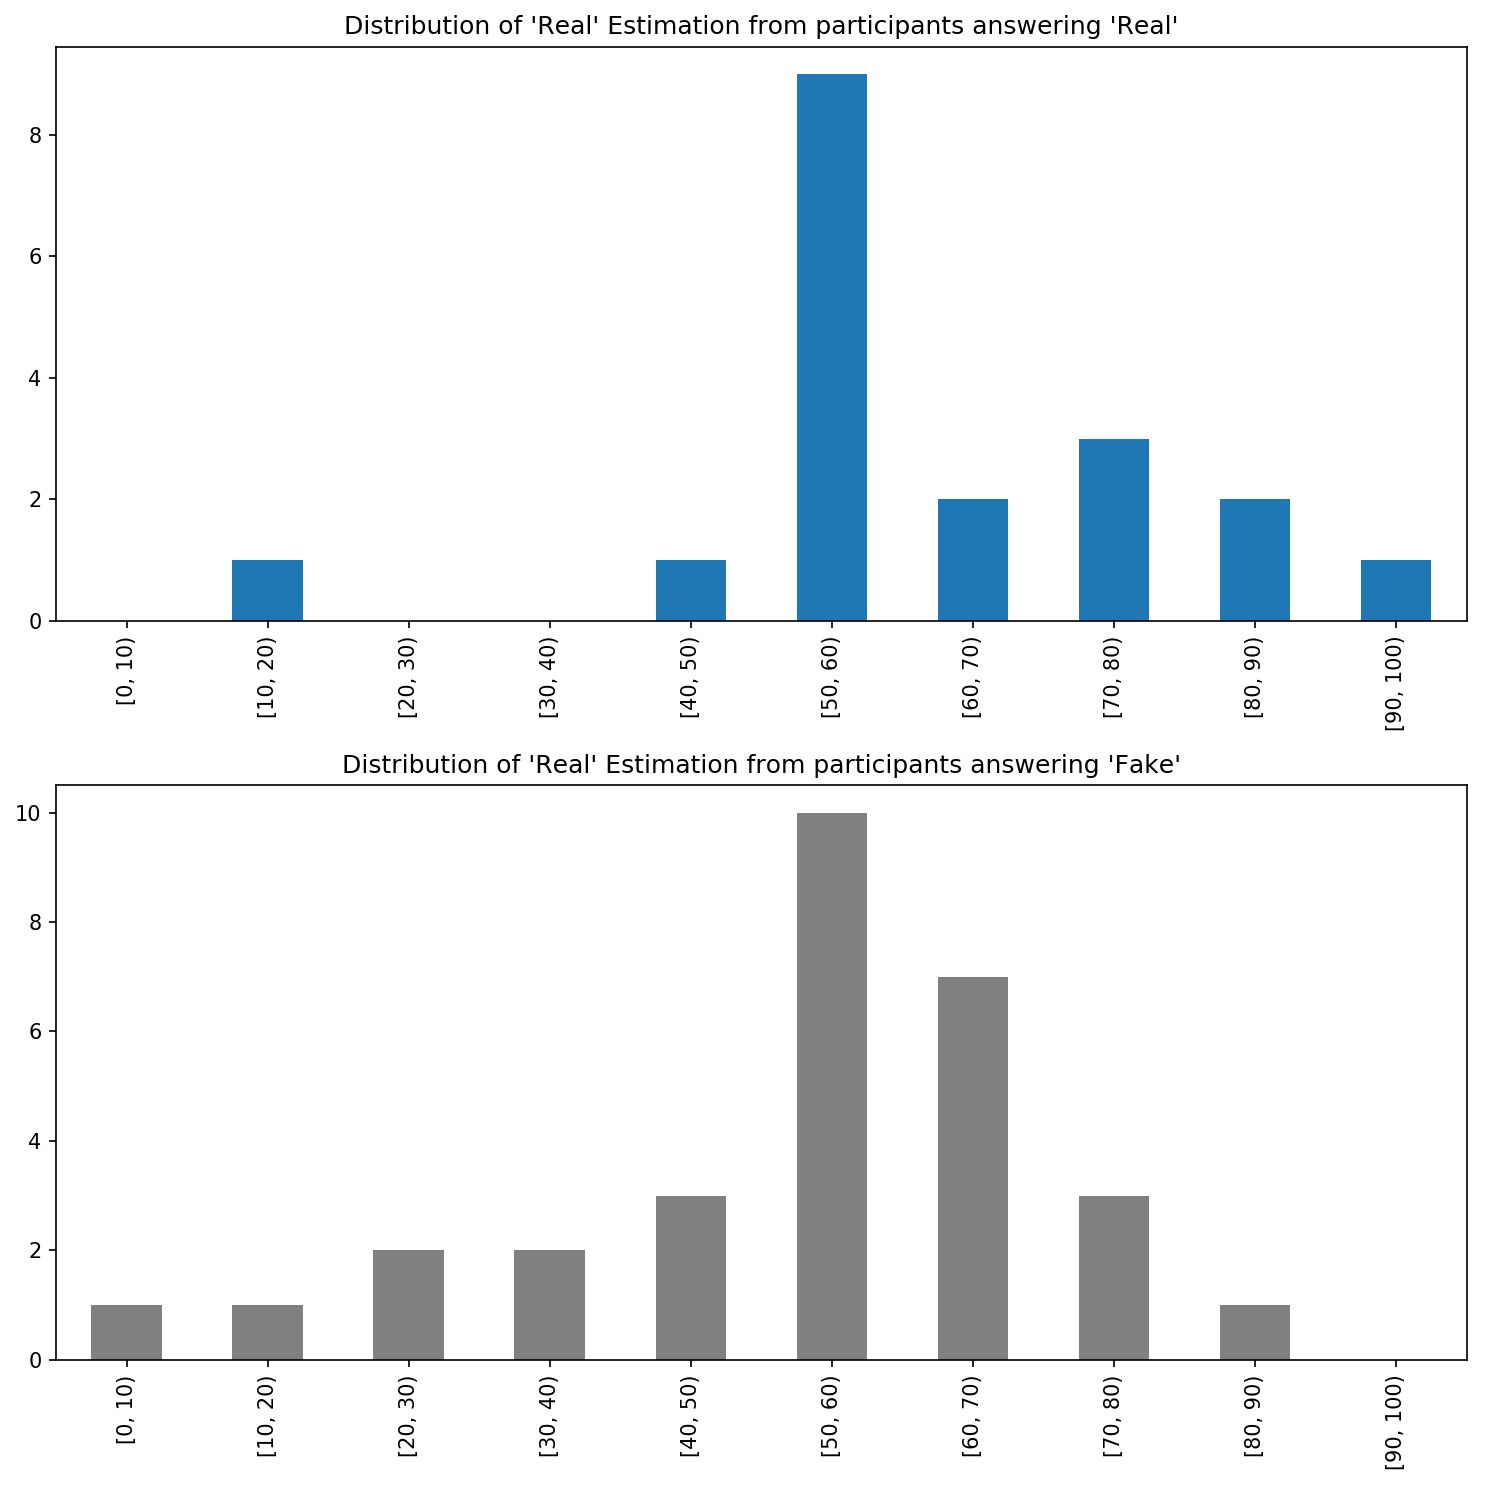

In [415]:
plot_estimation_histograms('4')

# Diagnostics

## Using Best Responders

In [820]:
best_responders_df = main_df[lambda x: x.accuracy > 0.5]

In [821]:
best_responders_df

,WorkerId,Answer.confAnswer0,Answer.confAnswer1,Answer.confAnswer10,Answer.confAnswer2,Answer.confAnswer3,Answer.confAnswer4,Answer.confAnswer5,Answer.confAnswer6,Answer.confAnswer7,...,Answer.validationTime10,Answer.validationTime2,Answer.validationTime3,Answer.validationTime4,Answer.validationTime5,Answer.validationTime6,Answer.validationTime7,Answer.validationTime8,Answer.validationTime9,accuracy
0,A39GADIK8RLMVC,90,85,90,80,90,80,70,80,70,...,1529433206875,1529433648376,1529433372386,1529433226711,1529433444133,1529433583991,1529433594575,1529433502083,1529433573412,0.545455
2,A1H72Y9Z5NJXDS,90,100,90,90,100,65,80,90,90,...,1529454007294,1529453640986,1529453896047,1529453407625,1529453697399,1529453520170,1529453429323,1529453766718,1529453824014,0.727273
3,A1U6A617Q95MTZ,70,50,75,80,50,70,99,95,70,...,1529437972333,1529438248896,1529438715203,1529438576881,1529438797780,1529438748132,1529437993261,1529438414180,1529438155110,0.818182
5,AVJUIF9QHQRY8,60,70,50,60,50,65,50,70,60,...,1529434722268,1529434633307,1529430902004,1529431253050,1529434338439,1529430733400,1529434861411,1529432727827,1529434490440,0.818182
7,A2FL477TMKC91L,75,90,90,90,75,100,80,70,80,...,1529430086914,1529430137081,1529430424218,1529430575987,1529430719180,1529430192290,1529430557913,1529430259296,1529430314320,0.545455
8,AKZ8SFOAI4RZN,80,55,60,75,75,70,70,68,60,...,1529431574194,1529431263143,1529431846655,1529431070559,1529431642430,1529431894271,1529431445775,1529430987776,1529431358695,0.727273
9,A36SM7QM8OK3H6,99,50,95,90,50,90,50,80,66,...,1529449750752,1529449720839,1529449848481,1529450182354,1529449699945,1529450108315,1529450090818,1529449950779,1529449636598,0.727273
11,A2SENAPNSXG9L,60,50,50,70,65,65,70,50,70,...,1529438024902,1529438086112,1529437577407,1529437761022,1529437778752,1529438055202,1529437736806,1529437981613,1529437678036,0.636364
14,A34UER5ZQ5APMB,100,85,50,55,75,66,50,60,50,...,1529431382837,1529431037782,1529431124944,1529431556038,1529430983574,1529430906515,1529431447128,1529431633661,1529431258025,0.818182
15,A3VAAV7ZCSO7NA,100,90,75,60,60,50,50,60,75,...,1529431656930,1529431827410,1529431301098,1529432023383,1529431018843,1529431967229,1529431125479,1529431594919,1529430868780,0.636364


### Surprisingly Popular 

In [822]:
trial_num2sp_br = {trial_num:sp_answer(str(trial_num), verbose=True, dataframe=best_responders_df) for trial_num in range(0, 11)}

Trial 0 : 49.17% estimated it is fake, but 58.33% actually voted fake. 'Fake' is the Surprisingly Popular answer.
Trial 1 : 45.21% estimated it is real, but 45.83% actually voted real. 'Real' is the Surprisingly Popular answer.
Trial 2 : 56.29% estimated it is real, but 79.17% actually voted real. 'Real' is the Surprisingly Popular answer.
Trial 3 : 61.33% estimated it is real, but 75.00% actually voted real. 'Real' is the Surprisingly Popular answer.
Trial 4 : 49.79% estimated it is fake, but 83.33% actually voted fake. 'Fake' is the Surprisingly Popular answer.
Trial 5 : 49.83% estimated it is real, but 54.17% actually voted real. 'Real' is the Surprisingly Popular answer.
Trial 6 : 49.46% estimated it is fake, but 83.33% actually voted fake. 'Fake' is the Surprisingly Popular answer.
Trial 7 : 48.62% estimated it is fake, but 87.50% actually voted fake. 'Fake' is the Surprisingly Popular answer.
Trial 8 : 59.38% estimated it is real, but 66.67% actually voted real. 'Real' is the Sur

In [823]:
_ = {trial_num:sp_answer2(str(trial_num), verbose=True, dataframe=best_responders_df) for trial_num in range(0, 11)}

Trial 0
Answered Real: 41.67%
Answered Fake: 58.33%
Estimated Real: 50.83%
Estimated Fake: 49.17%
Difference(Real): -9.17%
Difference(Fake): 9.17%
SP Answer is: 'Fake'
True answer is: 'Real'
Trial 1
Answered Real: 45.83%
Answered Fake: 54.17%
Estimated Real: 45.21%
Estimated Fake: 54.79%
Difference(Real): 0.62%
Difference(Fake): -0.62%
SP Answer is: 'Real'
True answer is: 'Fake'
Trial 2
Answered Real: 79.17%
Answered Fake: 20.83%
Estimated Real: 56.29%
Estimated Fake: 43.71%
Difference(Real): 22.88%
Difference(Fake): -22.88%
SP Answer is: 'Real'
True answer is: 'Real'
Trial 3
Answered Real: 75.00%
Answered Fake: 25.00%
Estimated Real: 61.33%
Estimated Fake: 38.67%
Difference(Real): 13.67%
Difference(Fake): -13.67%
SP Answer is: 'Real'
True answer is: 'Real'
Trial 4
Answered Real: 16.67%
Answered Fake: 83.33%
Estimated Real: 50.21%
Estimated Fake: 49.79%
Difference(Real): -33.54%
Difference(Fake): 33.54%
SP Answer is: 'Fake'
True answer is: 'Fake'
Trial 5
Answered Real: 54.17%
Answered 

### Majority Vote

In [824]:
trial_num2mv_br = {trial_num:majority_answer(str(trial_num), verbose=True, dataframe=best_responders_df) for trial_num in range(0, 11)}

Trial 0 : 41.67% voted real, and 58.33% voted fake. 'Fake' is the Majority Vote answer.
Trial 1 : 45.83% voted real, and 54.17% voted fake. 'Fake' is the Majority Vote answer.
Trial 2 : 79.17% voted real, and 20.83% voted fake. 'Real' is the Majority Vote answer.
Trial 3 : 75.00% voted real, and 25.00% voted fake. 'Real' is the Majority Vote answer.
Trial 4 : 16.67% voted real, and 83.33% voted fake. 'Fake' is the Majority Vote answer.
Trial 5 : 54.17% voted real, and 45.83% voted fake. 'Real' is the Majority Vote answer.
Trial 6 : 16.67% voted real, and 83.33% voted fake. 'Fake' is the Majority Vote answer.
Trial 7 : 12.50% voted real, and 87.50% voted fake. 'Fake' is the Majority Vote answer.
Trial 8 : 66.67% voted real, and 33.33% voted fake. 'Real' is the Majority Vote answer.
Trial 9 : 25.00% voted real, and 75.00% voted fake. 'Fake' is the Majority Vote answer.
Trial 10: 75.00% voted real, and 25.00% voted fake. 'Real' is the Majority Vote answer.


### Confidence-Weighted Majority Vote (CWMV)

In [825]:
trial_num2cwmv_br = {trial_num:weighted_majority_vote_answer(str(trial_num), verbose=True, dataframe=best_responders_df) for trial_num in range(0, 11)}

Trial 0 : Confidence-Weighted Majority Vote is -0.12 on a scale of [-1, 1]. 'Fake' is the CWMV answer.
Trial 1 : Confidence-Weighted Majority Vote is -0.10 on a scale of [-1, 1]. 'Fake' is the CWMV answer.
Trial 2 : Confidence-Weighted Majority Vote is 0.46 on a scale of [-1, 1]. 'Real' is the CWMV answer.
Trial 3 : Confidence-Weighted Majority Vote is 0.40 on a scale of [-1, 1]. 'Real' is the CWMV answer.
Trial 4 : Confidence-Weighted Majority Vote is -0.51 on a scale of [-1, 1]. 'Fake' is the CWMV answer.
Trial 5 : Confidence-Weighted Majority Vote is 0.01 on a scale of [-1, 1]. 'Real' is the CWMV answer.
Trial 6 : Confidence-Weighted Majority Vote is -0.49 on a scale of [-1, 1]. 'Fake' is the CWMV answer.
Trial 7 : Confidence-Weighted Majority Vote is -0.54 on a scale of [-1, 1]. 'Fake' is the CWMV answer.
Trial 8 : Confidence-Weighted Majority Vote is 0.27 on a scale of [-1, 1]. 'Real' is the CWMV answer.
Trial 9 : Confidence-Weighted Majority Vote is -0.35 on a scale of [-1, 1]. '

In [826]:
def voting_schemes_df(dataframe, print_out=None):
    if print_out == 'all':
        verbose = True
    elif print_out == 'basic':
        verbose = False
    else:
        verbose = False
        
    trial_num2mv = {trial_num:majority_answer(str(trial_num), verbose=verbose, dataframe=dataframe) for trial_num in range(0, 11)}
    print("\n")
    trial_num2sp = {trial_num:sp_answer(str(trial_num), verbose=verbose, dataframe=dataframe) for trial_num in range(0, 11)}
    print("\n")
    trial_num2cwmv = {trial_num:weighted_majority_vote_answer(str(trial_num), verbose=verbose, dataframe=dataframe) for trial_num in range(0, 11)}
  
    results_df = pd.DataFrame({'truth': trial_num2truth, 
                           'SP': trial_num2sp, 
                           'MV': trial_num2mv,
                           'CWMV' : trial_num2cwmv})
    if print_out is not None:
        print("Surprisingly Popular: {:0.2f}%".format(100.0 * len(results_df[lambda x: x.SP == x.truth])/len(results_df)))
        print("Majority Vote: {:0.2f}%".format(100.0 * len(results_df[lambda x: x.MV == x.truth])/len(results_df)))
        print("Confidence-Weighted Majority Vote: {:0.2f}%".format(100.0 * len(results_df[lambda x: x.CWMV == x.truth])/len(results_df)))
    return results_df

In [827]:
voting_schemes_df(best_responders_df, print_out='all')

Trial 0 : 41.67% voted real, and 58.33% voted fake. 'Fake' is the Majority Vote answer.
Trial 1 : 45.83% voted real, and 54.17% voted fake. 'Fake' is the Majority Vote answer.
Trial 2 : 79.17% voted real, and 20.83% voted fake. 'Real' is the Majority Vote answer.
Trial 3 : 75.00% voted real, and 25.00% voted fake. 'Real' is the Majority Vote answer.
Trial 4 : 16.67% voted real, and 83.33% voted fake. 'Fake' is the Majority Vote answer.
Trial 5 : 54.17% voted real, and 45.83% voted fake. 'Real' is the Majority Vote answer.
Trial 6 : 16.67% voted real, and 83.33% voted fake. 'Fake' is the Majority Vote answer.
Trial 7 : 12.50% voted real, and 87.50% voted fake. 'Fake' is the Majority Vote answer.
Trial 8 : 66.67% voted real, and 33.33% voted fake. 'Real' is the Majority Vote answer.
Trial 9 : 25.00% voted real, and 75.00% voted fake. 'Fake' is the Majority Vote answer.
Trial 10: 75.00% voted real, and 25.00% voted fake. 'Real' is the Majority Vote answer.


Trial 0 : 49.17% estimated it 

,CWMV,MV,SP,truth
0,-1,-1,-1,1
1,-1,-1,1,-1
2,1,1,1,1
3,1,1,1,1
4,-1,-1,-1,-1
5,1,1,1,-1
6,-1,-1,-1,-1
7,-1,-1,-1,-1
8,1,1,1,-1
9,-1,-1,-1,-1


In [829]:
results_ = voting_schemes_df(main_df).join(voting_schemes_df(dataframe=best_responders_df), lsuffix='_all', rsuffix='_best').sort_index(axis=1)
results_

,CWMV_all,CWMV_best,MV_all,MV_best,SP_all,SP_best,truth_all,truth_best
0,-1,-1,-1,-1,-1,-1,1,1
1,1,-1,1,-1,1,1,-1,-1
2,1,1,1,1,1,1,1,1
3,1,1,1,1,-1,1,1,1
4,-1,-1,-1,-1,-1,-1,-1,-1
5,1,1,1,1,1,1,-1,-1
6,-1,-1,-1,-1,-1,-1,-1,-1
7,-1,-1,-1,-1,-1,-1,-1,-1
8,1,1,1,1,1,1,-1,-1
9,-1,-1,-1,-1,-1,-1,-1,-1


In [832]:
results_.columns

Index(['CWMV_all', 'CWMV_best', 'MV_all', 'MV_best', 'SP_all', 'SP_best',
       'truth_all', 'truth_best'],
      dtype='object')

In [778]:
print(results_.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  CWMV\_all &  CWMV\_best &  MV\_all &  MV\_best &  SP\_all &  SP\_best &  truth\_all &  truth\_best \\
\midrule
0  &        -1 &         -1 &      -1 &       -1 &      -1 &       -1 &          1 &           1 \\
1  &         1 &         -1 &       1 &       -1 &       1 &        1 &         -1 &          -1 \\
2  &         1 &          1 &       1 &        1 &       1 &        1 &          1 &           1 \\
3  &         1 &          1 &       1 &        1 &      -1 &        1 &          1 &           1 \\
4  &        -1 &         -1 &      -1 &       -1 &      -1 &       -1 &         -1 &          -1 \\
5  &         1 &          1 &       1 &        1 &       1 &        1 &         -1 &          -1 \\
6  &        -1 &         -1 &      -1 &       -1 &      -1 &       -1 &         -1 &          -1 \\
7  &        -1 &         -1 &      -1 &       -1 &      -1 &       -1 &         -1 &          -1 \\
8  &         1 &          1 &       1 &        

### Cohen's Kappa

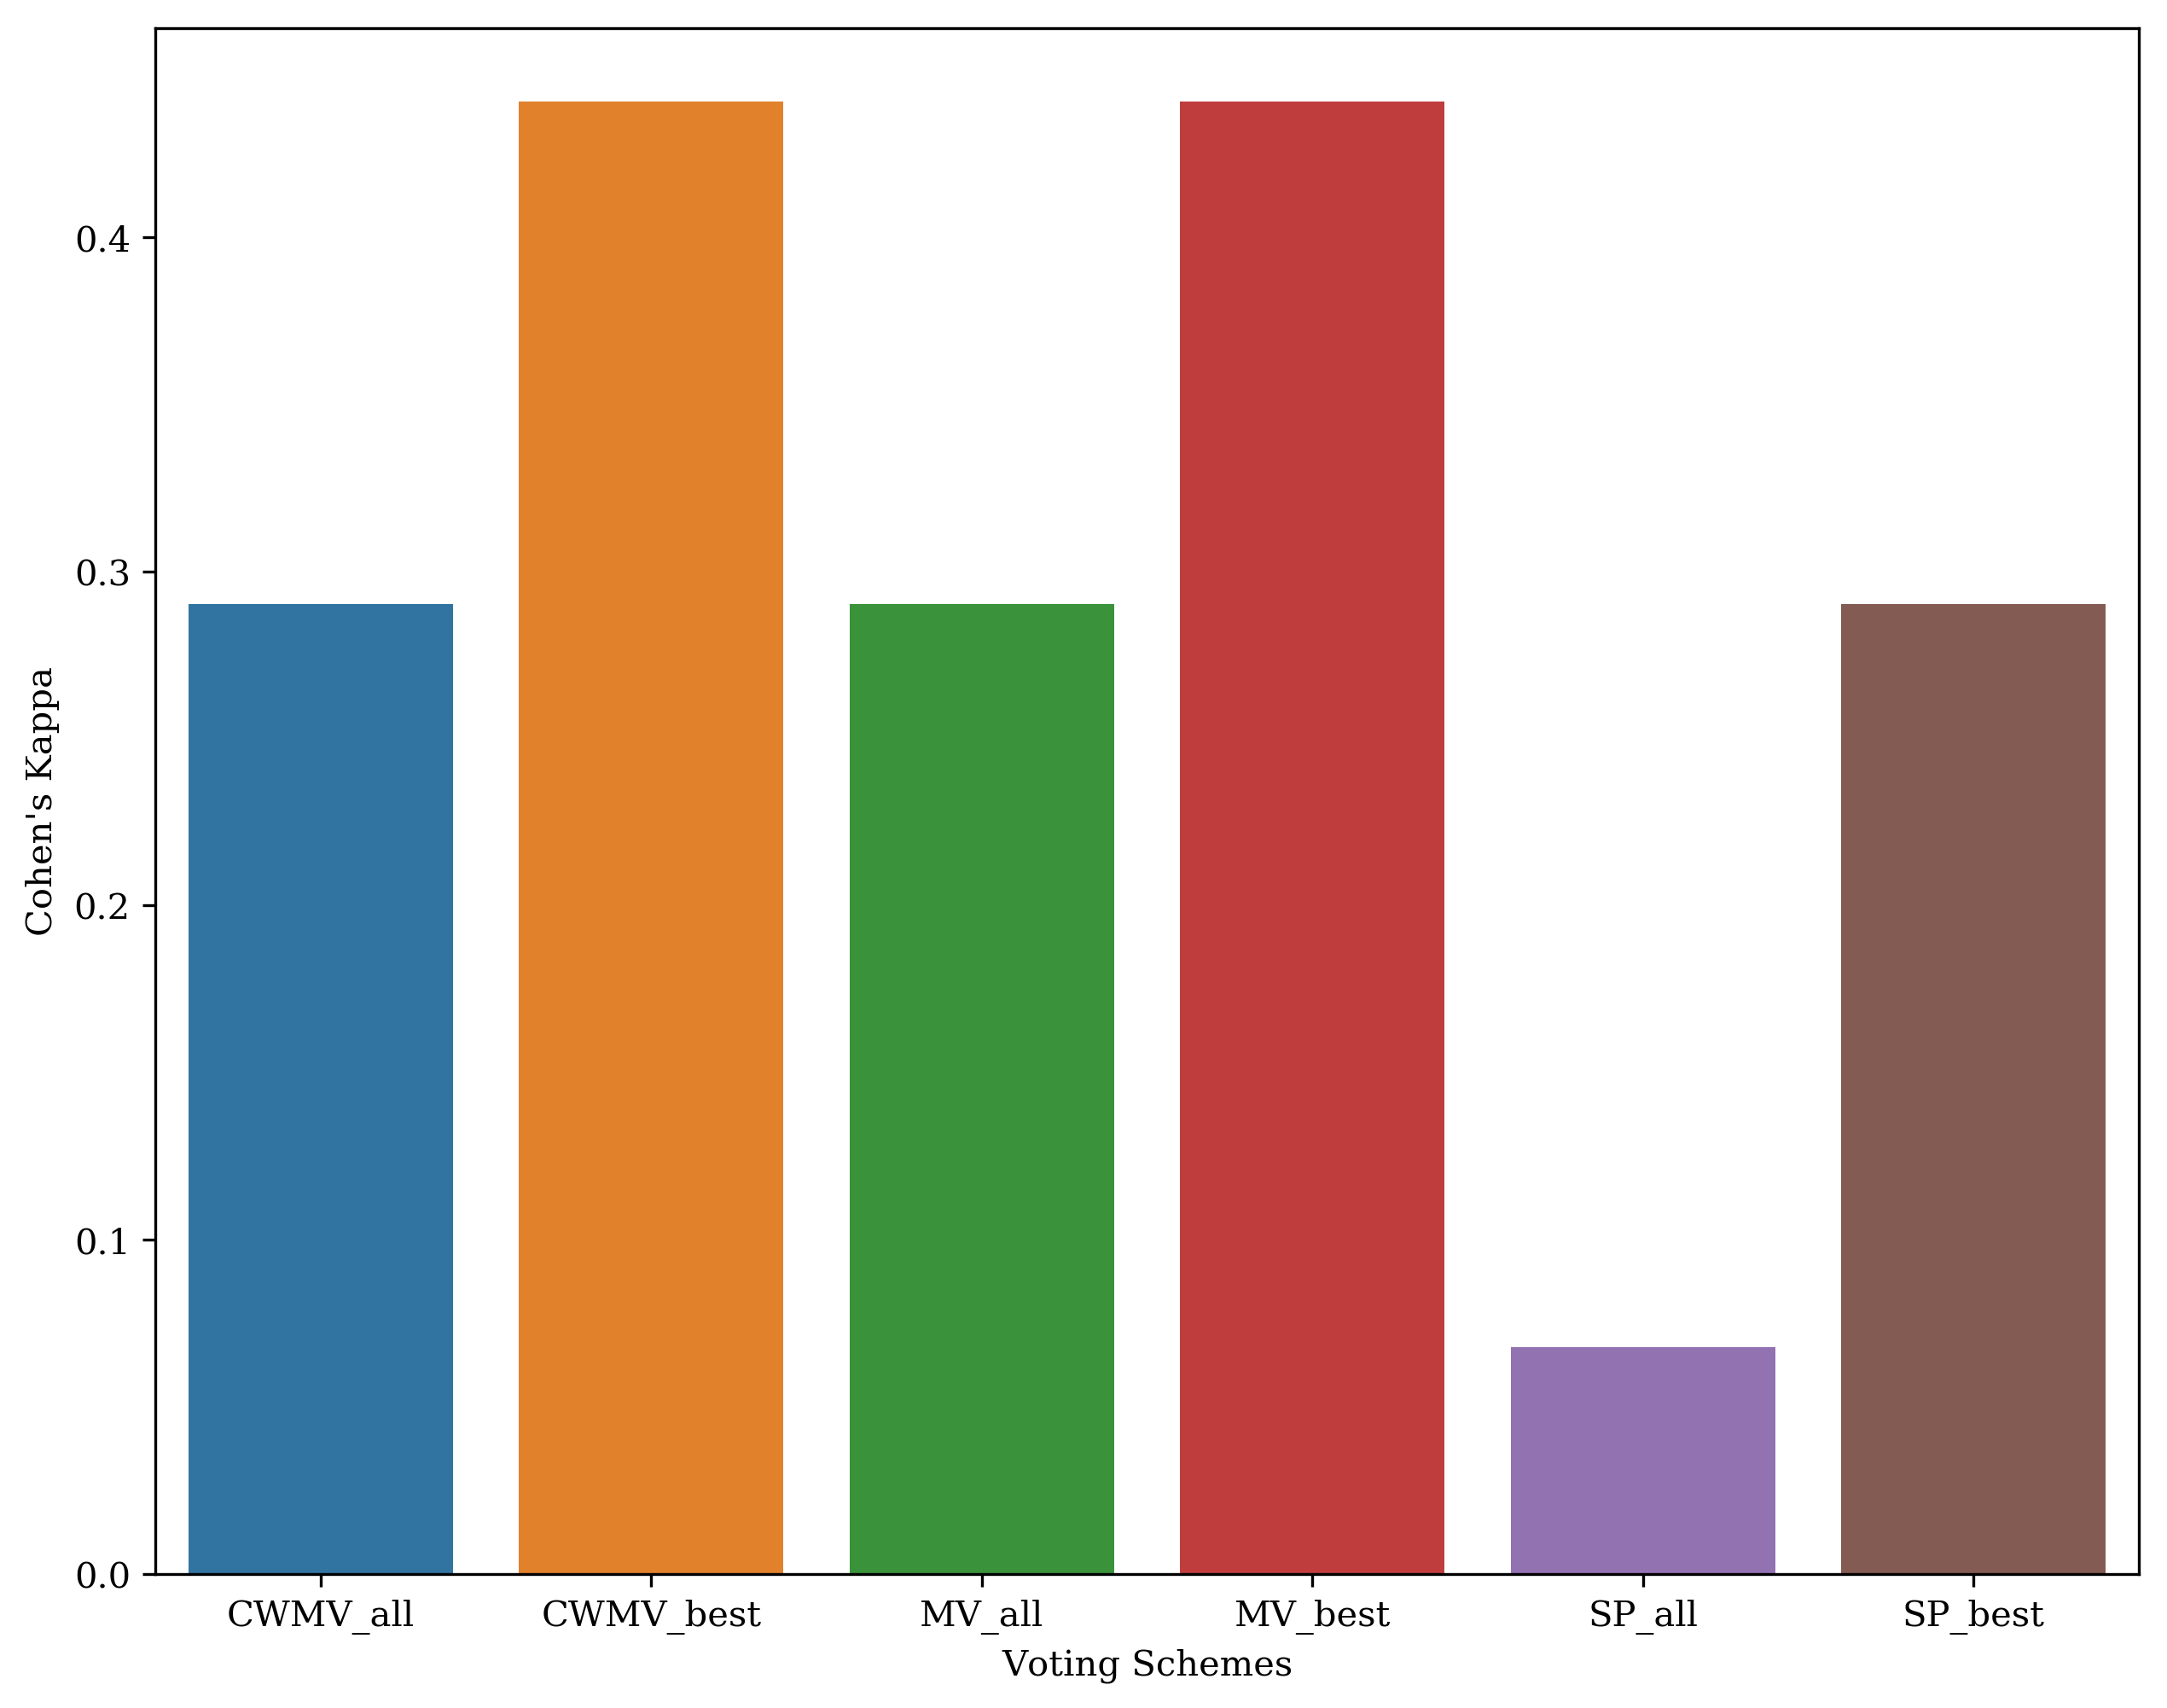

In [841]:
plt.rc('text', usetex=False)
_, ax = plt.subplots(figsize=(10, 8), dpi=300)
cohens_df = pd.DataFrame([{"Voting Schemes": m, "Cohen's Kappa": cohen_kappa_score(results_[m], results_['truth_all'])} 
                          for m in ['CWMV_all', 'CWMV_best', 'MV_all', 'MV_best', 'SP_all', 'SP_best']])

sns.barplot(x="Voting Schemes", y="Cohen's Kappa",  data=cohens_df, ci=68, ax=ax)

## Using Estimation Time

Using the time taken to make an estimation fir different trials, 
we can drop the respondents who take a very short time to answer the estimation question.

For each trial, these respondents should not be counted in the Surprisingly Popular scheme.

In [446]:
def invalidation_dict(metric_label, threshold):
    trial_num2inval_set = {}
    _df = stats_df.filter(like=metric_label)
    for col in _df.columns:
        trial_num2inval_set[str(int(col[:2]))] =  _df[col][lambda x: x < threshold].index.tolist()
    return trial_num2inval_set

In [448]:
invalidation_dict('estimation', 2)

{'0': [4, 6, 27, 30, 39, 42, 48],
 '1': [9, 11, 13, 14, 20, 28, 30, 33, 39],
 '10': [9, 11, 17, 26, 28, 39, 48],
 '2': [0, 4, 17, 28, 30, 43, 48],
 '3': [9, 14, 20, 28, 39, 48],
 '4': [0, 6, 9, 11, 14, 16, 27, 28, 39, 43],
 '5': [9, 11, 13, 20, 21, 26, 28, 33, 39],
 '6': [0, 4, 6, 30, 32, 36, 38, 39, 43],
 '7': [0, 16, 17, 19, 20, 39, 45],
 '8': [6, 11, 16, 17, 32, 39, 43, 48],
 '9': [36, 39, 45, 48]}

The inverse (negative) is the filter that passes through only samples above the threshold:

In [445]:
def stats_filter_dict(metric_label, threshold):
    trial_num2inval_set = {}
    _df = stats_df.filter(like=metric_label)
    for col in _df.columns:
        trial_num2inval_set[str(int(col[:2]))] =  _df[col][lambda x: x >= threshold].index.tolist()
    return trial_num2inval_set

In [447]:
stats_filter_dict('estimation', 2)

{'0': [0,
  1,
  2,
  3,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  23,
  24,
  25,
  26,
  28,
  29,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  41,
  43,
  44,
  45,
  47,
  49],
 '1': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  10,
  12,
  15,
  16,
  17,
  18,
  19,
  21,
  24,
  25,
  26,
  27,
  29,
  31,
  32,
  34,
  35,
  36,
  37,
  38,
  41,
  42,
  43,
  44,
  45,
  47,
  48,
  49],
 '10': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  10,
  12,
  13,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  23,
  24,
  25,
  27,
  29,
  30,
  31,
  32,
  33,
  34,
  36,
  37,
  38,
  41,
  42,
  43,
  44,
  45,
  47,
  49],
 '2': [1,
  2,
  3,
  5,
  6,
  7,
  8,
  9,
  10,
  12,
  13,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  23,
  24,
  25,
  26,
  27,
  29,
  31,
  32,
  33,
  34,
  35,
  37,
  38,
  39,
  41,
  42,
  44,
  45,
  47,
  49],
 '3': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  11,
  12,
  13,
  15,
  16,
  17,
  18,
  19,

In [918]:
def sp_answer_with_filtering(trial_number, filtering_metric='estimation' , filtering_threshold=2, 
                             verbose=False, dataframe=main_df, output_filtered_df = False):
    import time
    _df = dataframe.dropna()
    answered_yes = 100*len(_df[lambda x: x['Answer.opinion' + trial_number] == 1])/float(len(_df))
    answered_no = 100*len(_df[lambda x: x['Answer.opinion' + trial_number] == -1])/float(len(_df))
    
    filtered_df = _df.reset_index()[lambda x: x.index.isin(stats_filter_dict(filtering_metric, 
                                                                             filtering_threshold)[trial_number])]
    
    if verbose:
        print('== Using filtering on "{}" with threshold={}\n'.format(filtering_metric, filtering_threshold))
    
    estimated_yes = filtered_df['Answer.estimAnswer'+ trial_number].astype('float').mean()
    estimated_no = 100 - estimated_yes
    
    if (answered_yes - estimated_yes) > (answered_no - estimated_no):
        answer = 1
    else:
        answer = -1
        
    if verbose:
        print("Trial {}".format(trial_number))
        print("Answered Real: {:0.2f}%".format(answered_yes))
        print("Answered Fake: {:0.2f}%".format(answered_no))
        
        print("Estimated Real: {:0.2f}%".format(estimated_yes))
        print("Estimated Fake: {:0.2f}%".format(estimated_no))
        
        print("Difference(Real): {:0.2f}%".format(answered_yes - estimated_yes))
        print("Difference(Fake): {:0.2f}%".format(answered_no - estimated_no))
        print("SP Answer is:","'Real'" if answer == 1 else "'Fake'")
        print("True answer is:", "'Real'" if trial_num2truth[int(trial_number)] == 1 else "'Fake'")
        
#         if (answer != trial_num2truth[int(trial_number)] ):
#             plot_estimation_histograms(trial_number)
# #             time.sleep(3 )
#         print("\n")
    
    if not output_filtered_df:
        return answer
    else:
        return answer, filtered_df

With this new filtering in place, we can revisit the trials.  

In [488]:
_, _filtered_df = sp_answer_with_filtering('0', filtering_metric='estimation', filtering_threshold=25, 
                         verbose=True, output_filtered_df=True)
_filtered_df

== Using filtering on "estimation" with threshold=25

Trial 0
Answered Real: 38.30%
Answered Fake: 61.70%
Estimated Real: 35.00%
Estimated Fake: 65.00%
Difference(Real): 3.30%
Difference(Fake): -3.30%
SP Answer is: 'Real'
True answer is: 'Real'


,index,WorkerId,Answer.confAnswer0,Answer.confAnswer1,Answer.confAnswer10,Answer.confAnswer2,Answer.confAnswer3,Answer.confAnswer4,Answer.confAnswer5,Answer.confAnswer6,...,Answer.validationTime10,Answer.validationTime2,Answer.validationTime3,Answer.validationTime4,Answer.validationTime5,Answer.validationTime6,Answer.validationTime7,Answer.validationTime8,Answer.validationTime9,accuracy
5,5,AVJUIF9QHQRY8,60,70,50,60,50,65,50,70,...,1529434722268,1529434633307,1529430902004,1529431253050,1529434338439,1529430733400,1529434861411,1529432727827,1529434490440,0.818182
14,14,A34UER5ZQ5APMB,100,85,50,55,75,66,50,60,...,1529431382837,1529431037782,1529431124944,1529431556038,1529430983574,1529430906515,1529431447128,1529431633661,1529431258025,0.818182
37,38,A1TARNH07A75CG,100,50,50,50,80,100,100,100,...,1529430841976,1529430280760,1529430735775,1529430102208,1529430594920,1529430634719,1529430212840,1529430452888,1529430940985,0.636364


## Revisiting Problematic Trials

### Trial 0

In [519]:
_, _filtered_df = sp_answer_with_filtering('0', filtering_metric='estimation', filtering_threshold=23, 
                         verbose=True, output_filtered_df=True)
_filtered_df

== Using filtering on "estimation" with threshold=23

Trial 0
Answered Real: 38.30%
Answered Fake: 61.70%
Estimated Real: 35.00%
Estimated Fake: 65.00%
Difference(Real): 3.30%
Difference(Fake): -3.30%
SP Answer is: 'Real'
True answer is: 'Real'


,index,WorkerId,Answer.confAnswer0,Answer.confAnswer1,Answer.confAnswer10,Answer.confAnswer2,Answer.confAnswer3,Answer.confAnswer4,Answer.confAnswer5,Answer.confAnswer6,...,Answer.validationTime10,Answer.validationTime2,Answer.validationTime3,Answer.validationTime4,Answer.validationTime5,Answer.validationTime6,Answer.validationTime7,Answer.validationTime8,Answer.validationTime9,accuracy
5,5,AVJUIF9QHQRY8,60,70,50,60,50,65,50,70,...,1529434722268,1529434633307,1529430902004,1529431253050,1529434338439,1529430733400,1529434861411,1529432727827,1529434490440,0.818182
14,14,A34UER5ZQ5APMB,100,85,50,55,75,66,50,60,...,1529431382837,1529431037782,1529431124944,1529431556038,1529430983574,1529430906515,1529431447128,1529431633661,1529431258025,0.818182
37,38,A1TARNH07A75CG,100,50,50,50,80,100,100,100,...,1529430841976,1529430280760,1529430735775,1529430102208,1529430594920,1529430634719,1529430212840,1529430452888,1529430940985,0.636364


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ffde978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1a768a90>], dtype=object)

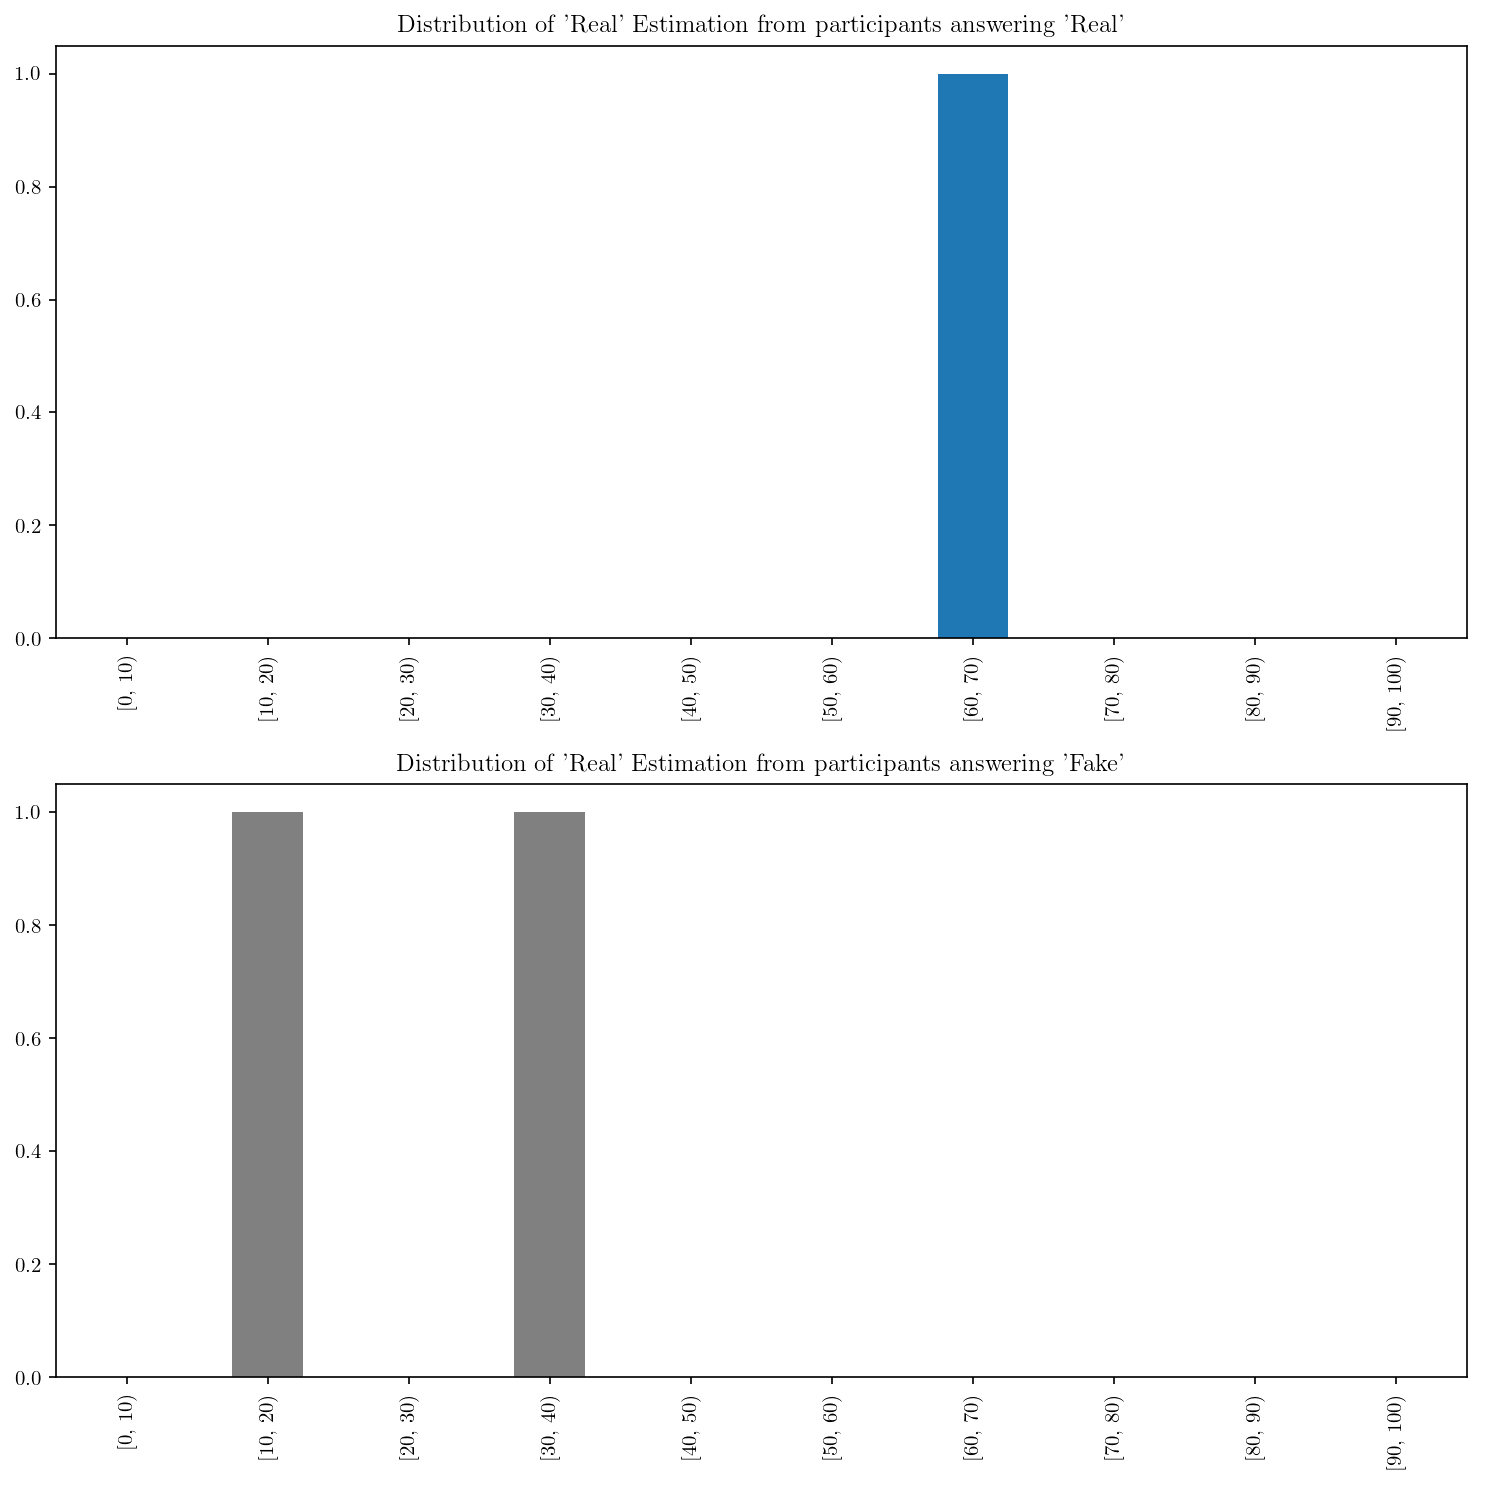

In [520]:
plot_estimation_histograms('0', dataframe=_filtered_df)

### Trial 1

In [513]:
_, _filtered_df = sp_answer_with_filtering('1', filtering_metric='estimation', filtering_threshold=10, 
                         verbose=True, output_filtered_df=True)
_filtered_df

== Using filtering on "estimation" with threshold=10

Trial 1
Answered Real: 53.19%
Answered Fake: 46.81%
Estimated Real: 48.06%
Estimated Fake: 51.94%
Difference(Real): 5.14%
Difference(Fake): -5.14%
SP Answer is: 'Real'
True answer is: 'Fake'


,index,WorkerId,Answer.confAnswer0,Answer.confAnswer1,Answer.confAnswer10,Answer.confAnswer2,Answer.confAnswer3,Answer.confAnswer4,Answer.confAnswer5,Answer.confAnswer6,...,Answer.validationTime10,Answer.validationTime2,Answer.validationTime3,Answer.validationTime4,Answer.validationTime5,Answer.validationTime6,Answer.validationTime7,Answer.validationTime8,Answer.validationTime9,accuracy
0,0,A39GADIK8RLMVC,90,85,90,80,90,80,70,80,...,1529433206875,1529433648376,1529433372386,1529433226711,1529433444133,1529433583991,1529433594575,1529433502083,1529433573412,0.545455
1,1,A1RSDFFZIVE5BO,50,65,50,50,50,50,90,50,...,1529430457213,1529431525681,1529431777485,1529431921928,1529430266437,1529431728712,1529431638858,1529430713924,1529431007459,0.272727
3,3,A1U6A617Q95MTZ,70,50,75,80,50,70,99,95,...,1529437972333,1529438248896,1529438715203,1529438576881,1529438797780,1529438748132,1529437993261,1529438414180,1529438155110,0.818182
4,4,A1AKX1C8GCVCTP,60,75,50,60,50,50,50,50,...,1529430448006,1529432584913,1529432474271,1529430496022,1529430385231,1529432544280,1529432447335,1529432503958,1529432410271,0.272727
5,5,AVJUIF9QHQRY8,60,70,50,60,50,65,50,70,...,1529434722268,1529434633307,1529430902004,1529431253050,1529434338439,1529430733400,1529434861411,1529432727827,1529434490440,0.818182
6,6,A2FLOH4DM8A4ZS,90,75,50,100,99,75,100,99,...,1529446708264,1529446664265,1529450463409,1529450505002,1529450580338,1529450414195,1529450388721,1529449825035,1529447077554,0.454545
12,12,A2ADEPVGNNXNPA,60,75,60,50,50,50,50,50,...,1529430202566,1529432067461,1529431983035,1529430133177,1529430099269,1529432002564,1529432285478,1529430614815,1529432117334,0.454545
15,15,A3VAAV7ZCSO7NA,100,90,75,60,60,50,50,60,...,1529431656930,1529431827410,1529431301098,1529432023383,1529431018843,1529431967229,1529431125479,1529431594919,1529430868780,0.636364
17,17,A3TAJQPYQE1GU4,95,90,60,55,90,60,60,60,...,1529439977928,1529439926501,1529439879714,1529439836785,1529439739458,1529440074921,1529440051148,1529439804199,1529439998868,0.454545
18,18,A1MTRZDRKNB9GV,85,85,90,85,75,95,50,75,...,1529454858580,1529454663533,1529454738925,1529454972956,1529454581787,1529455033284,1529454927076,1529455117182,1529455070988,0.363636


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d787438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1a6f4d30>], dtype=object)

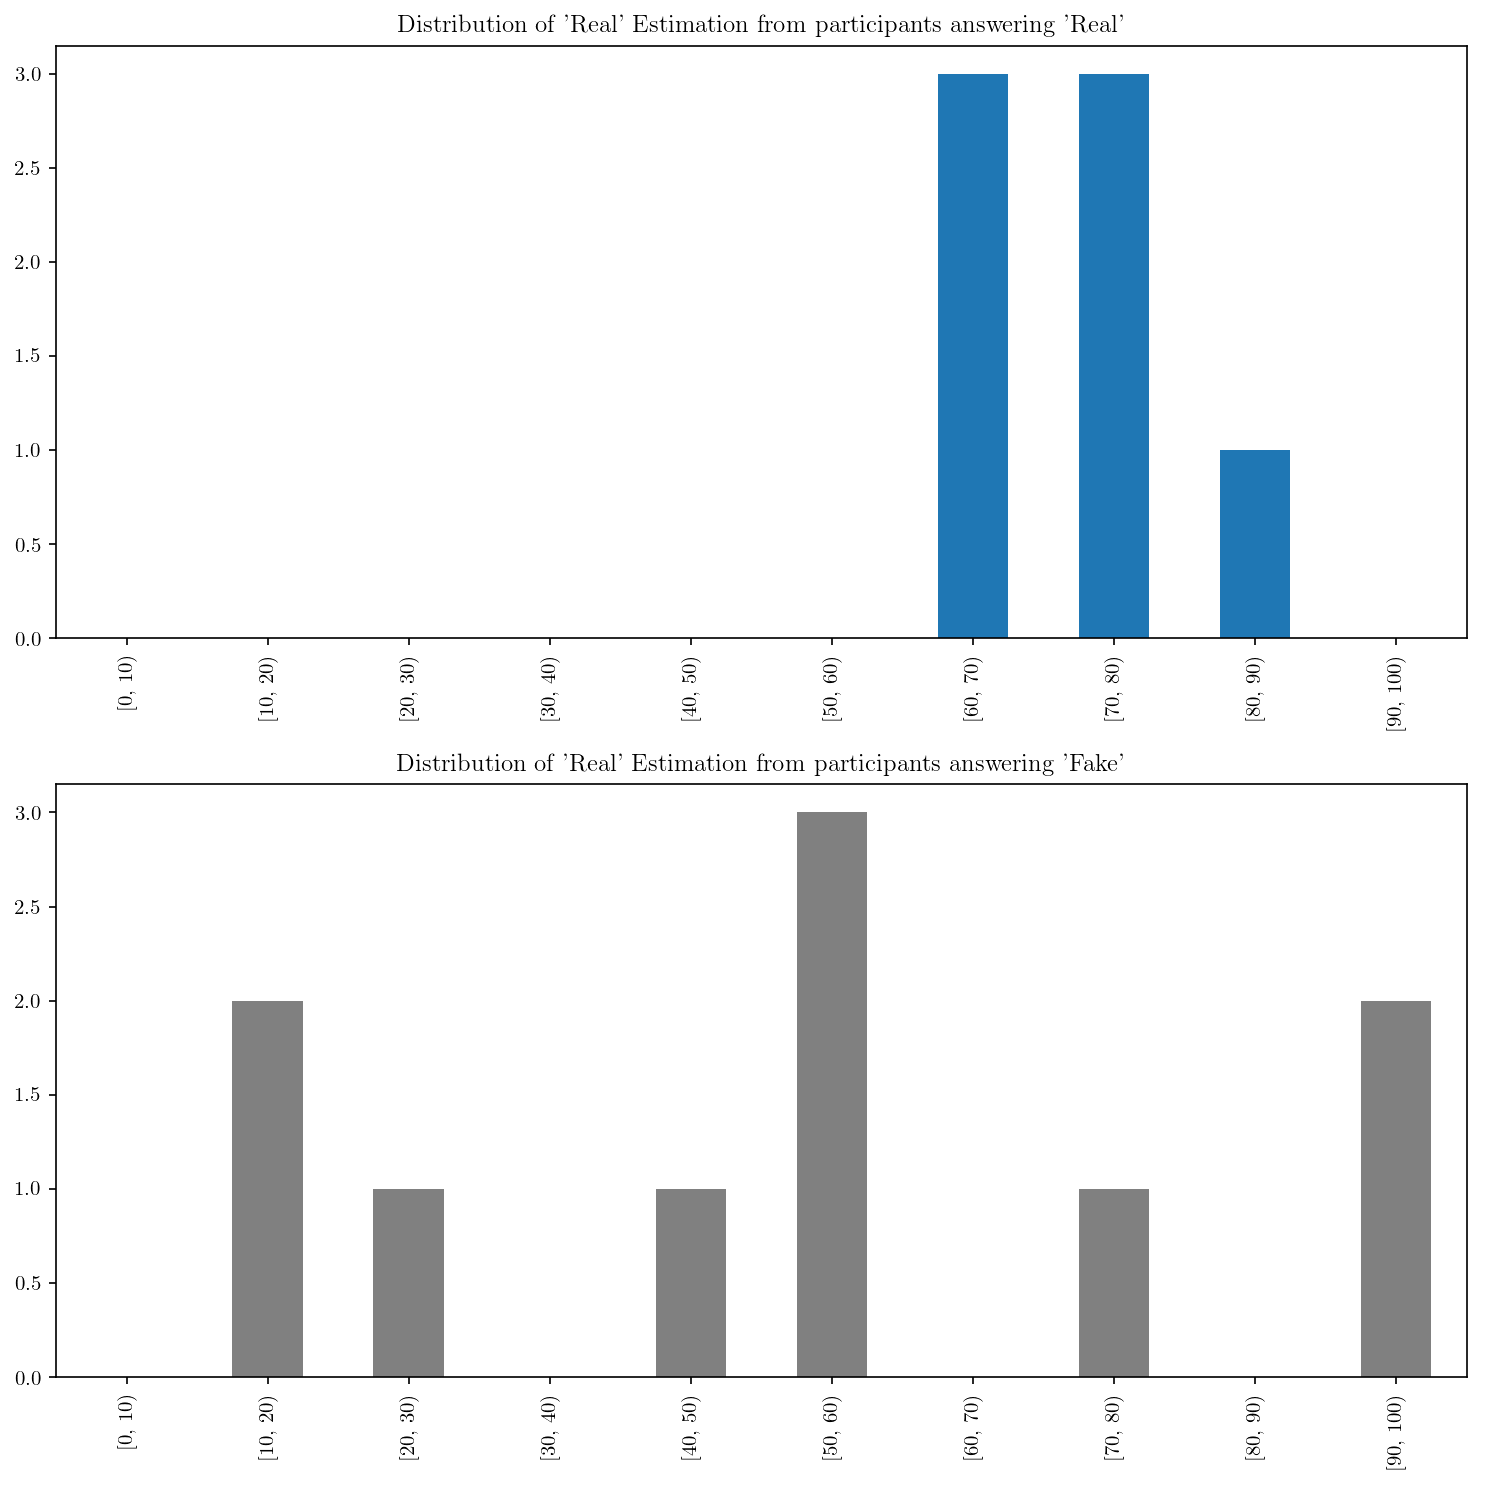

In [514]:
plot_estimation_histograms('0', dataframe=_filtered_df)

### Trial 3

In [755]:
_, _filtered_df = sp_answer_with_filtering('3', filtering_metric='estimation', filtering_threshold=20, 
                         verbose=True, output_filtered_df=True)
_filtered_df

== Using filtering on "estimation" with threshold=20

Trial 3
Answered Real: 57.45%
Answered Fake: 42.55%
Estimated Real: 47.22%
Estimated Fake: 52.78%
Difference(Real): 10.22%
Difference(Fake): -10.22%
SP Answer is: 'Real'
True answer is: 'Real'


,index,WorkerId,Answer.confAnswer0,Answer.confAnswer1,Answer.confAnswer10,Answer.confAnswer2,Answer.confAnswer3,Answer.confAnswer4,Answer.confAnswer5,Answer.confAnswer6,...,Answer.validationTime10,Answer.validationTime2,Answer.validationTime3,Answer.validationTime4,Answer.validationTime5,Answer.validationTime6,Answer.validationTime7,Answer.validationTime8,Answer.validationTime9,accuracy
0,0,A39GADIK8RLMVC,90,85,90,80,90,80,70,80,...,1529433206875,1529433648376,1529433372386,1529433226711,1529433444133,1529433583991,1529433594575,1529433502083,1529433573412,0.545455
5,5,AVJUIF9QHQRY8,60,70,50,60,50,65,50,70,...,1529434722268,1529434633307,1529430902004,1529431253050,1529434338439,1529430733400,1529434861411,1529432727827,1529434490440,0.818182
6,6,A2FLOH4DM8A4ZS,90,75,50,100,99,75,100,99,...,1529446708264,1529446664265,1529450463409,1529450505002,1529450580338,1529450414195,1529450388721,1529449825035,1529447077554,0.454545
7,7,A2FL477TMKC91L,75,90,90,90,75,100,80,70,...,1529430086914,1529430137081,1529430424218,1529430575987,1529430719180,1529430192290,1529430557913,1529430259296,1529430314320,0.545455
12,12,A2ADEPVGNNXNPA,60,75,60,50,50,50,50,50,...,1529430202566,1529432067461,1529431983035,1529430133177,1529430099269,1529432002564,1529432285478,1529430614815,1529432117334,0.454545
23,24,A125KW9P18V5Z1,75,70,65,65,55,55,60,60,...,1529430948286,1529431121197,1529430893703,1529431190122,1529430595468,1529430792568,1529431063649,1529430719745,1529430430642,0.363636
25,26,A110KENBXU7SUJ,60,50,75,50,70,80,55,65,...,1529441603709,1529441576996,1529441899437,1529441850533,1529441666445,1529441507043,1529441556354,1529441927126,1529441641198,0.454545
31,32,A0017268R9SKD8U2Y3F,60,50,80,80,80,75,67,75,...,1529434068968,1529433395167,1529433922294,1529433333049,1529433958943,1529433976770,1529434110789,1529433604817,1529433762886,0.636364
38,39,A39Q4SNT7SRK94,100,100,70,80,70,70,60,90,...,1529431125137,1529430941380,1529430973874,1529430989005,1529431025770,1529431074230,1529431049546,1529431086094,1529430910348,0.363636


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a190d60f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1a9641d0>], dtype=object)

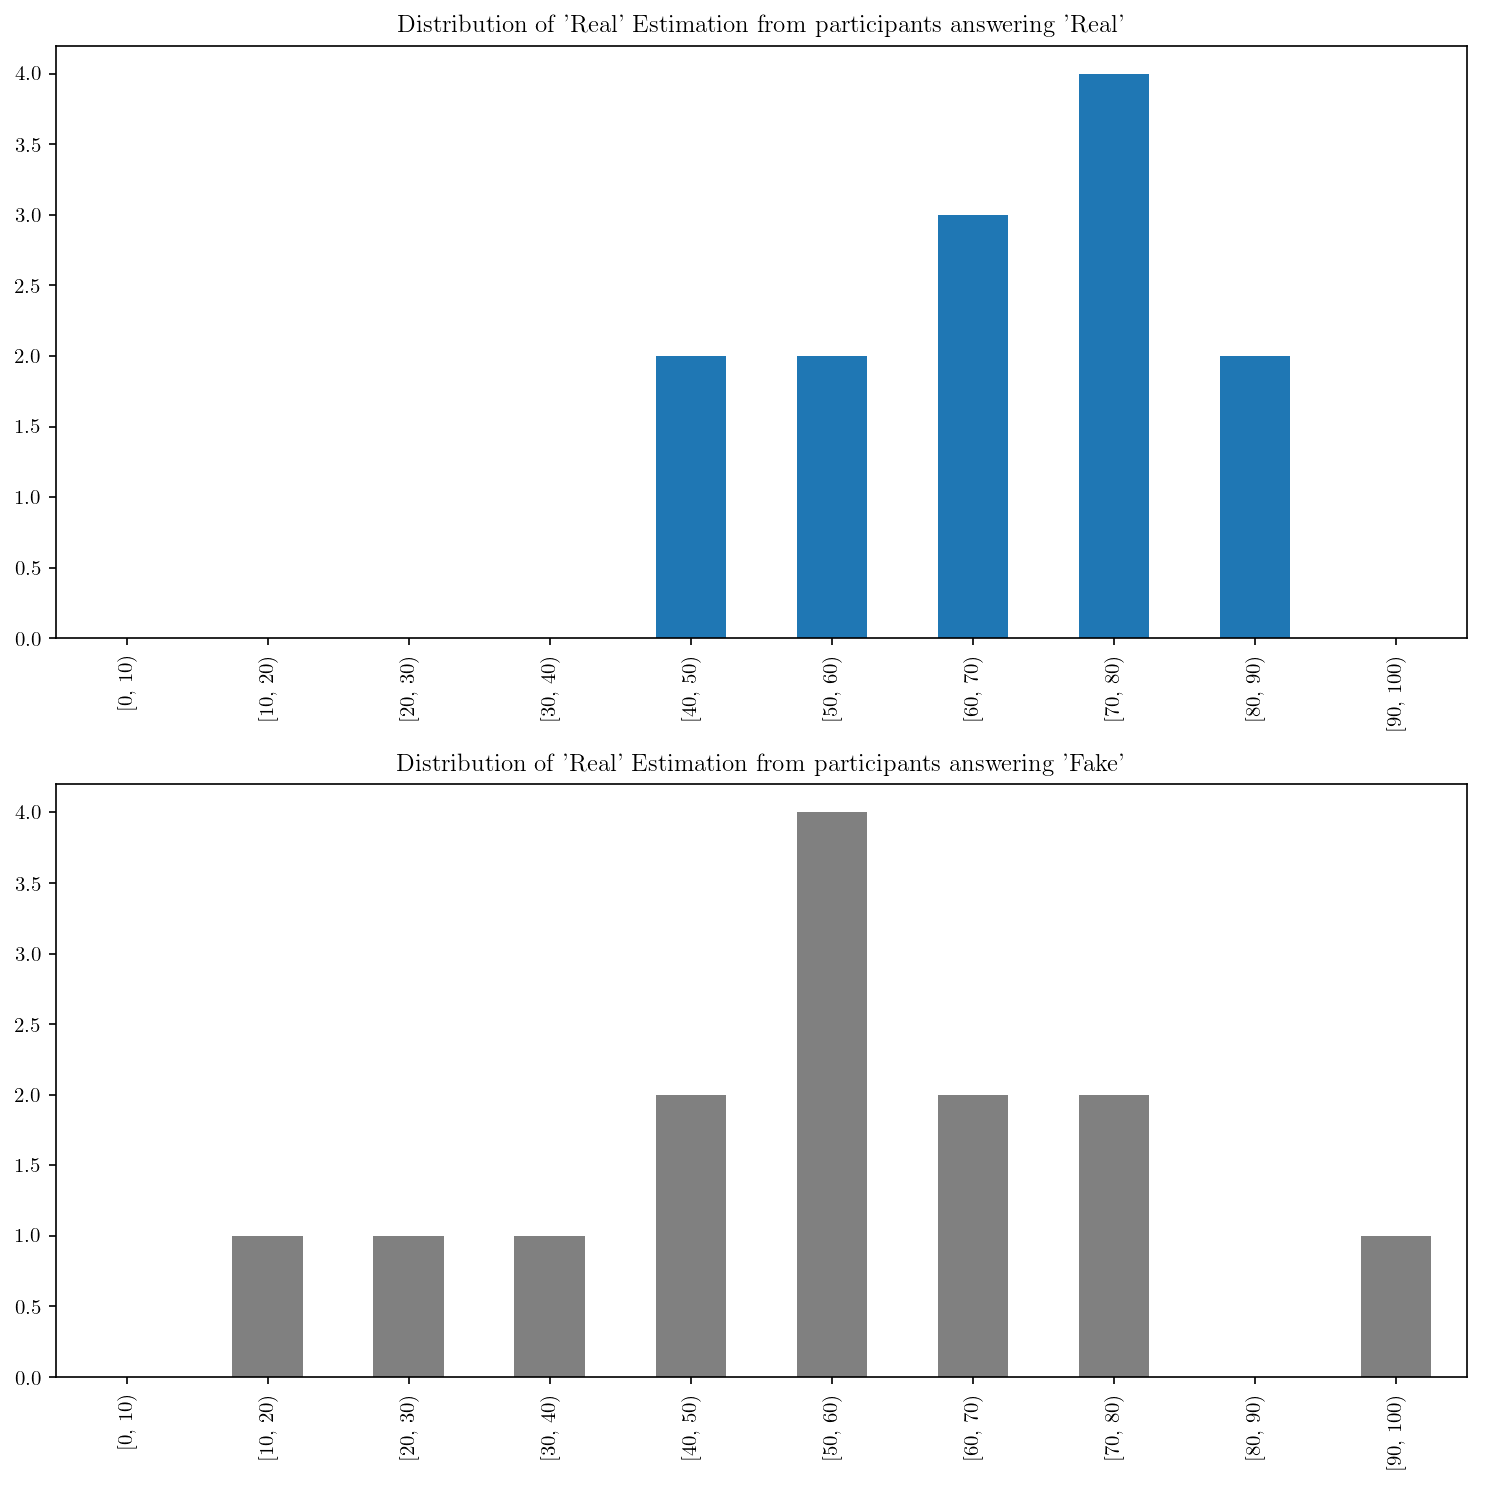

In [530]:
plot_estimation_histograms('3', dataframe=_filtered_df)

### Trial 5

In [846]:
_, _filtered_df = sp_answer_with_filtering('5', filtering_metric='estimation', filtering_threshold=80, 
                         verbose=True, output_filtered_df=True)
_filtered_df

== Using filtering on "estimation" with threshold=80

Trial 5
Answered Real: 61.70%
Answered Fake: 38.30%
Estimated Real: 52.50%
Estimated Fake: 47.50%
Difference(Real): 9.20%
Difference(Fake): -9.20%
SP Answer is: 'Real'
True answer is: 'Fake'


,index,WorkerId,Answer.confAnswer0,Answer.confAnswer1,Answer.confAnswer10,Answer.confAnswer2,Answer.confAnswer3,Answer.confAnswer4,Answer.confAnswer5,Answer.confAnswer6,...,Answer.validationTime10,Answer.validationTime2,Answer.validationTime3,Answer.validationTime4,Answer.validationTime5,Answer.validationTime6,Answer.validationTime7,Answer.validationTime8,Answer.validationTime9,accuracy
5,5,AVJUIF9QHQRY8,60,70,50,60,50,65,50,70,...,1529434722268,1529434633307,1529430902004,1529431253050,1529434338439,1529430733400,1529434861411,1529432727827,1529434490440,0.818182
12,12,A2ADEPVGNNXNPA,60,75,60,50,50,50,50,50,...,1529430202566,1529432067461,1529431983035,1529430133177,1529430099269,1529432002564,1529432285478,1529430614815,1529432117334,0.454545
18,18,A1MTRZDRKNB9GV,85,85,90,85,75,95,50,75,...,1529454858580,1529454663533,1529454738925,1529454972956,1529454581787,1529455033284,1529454927076,1529455117182,1529455070988,0.363636
38,39,A39Q4SNT7SRK94,100,100,70,80,70,70,60,90,...,1529431125137,1529430941380,1529430973874,1529430989005,1529431025770,1529431074230,1529431049546,1529431086094,1529430910348,0.363636


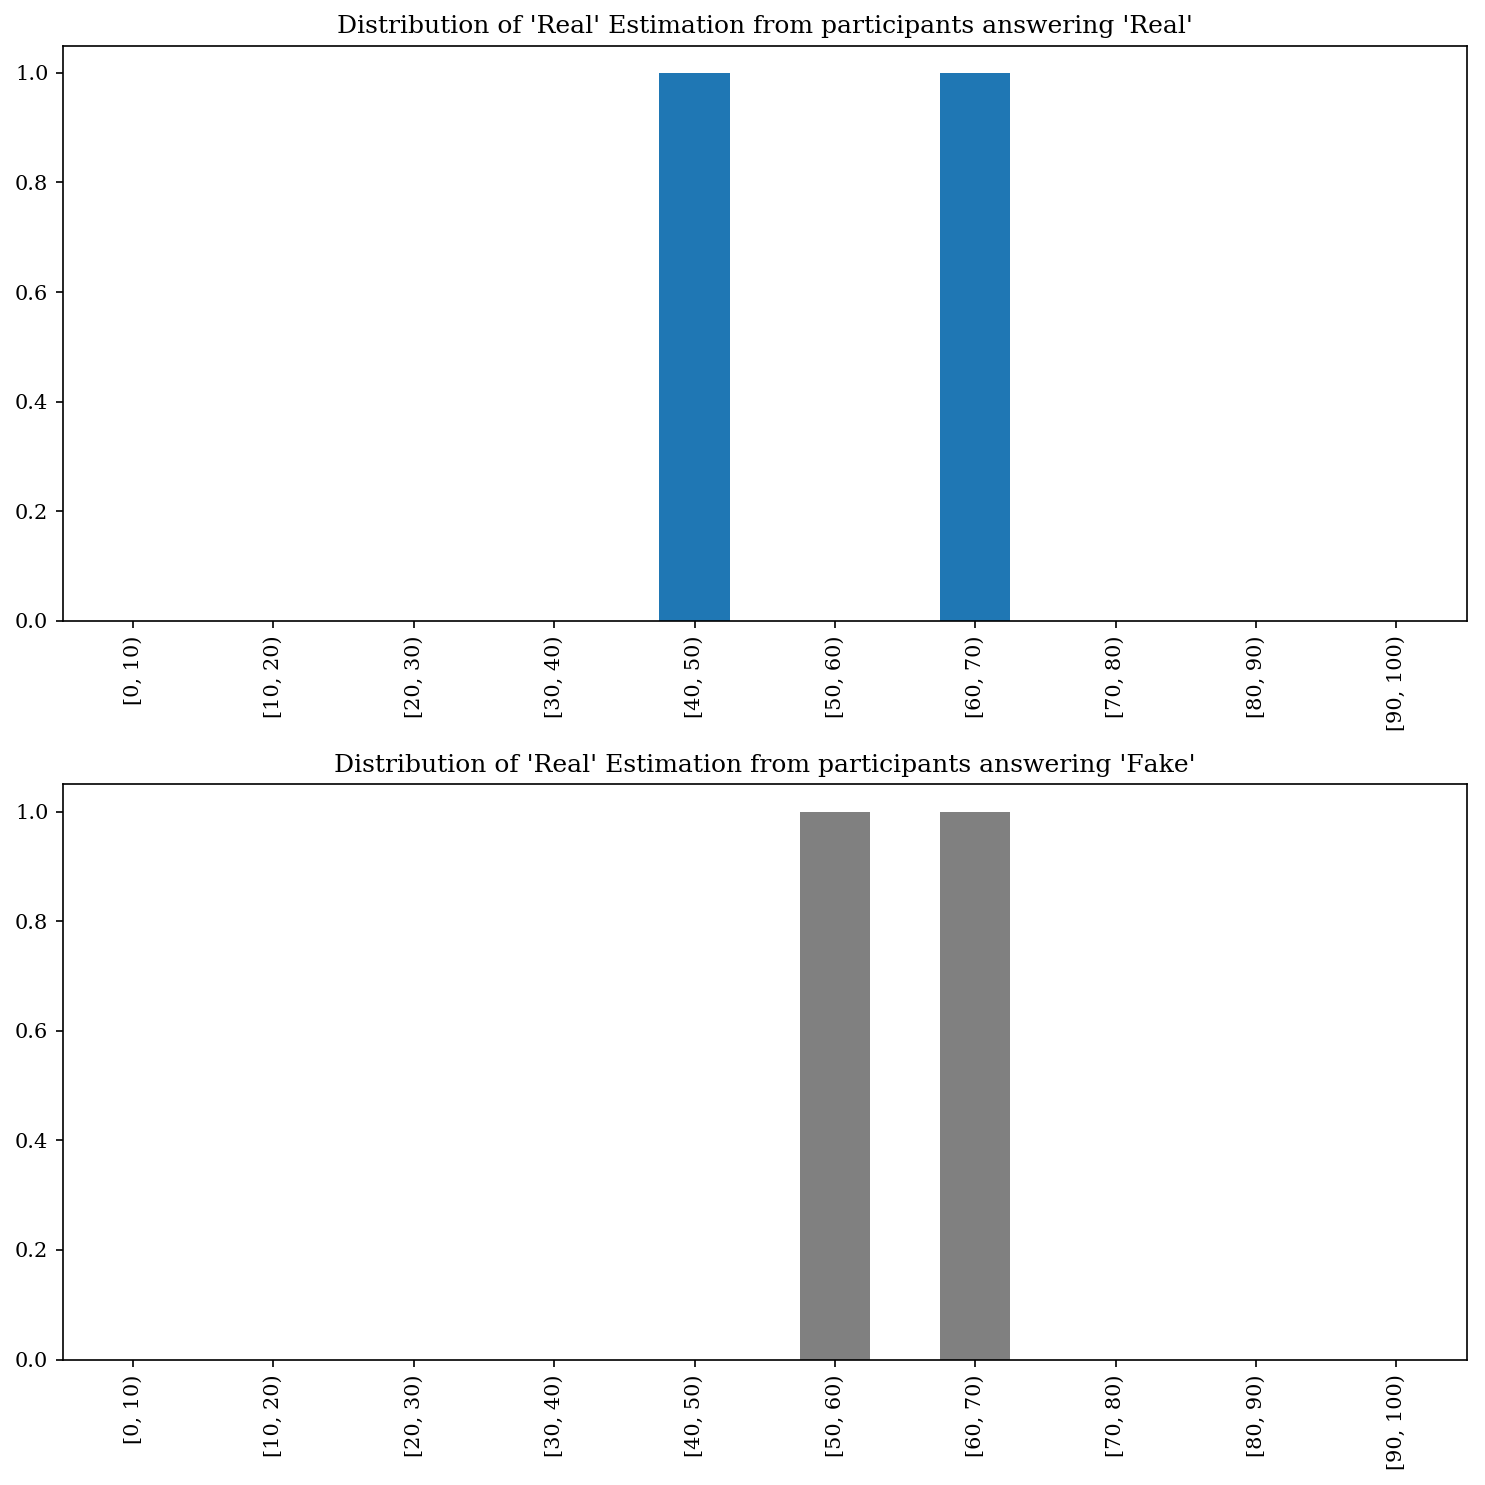

In [847]:
plot_estimation_histograms('5', dataframe=_filtered_df)

### Trial 8

In [989]:
_, _filtered_df = sp_answer_with_filtering('8', filtering_metric='estimation', filtering_threshold=10, 
                         verbose=True, output_filtered_df=True)
_filtered_df

== Using filtering on "estimation" with threshold=10

Trial 8
Answered Real: 72.34%
Answered Fake: 27.66%
Estimated Real: 60.94%
Estimated Fake: 39.06%
Difference(Real): 11.40%
Difference(Fake): -11.40%
SP Answer is: 'Real'
True answer is: 'Fake'


,index,WorkerId,Answer.confAnswer0,Answer.confAnswer1,Answer.confAnswer10,Answer.confAnswer2,Answer.confAnswer3,Answer.confAnswer4,Answer.confAnswer5,Answer.confAnswer6,...,Answer.validationTime10,Answer.validationTime2,Answer.validationTime3,Answer.validationTime4,Answer.validationTime5,Answer.validationTime6,Answer.validationTime7,Answer.validationTime8,Answer.validationTime9,accuracy
0,0,A39GADIK8RLMVC,90,85,90,80,90,80,70,80,...,1529433206875,1529433648376,1529433372386,1529433226711,1529433444133,1529433583991,1529433594575,1529433502083,1529433573412,0.545455
2,2,A1H72Y9Z5NJXDS,90,100,90,90,100,65,80,90,...,1529454007294,1529453640986,1529453896047,1529453407625,1529453697399,1529453520170,1529453429323,1529453766718,1529453824014,0.727273
8,8,AKZ8SFOAI4RZN,80,55,60,75,75,70,70,68,...,1529431574194,1529431263143,1529431846655,1529431070559,1529431642430,1529431894271,1529431445775,1529430987776,1529431358695,0.727273
9,9,A36SM7QM8OK3H6,99,50,95,90,50,90,50,80,...,1529449750752,1529449720839,1529449848481,1529450182354,1529449699945,1529450108315,1529450090818,1529449950779,1529449636598,0.727273
10,10,A96EW0W9DVLJ6,80,90,70,60,80,90,75,75,...,1529434185353,1529434143945,1529434281009,1529433547349,1529433871318,1529434245078,1529433924799,1529433437614,1529433673299,0.272727
12,12,A2ADEPVGNNXNPA,60,75,60,50,50,50,50,50,...,1529430202566,1529432067461,1529431983035,1529430133177,1529430099269,1529432002564,1529432285478,1529430614815,1529432117334,0.454545
14,14,A34UER5ZQ5APMB,100,85,50,55,75,66,50,60,...,1529431382837,1529431037782,1529431124944,1529431556038,1529430983574,1529430906515,1529431447128,1529431633661,1529431258025,0.818182
15,15,A3VAAV7ZCSO7NA,100,90,75,60,60,50,50,60,...,1529431656930,1529431827410,1529431301098,1529432023383,1529431018843,1529431967229,1529431125479,1529431594919,1529430868780,0.636364
18,18,A1MTRZDRKNB9GV,85,85,90,85,75,95,50,75,...,1529454858580,1529454663533,1529454738925,1529454972956,1529454581787,1529455033284,1529454927076,1529455117182,1529455070988,0.363636
21,21,A1NSHNH3MNFRGW,100,70,50,55,100,80,100,60,...,1529432803276,1529432685530,1529432491563,1529432902712,1529432857656,1529432422146,1529432533993,1529432389952,1529432596017,0.454545


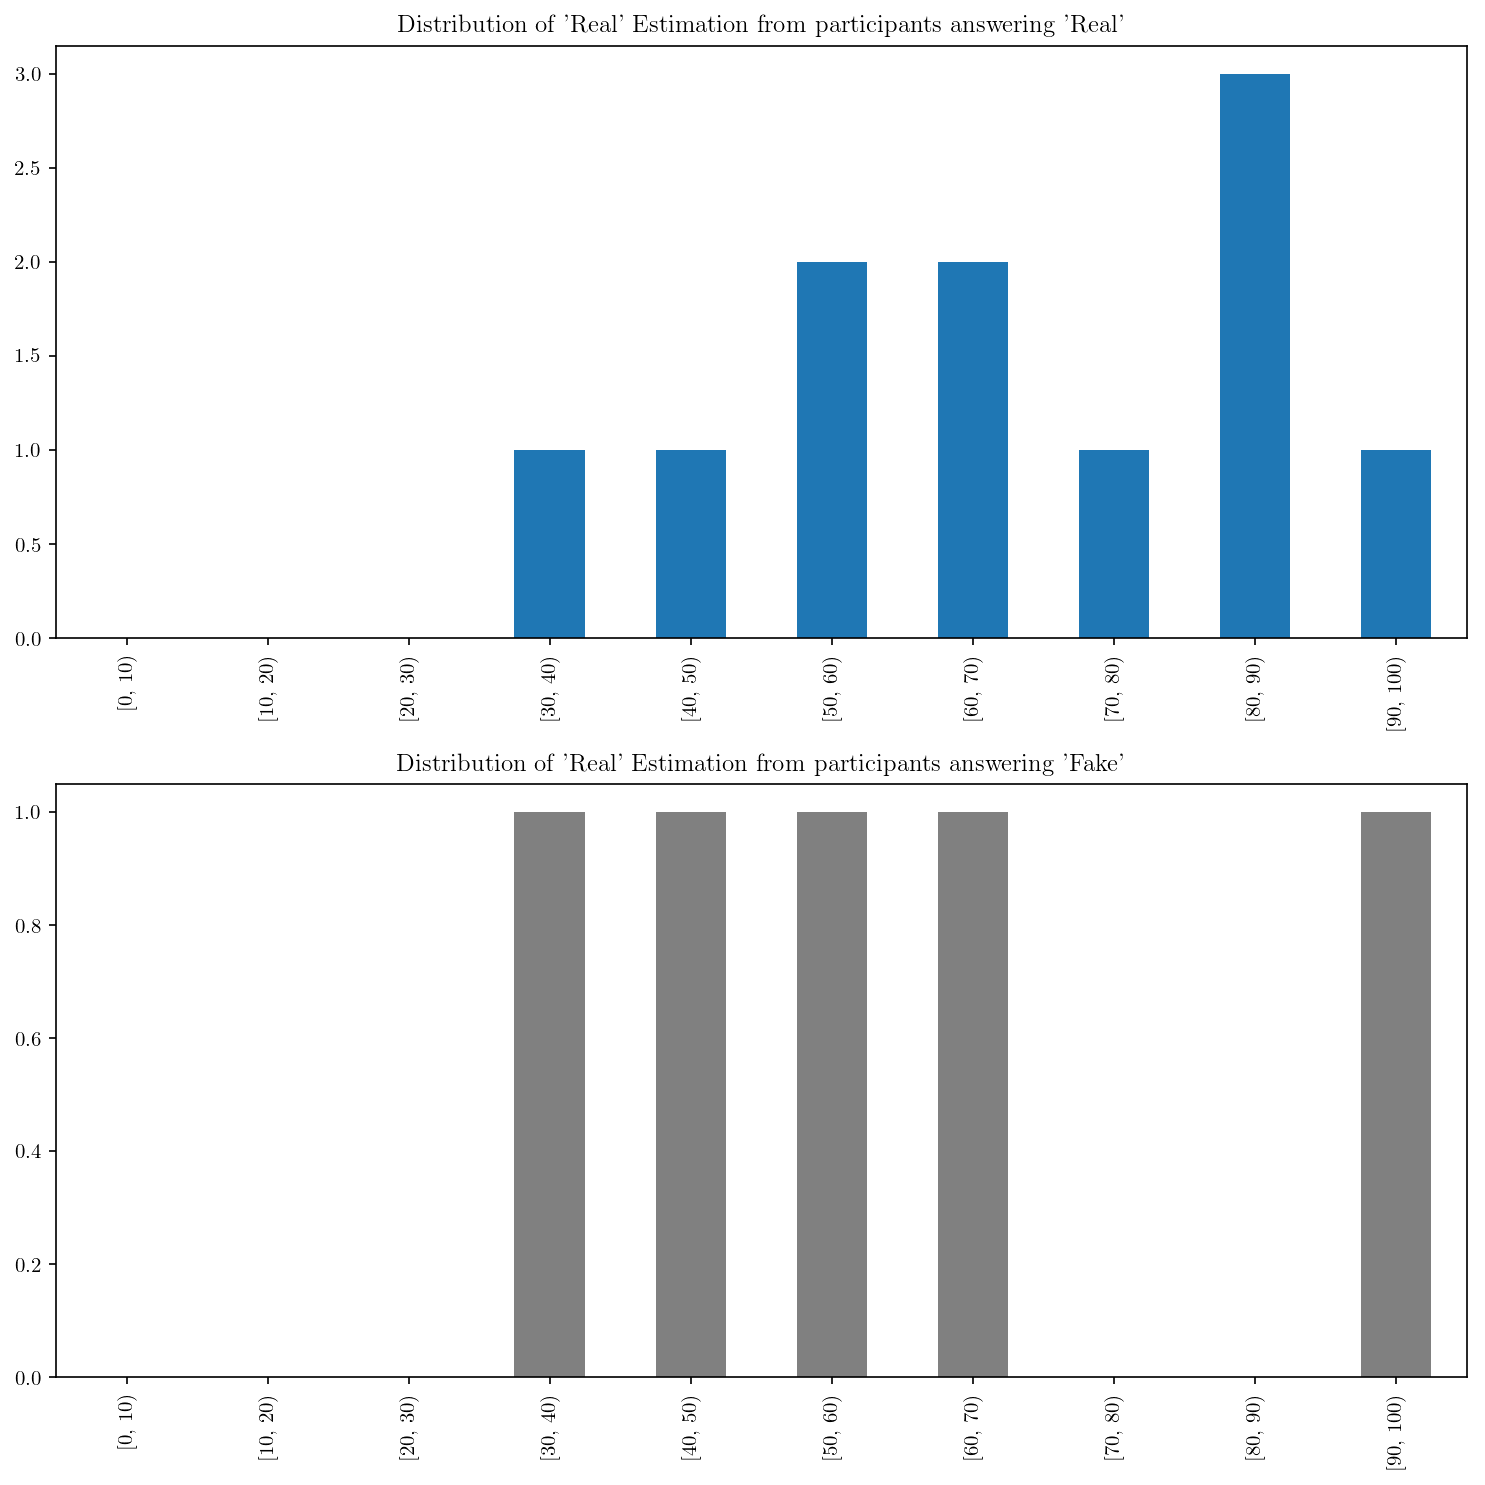

In [990]:
plot_estimation_histograms('8', dataframe=_filtered_df)

## Filtered by Estimation Time

In [931]:
trial_num2sp_filtered = {trial_num:sp_answer_with_filtering(str(trial_num), verbose=False, filtering_threshold=_threshold) for trial_num in range(0, 11)}

results_final = results_.drop(['truth_all', 'truth_best'], axis=1)\
        .join(pd.DataFrame({'SP (filtered)' : trial_num2sp_filtered}))\
        .join(pd.DataFrame({'Truth' : trial_num2truth}))

results_final.columns = [item.replace('_all', ' (all)').replace('_best', ' (best)') for item in results_final.columns]


In [934]:
results_final.columns.tolist()[:-1]

['CWMV (all)',
 'CWMV (best)',
 'MV (all)',
 'MV (best)',
 'SP (all)',
 'SP (best)',
 'SP (filtered)']

In [938]:
def plot_kappa_with_threshold(_threshold, ax):
    trial_num2sp_filtered = {trial_num:sp_answer_with_filtering(str(trial_num), verbose=False, filtering_threshold=_threshold) for trial_num in range(0, 11)}

    results_final = results_.drop(['truth_all', 'truth_best'], axis=1)\
        .join(pd.DataFrame({'SP (filtered)' : trial_num2sp_filtered}))\
        .join(pd.DataFrame({'Truth' : trial_num2truth}))

    results_final.columns = [item.replace('_all', ' (all)').replace('_best', ' (best)') for item in results_final.columns]

    ### Cohen's Kappa

    cohens_df = pd.DataFrame([{"Voting Schemes": m, "Cohen's Kappa": cohen_kappa_score(results_final[m], results_final['Truth'])} 
                              for m in results_final.drop('Truth', axis=1).columns])

    sns.barplot(x="Voting Schemes", y="Cohen's Kappa",  data=cohens_df, ci=68, ax=ax)

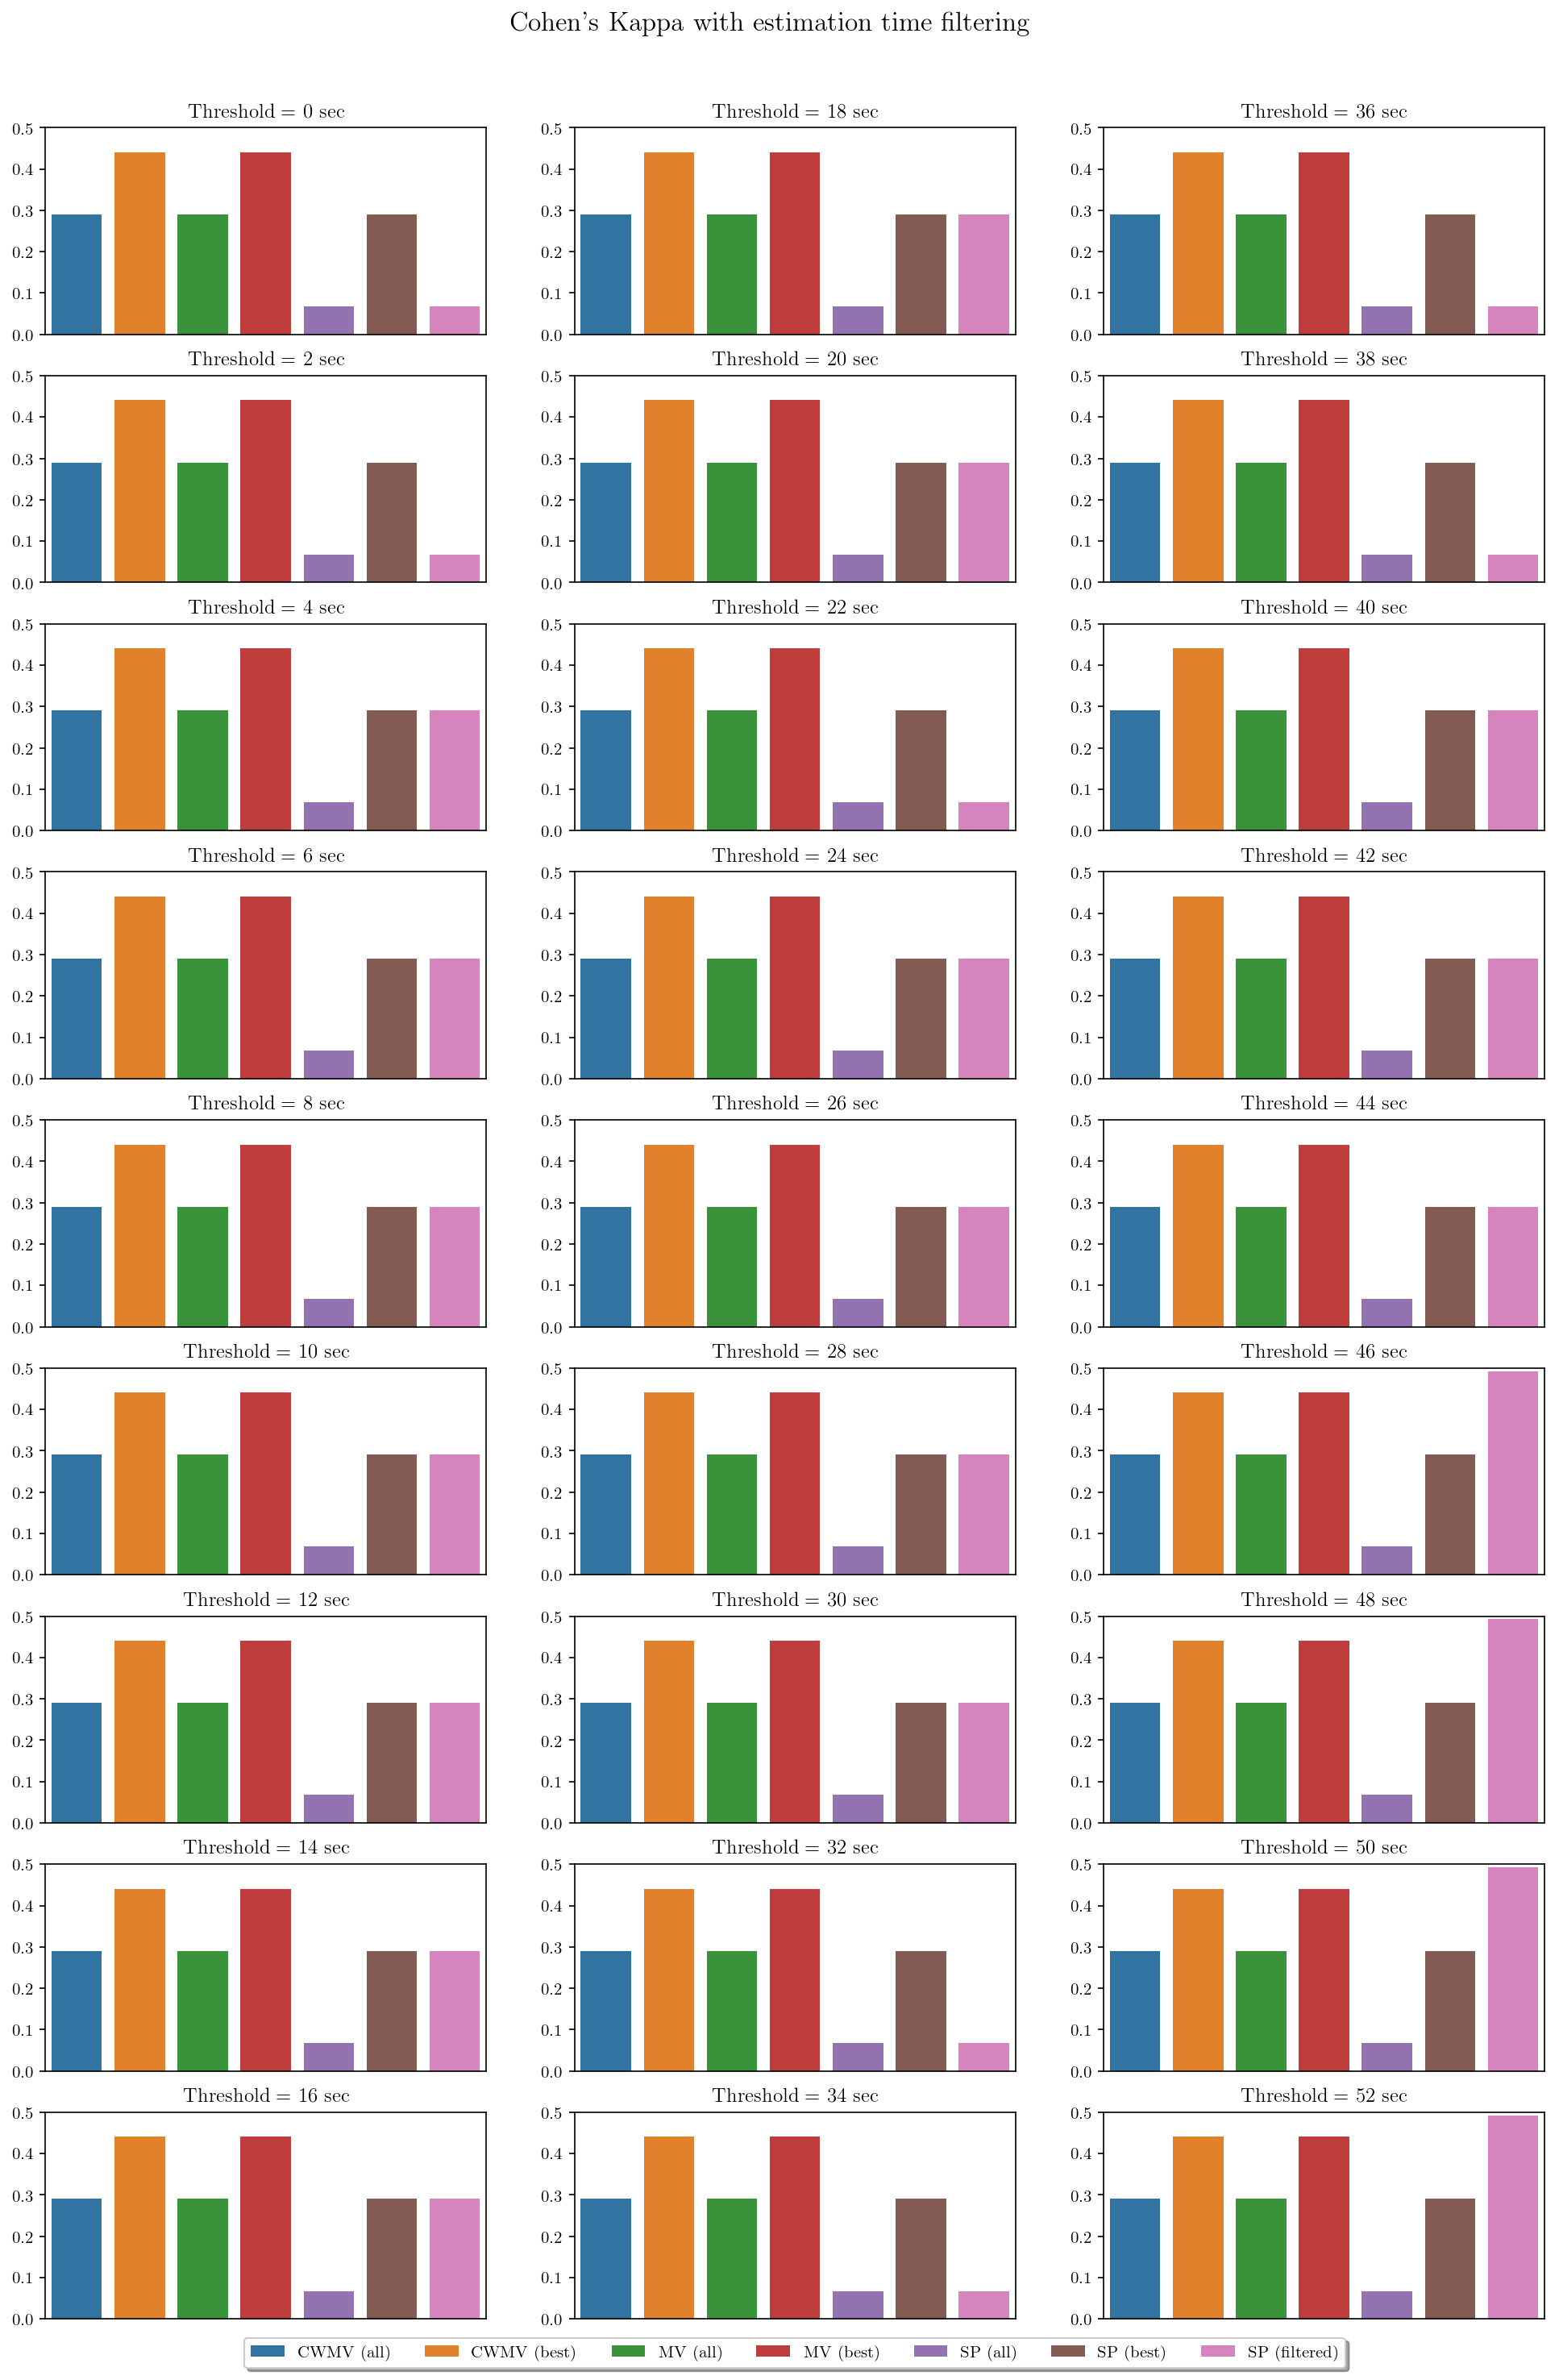

In [988]:
plt.rc('text', usetex=True)
_, ax = plt.subplots(9, 3, figsize=(16, 24), dpi=150)
ax = ax.reshape(-1, order='F')

for a, thr in zip(ax, range(0, 60, 2)):
    l1 = plot_kappa_with_threshold(thr, a)
    a.set_xticks([])
    a.set_xlabel('')
    a.set_ylabel('')
    a.set_title('Threshold = {} sec'.format(thr))
    a.set_ylim([0, 0.5])


ax[17].legend(handles = ax[17].get_children()[:7] , labels=results_final.columns.tolist()[:-1], loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=7)

plt.suptitle("Cohen's Kappa with estimation time filtering", y=0.92, fontsize=16)
plt.savefig("exp1_cohens_filtering.pdf", format='pdf')